# 1) Lectura e Informacion Inicial del Dataset

En esta seccion se hace la importacion general de las libreias  y se lee el arhivo CSV de Airbnb , ademas obtenemos informacion sobre el tipo de dato y los valores NaN por Columna que luego veremos en la seccion de Data Cleaning



In [ ]:
# Conexion a google drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
import os
%cd '/content/gdrive/MyDrive'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
# Importacion de Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA





In [ ]:
# Lectura del arhivo csv
file_csv_airbnb = '/content/gdrive/My Drive/Trabajo Final Data Science UTN IE/airbnb_us.csv'
airbnb_us = pd.read_csv(file_csv_airbnb)
airbnb_us.head()

id property_type        room_type  \
0  13418779         House  Entire home/apt   
1   3808709     Apartment  Entire home/apt   
2  12422935     Apartment     Private room   
3    180792         House     Private room   
4   2658946     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
1  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
2  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   

   bed_type cancellation_policy  cleaning_fee city  ...   longitude  \
0  Real Bed            flexible          True   SF  ... -122.431619   
1  Real Bed            moderate          True   DC  ...  -77.034596   
2  Real Bed              strict          True   SF  ... -122.429526   
3  Real Bed            moderate          True   SF  ... -122.501095   
4  Real Bed              strict          True   DC  ...  -77.031189   

                                                name      neighbourhood  \
0                 Beautiful Flat in the Heart of SF!       Lower Haight   
1                         Great studio in midtown DC   Columbia Heights   
2                        Comfort Suite San Francisco         Noe Valley   
3                 Cozy Garden Studio - Private Entry  Richmond District   
4  Charming 2 bdrm in trendy U/14th streets w/par...  U Street Corridor   

  number_of_reviews review_scores_rating  \
0                 0                  NaN   
1                 4                 40.0   
2                 3                100.0   
3               159                 99.0   
4                13                 89.0   

                                       thumbnail_url  zipcode bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0   
1                                                NaN    20009      0.0   1.0   
2  https://a0.muscache.com/im/pictures/82509143-4...    94131      1.0   1.0   
3  https://a0.muscache.com/im/pictures/0ed6c128-7...    94121      1.0   1.0   
4                                                NaN    20009      2.0   3.0   

   price  
0  750.0  
1  115.0  
2   85.0  
3  120.0  
4  200.0  

[5 rows x 29 columns]

In [ ]:
# Verificamos que las dimensiones del DF coicidan con lo indicado en la consiga del Trabajo Practico
airbnb_us.shape

(19309, 29)

In [ ]:
# Creamos una  tabla resumen  de NaNs
total = airbnb_us.isnull().sum().sort_values(ascending=False)  # Total de NaNs por columna
porcentaje = (airbnb_us.isnull().sum() / airbnb_us.isnull().count()).sort_values(ascending=False)  # Porcentaje de NaNs

#Le agregamos mas columnas para tener mas informacion
faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
faltantes['Porcentaje (%)'] = (faltantes['Porcentaje'] * 100).round(2).astype(str) + '%'  # Formato porcentaje como texto

# Mostrar las 15 columnas con más NaNs
faltantes.head(15)

Total  Porcentaje Porcentaje (%)
host_response_rate       4296    0.222487         22.25%
review_scores_rating     4134    0.214097         21.41%
last_review              3954    0.204775         20.48%
first_review             3954    0.204775         20.48%
thumbnail_url            2402    0.124398         12.44%
neighbourhood            1458    0.075509          7.55%
zipcode                   225    0.011653          1.17%
bathrooms                  35    0.001813          0.18%
beds                       24    0.001243          0.12%
bedrooms                   17    0.000880          0.09%
host_since                  3    0.000155          0.02%
host_has_profile_pic        3    0.000155          0.02%
host_identity_verified      3    0.000155          0.02%
longitude                   0    0.000000           0.0%
number_of_reviews           0    0.000000           0.0%

In [ ]:
# Creamos una tabla Resumen con mas informacion sobre los NaNs , Tipo de datos , Valores no Nulos y sus %
total_filas = len(airbnb_us)



# Obtenemos detalles de las columnas
tabla_resumen = pd.DataFrame({
    'Columna': airbnb_us.columns,
    'Tipo de datos': airbnb_us.dtypes.values,
    'Valores no nulos': airbnb_us.notnull().sum().values,
    'Porcentaje no nulos (%)': (airbnb_us.notnull().sum() / total_filas * 100).round(2).astype(str) + '%',
    'Valores nulos': airbnb_us.isnull().sum().values,
    'Porcentaje nulos (%)': (airbnb_us.isnull().sum() / total_filas * 100).round(2).astype(str) + '%'
})


# Mostramos tabla ordenada por mayor cantidad de nulos
tabla_resumen = tabla_resumen.sort_values(by='Valores nulos', ascending=False).reset_index(drop=True)


tabla_resumen

Columna Tipo de datos  Valores no nulos  \
0       host_response_rate        object             15013   
1     review_scores_rating       float64             15175   
2              last_review        object             15355   
3             first_review        object             15355   
4            thumbnail_url        object             16907   
5            neighbourhood        object             17851   
6                  zipcode        object             19084   
7                bathrooms       float64             19274   
8                     beds       float64             19285   
9                 bedrooms       float64             19292   
10              host_since        object             19306   
11    host_has_profile_pic        object             19306   
12  host_identity_verified        object             19306   
13               longitude       float64             19309   
14       number_of_reviews         int64             19309   
15                    name        object             19309   
16                latitude       float64             19309   
17                      id         int64             19309   
18        instant_bookable        object             19309   
19           property_type        object             19309   
20             description        object             19309   
21                    city        object             19309   
22            cleaning_fee          bool             19309   
23     cancellation_policy        object             19309   
24                bed_type        object             19309   
25            accommodates         int64             19309   
26               amenities        object             19309   
27               room_type        object             19309   
28                   price       float64             19309   

   Porcentaje no nulos (%)  Valores nulos Porcentaje nulos (%)  
0                   77.75%           4296               22.25%  
1                   78.59%           4134               21.41%  
2                   79.52%           3954               20.48%  
3                   79.52%           3954               20.48%  
4                   87.56%           2402               12.44%  
5                   92.45%           1458                7.55%  
6                   98.83%            225                1.17%  
7                   99.82%             35                0.18%  
8                   99.88%             24                0.12%  
9                   99.91%             17                0.09%  
10                  99.98%              3                0.02%  
11                  99.98%              3                0.02%  
12                  99.98%              3                0.02%  
13                  100.0%              0                 0.0%  
14                  100.0%              0                 0.0%  
15                  100.0%              0                 0.0%  
16                  100.0%              0                 0.0%  
17                  100.0%              0                 0.0%  
18                  100.0%              0                 0.0%  
19                  100.0%              0                 0.0%  
20                  100.0%              0                 0.0%  
21                  100.0%              0                 0.0%  
22                  100.0%              0                 0.0%  
23                  100.0%              0                 0.0%  
24                  100.0%              0                 0.0%  
25                  100.0%              0                 0.0%  
26                  100.0%              0                 0.0%  
27                  100.0%              0                 0.0%  
28                  100.0%              0                 0.0%

# 2) Data Cleaning



En esta seccion empezamos a analizar las variables con mayor cantidad de NaN  las cuales sabemos que son influyentes para el analisis que se desarollara mas adelante de prediccion . De esta manera impedimos errores futuros en el aprendizaje del modelo.

Se analizara la Variable host_response_rate	, review_scores_rating ,neighbourhood	, zipcode ,bathrooms  , beds  y bedrooms de manera de ver como se pueden reempalzar esos valores faltantes en el dataset


In [ ]:
# Analizamos la variable "host_response_rate"  respecto a las variables  "property_type" , "room_type"   y "city" de manera de sacar estadisticas generlaes y armar un promedio filtrado que luego usaremos para reempalzar los NaN del DataSet. Estamos creando un " BuscarV"
# Donde basicamentee el objetivo final es que cuando bsuque las features antes mencionada y le falte el valor de "host_response_rate" lo reempalze por su promedio




# Convertimos la columna 'host_response_rate' a texto y limpiar el signo '%'
airbnb_us['host_response_rate'] = (
    airbnb_us['host_response_rate']
    .astype(str)                     # Converti,os a texto
    .str.rstrip('%')                 # Eliminamos el signo '%'
    .replace('nan', None)            # Reemplazamos  cadenas 'nan' con valores nulos reales
)



# Convertimos a tipo numérico (manejando posibles errores)
airbnb_us['host_response_rate'] = pd.to_numeric(airbnb_us['host_response_rate'], errors='coerce')

# Verificamos valores únicos después de la conversión
print(airbnb_us['host_response_rate'].unique())

# Calculamos el promedio de host_response_rate según property_type
promedio_property = airbnb_us.groupby('property_type')['host_response_rate'].mean().round(2).reset_index()
promedio_property.rename(columns={'host_response_rate': 'Promedio host_response_rate (%)'}, inplace=True)


# Calculamos  el promedio de host_response_rate según room_type
promedio_room = airbnb_us.groupby('room_type')['host_response_rate'].mean().round(2).reset_index()
promedio_room.rename(columns={'host_response_rate': 'Promedio host_response_rate (%)'}, inplace=True)


# Calculamos  el promedio de host_response_rate según city
promedio_city = airbnb_us.groupby('city')['host_response_rate'].mean().round(2).reset_index()
promedio_city.rename(columns={'host_response_rate': 'Promedio host_response_rate (%)'}, inplace=True)


# Mostramos resultados
print("Promedio de host_response_rate según property_type:")
print(promedio_property)



print("\nPromedio de host_response_rate según room_type:")
print(promedio_room)



print("\nPromedio de host_response_rate según city:")
print(promedio_city)





[ nan 100.  90.  93.  88.  96.  91.  83.  25.  92.  94.  80.  62.  98.
  50.  67.  99.   0.  79.  95.  86.  33.  65.  75.  87.  54.  89.  60.
  70.  40.  97.  20.  68.  81.  78.  85.  56.  63.  10.  82.  71.  84.
  36.  76.  29.  77.  13.  74.  73.  57.  72.  43.  46.  55.  17.  59.
  14.  30.  69.  53.  64.  58.  38.  44.  31.  42.]
Promedio de host_response_rate según property_type:
         property_type  Promedio host_response_rate (%)
0            Apartment                            95.34
1      Bed & Breakfast                            98.14
2                 Boat                            98.52
3       Boutique hotel                            99.30
4             Bungalow                            98.33
5                Cabin                           100.00
6            Camper/RV                            86.67
7               Castle                           100.00
8                 Cave                           100.00
9          Condominium                            96

In [ ]:
# Una vez que visualizamos los promedios por separados vamos a contruir una tabla donde este ese promedio agrupado segun las variables antes mencionadas



# Calculamos el promedio de host_response_rate por city, property_type y room_type
promedio_segmentado = (
    airbnb_us.groupby(['city', 'property_type', 'room_type'])['host_response_rate']
    .mean()
    .round(2)
    .reset_index()
)


# Renombramos columnas para claridad
promedio_segmentado.rename(columns={'host_response_rate': 'Promedio host_response_rate (%)'}, inplace=True)


# Eliminamos filas donde el promedio de host_response_rate sea NaN
promedio_segmentado = promedio_segmentado.dropna(subset=['Promedio host_response_rate (%)'])

# Mostramos resultado
promedio_segmentado



city    property_type        room_type  Promedio host_response_rate (%)
0    Boston        Apartment  Entire home/apt                            96.66
1    Boston        Apartment     Private room                            96.89
2    Boston        Apartment      Shared room                            91.95
3    Boston  Bed & Breakfast  Entire home/apt                           100.00
4    Boston  Bed & Breakfast     Private room                            98.67
..      ...              ...              ...                              ...
152      SF        Timeshare     Private room                           100.00
153      SF        Townhouse  Entire home/apt                            96.85
154      SF        Townhouse     Private room                           100.00
155      SF        Treehouse  Entire home/apt                           100.00
156      SF            Villa     Private room                           100.00

[151 rows x 4 columns]

In [ ]:
# Una vez obtenemos la Tabla anterior vamos a hacer un "BuscarV" con las variables de "city" , "property_type" y "room_type"  para reempalzar efectivamente el NaN con su promedio



# Creamos  una copia del dataframe original para evitar modificar el original y luego poder evaluar  el % del dataset elimiando antes y despues de la limpieza de datos
airbnb_us_cleaning = airbnb_us.copy()



# Iteramos sobre el dataframe segmentado
for index, row in promedio_segmentado.iterrows():
    city = row['city']
    property_type = row['property_type']
    room_type = row['room_type']
    avg_rate = row['Promedio host_response_rate (%)']


    # Reemplazamos los NaN en el dataset original con el promedio segmentado
    airbnb_us_cleaning.loc[
        (airbnb_us_cleaning['city'] == city) &
        (airbnb_us_cleaning['property_type'] == property_type) &
        (airbnb_us_cleaning['room_type'] == room_type) &
        (airbnb_us_cleaning['host_response_rate'].isna()), 'host_response_rate'] = avg_rate



#mostramos en pantalla la cantidad NaN que hay despues de hacer este metodo
nan_count = airbnb_us_cleaning['host_response_rate'].isna().sum()
nan_count



16

In [ ]:
# Eliminamos  las filas con valores NaN en la columna 'host_response_rate'
airbnb_us_cleaning = airbnb_us_cleaning.dropna(subset=['host_response_rate'])

# Verificamos la cantidad de NaNs después de la eliminación
nan_count = airbnb_us_cleaning['host_response_rate'].isna().sum()
print(f"Cantidad de NaNs después de la eliminación: {nan_count}")



Cantidad de NaNs después de la eliminación: 0


In [ ]:
# Analizamos  la variable 	"review_scores_rating" con las variables  "property_type"  , "room_type"   y "city" y aplicamos la misma metodologia que hicimos con "host_response_rate" pero con 	"review_scores_rating"



# Nos aseguramos de que la columna 'review_scores_rating' está en formato numérico
airbnb_us['review_scores_rating'] = pd.to_numeric(airbnb_us['review_scores_rating'], errors='coerce')

# Calculamos el promedio de review_scores_rating por city, property_type y room_type
promedio_review_scores = (
    airbnb_us.groupby(['city', 'property_type', 'room_type'])['review_scores_rating']
    .mean()
    .round(2)
    .reset_index()
)

# Renombramos la columna para claridad
promedio_review_scores.rename(columns={'review_scores_rating': 'Promedio review_scores_rating'}, inplace=True)

# Eliminamos filas donde el promedio de review_scores_rating sea NaN
promedio_review_scores = promedio_review_scores.dropna(subset=['Promedio review_scores_rating'])


# Mostramos el resultado
promedio_review_scores


city    property_type        room_type  Promedio review_scores_rating
0    Boston        Apartment  Entire home/apt                          93.56
1    Boston        Apartment     Private room                          92.27
2    Boston        Apartment      Shared room                          86.52
3    Boston  Bed & Breakfast  Entire home/apt                          96.00
4    Boston  Bed & Breakfast     Private room                          94.47
..      ...              ...              ...                            ...
152      SF        Timeshare     Private room                         100.00
153      SF        Townhouse  Entire home/apt                          97.77
154      SF        Townhouse     Private room                          90.18
155      SF        Treehouse  Entire home/apt                          96.00
156      SF            Villa     Private room                          93.00

[148 rows x 4 columns]

In [ ]:
#Ahora igual que ne le caso anteiror hacemos un "BuscarV" para reempalzar los NaN por su promedio agrupaod por las variables "property_type"  , "room_type"   y "city"


# Contamos los NaN iniciales en review_scores_rating (Para mostarlo por pantalla luego)
nan_count_initial = airbnb_us_cleaning['review_scores_rating'].isna().sum()



# Iteramos sobre la tabla de promedios review_scores_rating para reemplazar los NaN en airbnb_us_cleaning
for index, row in promedio_review_scores.iterrows():
    city = row['city']
    property_type = row['property_type']
    room_type = row['room_type']
    avg_rating = row['Promedio review_scores_rating']




    # Reemplazamos  los NaN en el dataset original con el promedio de review_scores_rating
    airbnb_us_cleaning.loc[
        (airbnb_us_cleaning['city'] == city) &
        (airbnb_us_cleaning['property_type'] == property_type) &
        (airbnb_us_cleaning['room_type'] == room_type) &
        (airbnb_us_cleaning['review_scores_rating'].isna()), 'review_scores_rating'] = avg_rating



# Contamos los NaN restantes después del reemplazo
nan_count_remaining = airbnb_us_cleaning['review_scores_rating'].isna().sum()



# Mostramos el conteo de NaN inicial y restante
nan_count_initial, nan_count_remaining


(4128, 6)

In [ ]:
# Eliminamos las filas con NaN en la columna review_scores_rating
airbnb_us_cleaning = airbnb_us_cleaning.dropna(subset=['review_scores_rating'])

# Contamos los NaN restantes para confirmar que se han eliminado
nan_count_remaining_after_drop = airbnb_us_cleaning['review_scores_rating'].isna().sum()

# Mostramos el resultado
nan_count_remaining_after_drop


0

In [ ]:
# Analizamos las variables "bathrooms" , "beds" y "bedrooms" respecto de las variables "property_type"  y  "room_type"  para hacer lo mismo que en los casos anteriores , armar una tabla general para cuando la funcion  en el dataset vea un NaN en esa categoria que reempalze por su promedio




# Creamos una funcion de redondeo  personalizada que se utilazara para tener en valores Enteros los promedios que nos den los resultados
def custom_round(value):
    if value == 0:
        return 0
    elif value < 1:
        return 1
    else:
        return int(np.floor(value) if value % 1 < 0.5 else np.ceil(value))



# Variables a analizar
variables = ['bathrooms', 'beds', 'bedrooms']



# Creamos una tabla resumen con estadísticos según property_type y room_type
summary_stats = (
    airbnb_us.groupby(['property_type', 'room_type'])[variables]
    .agg(['mean', 'max', 'min', 'std'])
    .reset_index()
)



# Renombramos las columnas para mayor claridad
summary_stats.columns = ['property_type', 'room_type'] + [
    f"{var}_{stat}" for var in variables for stat in ['mean', 'max', 'min', 'std']
]



# Aplicamos  la regla de redondeo personalizada a los promedios
for var in variables:
    summary_stats[f"{var}_mean"] = summary_stats[f"{var}_mean"].apply(custom_round)



# Mostramos  la tabla

summary_stats


property_type        room_type  bathrooms_mean  bathrooms_max  \
0            Apartment  Entire home/apt               1            4.0   
1            Apartment     Private room               1            4.0   
2            Apartment      Shared room               1            3.0   
3      Bed & Breakfast  Entire home/apt               1            2.5   
4      Bed & Breakfast     Private room               1            2.5   
5      Bed & Breakfast      Shared room               1            5.0   
6                 Boat  Entire home/apt               1            3.5   
7                 Boat     Private room               1            1.0   
8       Boutique hotel  Entire home/apt               1            4.0   
9       Boutique hotel     Private room               1            1.0   
10            Bungalow  Entire home/apt               1            2.5   
11            Bungalow     Private room               1            1.0   
12               Cabin  Entire home/apt               1            1.0   
13               Cabin     Private room               1            1.0   
14           Camper/RV  Entire home/apt               1            1.0   
15           Camper/RV     Private room               1            0.5   
16              Castle  Entire home/apt               2            3.0   
17              Castle     Private room               2            1.5   
18                Cave     Private room               1            1.0   
19         Condominium  Entire home/apt               1            4.0   
20         Condominium     Private room               1            4.0   
21         Condominium      Shared room               1            1.5   
22                Dorm  Entire home/apt               1            1.0   
23                Dorm     Private room               1            2.0   
24                Dorm      Shared room               4            8.0   
25         Guest suite  Entire home/apt               1            3.0   
26         Guest suite     Private room               1            2.0   
27          Guesthouse  Entire home/apt               1            2.0   
28          Guesthouse     Private room               1            2.0   
29          Guesthouse      Shared room               3            4.0   
30              Hostel     Private room               4            8.0   
31              Hostel      Shared room               3            8.0   
32               House  Entire home/apt               2            6.5   
33               House     Private room               1            5.0   
34               House      Shared room               1            6.5   
35              In-law  Entire home/apt               1            2.0   
36              In-law     Private room               1            1.0   
37              In-law      Shared room               1            1.0   
38                Loft  Entire home/apt               1            4.0   
39                Loft     Private room               1            2.0   
40                Loft      Shared room               1            2.0   
41               Other  Entire home/apt               1            6.0   
42               Other     Private room               1            2.5   
43               Other      Shared room               1            8.0   
44  Serviced apartment  Entire home/apt               1            1.5   
45                Tent  Entire home/apt               0            0.0   
46           Timeshare  Entire home/apt               1            2.0   
47           Timeshare     Private room               1            2.0   
48           Townhouse  Entire home/apt               2            4.0   
49           Townhouse     Private room               1            5.0   
50           Townhouse      Shared room               1            1.0   
51               Train     Private room               1            1.0   
52           Treehouse  Entire home/apt               2            2.0   
53           

In [ ]:
# Ahora buscamos esos valores NaN en "bathrooms" , "beds" y "bedrooms" y los reempalzamos por su promedio segun "property_type"  y  "room_type"



# Verificamos la cantidad de NaN antes del reemplazo (Para comparar y mostrar despues por pantalla)
print("Valores faltantes antes del reemplazo:")
print(airbnb_us_cleaning[['bathrooms', 'beds', 'bedrooms']].isna().sum())



# Creamos diccionarios con los promedios para cada combinación de property_type y room_type
averages_dict = {
    (row['property_type'], row['room_type']): {
        'bathrooms': row['bathrooms_mean'],
        'beds': row['beds_mean'],
        'bedrooms': row['bedrooms_mean'],
    }
    for _, row in summary_stats.iterrows()
}


# Reemplazamos valores faltantes en airbnb_us_cleaning
for col in ['bathrooms', 'beds', 'bedrooms']:
    airbnb_us_cleaning[col] = airbnb_us_cleaning.apply(
        lambda row: averages_dict.get(
            (row['property_type'], row['room_type']), {}
        ).get(col, row[col]) if pd.isna(row[col]) else row[col],
        axis=1
    )


# Verificamos la cantidad de NaN despues del reemplazo (Para comparar y mostrar despues por pantalla)
print("\nValores faltantes después del reemplazo:")
print(airbnb_us_cleaning[['bathrooms', 'beds', 'bedrooms']].isna().sum())


Valores faltantes antes del reemplazo:
bathrooms    35
beds         24
bedrooms     17
dtype: int64

Valores faltantes después del reemplazo:
bathrooms    0
beds         0
bedrooms     0
dtype: int64


In [ ]:
# Analizamos las variables  "host_has_profile_pic" ,"host_identity_verified" y "host_sinc" para ver cuantas filas eberiamos elimianr en total segun sus valores NaN que no son tipo de datos para reemaplzarlos por sus medias


# Columnas a analizar
columns_to_check = ['host_since', 'host_identity_verified', 'host_has_profile_pic']


# Contamos los NaN en cada columna
nan_counts = airbnb_us_cleaning[columns_to_check].isna().sum()


# Identificamos filas con al menos un NaN en estas columnas
rows_with_any_nan = airbnb_us_cleaning[columns_to_check].isna().any(axis=1)



# Contamos las filas con al menos un NaN
rows_with_any_nan_count = rows_with_any_nan.sum()


# Mostramos resultados
print("Conteo de NaN por columna:")
print(nan_counts)
print("\nNúmero de filas con al menos un NaN en estas columnas:")
print(rows_with_any_nan_count)


Conteo de NaN por columna:
host_since                3
host_identity_verified    3
host_has_profile_pic      3
dtype: int64

Número de filas con al menos un NaN en estas columnas:
3


In [ ]:
# Ahora efecticamente eliminamos esas filas con NaN y mostramos el resultado del antes y despues del dataset por pantalla

# Columnas a analizar
columns_to_check = ['host_since', 'host_identity_verified', 'host_has_profile_pic']

# Identificamos filas con al menos un NaN en estas columnas
rows_with_any_nan = airbnb_us_cleaning[columns_to_check].isna().any(axis=1)

# Imprimimos la cantidad de filas antes de eliminar
print(f"Filas con NaN antes de eliminar: {rows_with_any_nan.sum()}")

# Eliminamos las filas con NaN
airbnb_us_cleaning = airbnb_us_cleaning[~rows_with_any_nan]

# Imprimimos el número de filas después de eliminar
print(f"Total de filas después de eliminar: {len(airbnb_us_cleaning)}")


Filas con NaN antes de eliminar: 3
Total de filas después de eliminar: 19284


In [ ]:
# Antes de empezar a analizar las variables de "zipcode" y "neighbourhood" visualizamos como esta el DatSet a esta altura del analisis  para ver cuantos  NaN de variables significativas para la prediccion nos quedan


# Comparamos las  filas iniciales y finales del dataset
print(f"Filas totales antes de limpiar el dataset: {len(airbnb_us)}")
print(f"Filas totales después de limpiar el dataset: {len(airbnb_us_cleaning)}")



# Creamos tabla resumen de la información de columnas para el dataset limpio
total_filas_cleaning = len(airbnb_us_cleaning)

tabla_resumen_cleaning = pd.DataFrame({
    'Columna': airbnb_us_cleaning.columns,
    'Tipo de datos': airbnb_us_cleaning.dtypes.values,
    'Valores no nulos': airbnb_us_cleaning.notnull().sum().values,
    'Porcentaje no nulos (%)': (airbnb_us_cleaning.notnull().sum() / total_filas_cleaning * 100).round(2).astype(str) + '%',
    'Valores nulos': airbnb_us_cleaning.isnull().sum().values,
    'Porcentaje nulos (%)': (airbnb_us_cleaning.isnull().sum() / total_filas_cleaning * 100).round(2).astype(str) + '%'
})

# Ordenamos por cantidad de nulos en orden descendente
tabla_resumen_cleaning = tabla_resumen_cleaning.sort_values(by='Valores nulos', ascending=False).reset_index(drop=True)

# Mostramos la tabla resumen del dataset limpio
print("\n--- Resumen del Dataset Limpio ---")

tabla_resumen_cleaning


Filas totales antes de limpiar el dataset: 19309
Filas totales después de limpiar el dataset: 19284

--- Resumen del Dataset Limpio ---


Columna Tipo de datos  Valores no nulos  \
0             first_review        object             15341   
1              last_review        object             15341   
2            thumbnail_url        object             16883   
3            neighbourhood        object             17827   
4                  zipcode        object             19059   
5                       id         int64             19284   
6               host_since        object             19284   
7                     beds       float64             19284   
8                 bedrooms       float64             19284   
9     review_scores_rating       float64             19284   
10       number_of_reviews         int64             19284   
11                    name        object             19284   
12               longitude       float64             19284   
13                latitude       float64             19284   
14        instant_bookable        object             19284   
15      host_response_rate       float64             19284   
16           property_type        object             19284   
17  host_identity_verified        object             19284   
18    host_has_profile_pic        object             19284   
19             description        object             19284   
20                    city        object             19284   
21            cleaning_fee          bool             19284   
22     cancellation_policy        object             19284   
23                bed_type        object             19284   
24               bathrooms       float64             19284   
25            accommodates         int64             19284   
26               amenities        object             19284   
27               room_type        object             19284   
28                   price       float64             19284   

   Porcentaje no nulos (%)  Valores nulos Porcentaje nulos (%)  
0                   79.55%           3943               20.45%  
1                   79.55%           3943               20.45%  
2                   87.55%           2401               12.45%  
3                   92.44%           1457                7.56%  
4                   98.83%            225                1.17%  
5                   100.0%              0                 0.0%  
6                   100.0%              0                 0.0%  
7                   100.0%              0                 0.0%  
8                   100.0%              0                 0.0%  
9                   100.0%              0                 0.0%  
10                  100.0%              0                 0.0%  
11                  100.0%              0                 0.0%  
12                  100.0%              0                 0.0%  
13                  100.0%              0                 0.0%  
14                  100.0%              0                 0.0%  
15                  100.0%              0                 0.0%  
16                  100.0%              0                 0.0%  
17                  100.0%              0                 0.0%  
18                  100.0%              0                 0.0%  
19                  100.0%              0                 0.0%  
20                  100.0%              0                 0.0%  
21                  100.0%              0                 0.0%  
22                  100.0%              0                 0.0%  
23                  100.0%              0                 0.0%  
24                  100.0%              0                 0.0%  
25                  100.0%              0                 0.0%  
26                  100.0%              0                 0.0%  
27                  100.0%              0                 0.0%  
28                  100.0%              0                 0.0%

In [ ]:
# Ahora emepezamos a analizar las variables 'zipcode' y 'neighbourhood' que vemos que de las filas con valores NaN todavia son las unicas que nos interesan en el analisis
# El analisis se basara en ver  que tipod e relacionen existen entre las variables y ver si podemos hacer como en casos anteriores ,e stablecer reglas generales y hacer un " buscar y reemplazar" en el dataset


# Primero visualizamos bien cuantas filas deberiamos eliminar si desearimos eliminar por com pletos los NaN de ambas variables  y ver que porcentaje del dataset significa

# Contamos los  NaN en las columnas 'zipcode' y 'neighbourhood'
nan_zipcode = airbnb_us_cleaning['zipcode'].isna().sum()
nan_neighbourhood = airbnb_us_cleaning['neighbourhood'].isna().sum()



# Contamos las filas con al menos un NaN en 'zipcode' o 'neighbourhood'
rows_with_any_nan = airbnb_us_cleaning[['zipcode', 'neighbourhood']].isna().any(axis=1).sum()



# Calculamos el porcentaje de filas con al menos un NaN
total_rows = len(airbnb_us_cleaning)
percentage_with_nan = (rows_with_any_nan / total_rows) * 100

# Imprimimos los resultados
print(f"Cantidad de NaN en 'zipcode': {nan_zipcode}")
print(f"Cantidad de NaN en 'neighbourhood': {nan_neighbourhood}")
print(f"Cantidad de filas con al menos un NaN en 'zipcode' o 'neighbourhood': {rows_with_any_nan}")
print(f"Porcentaje de filas con al menos un NaN en 'zipcode' o 'neighbourhood': {percentage_with_nan:.2f}%")


Cantidad de NaN en 'zipcode': 225
Cantidad de NaN en 'neighbourhood': 1457
Cantidad de filas con al menos un NaN en 'zipcode' o 'neighbourhood': 1571
Porcentaje de filas con al menos un NaN en 'zipcode' o 'neighbourhood': 8.15%


In [ ]:
# Visualizamos algunas metricas generales de ambas variables con el objetivo de obtener un poco mas de informacion sobre estas



# Calculamos los conteos para 'zipcode' y 'neighbourhood'
zipcode_null_count = airbnb_us_cleaning['zipcode'].isnull().sum()
zipcode_unique_count = airbnb_us_cleaning['zipcode'].nunique()
zipcode_duplicated_count = airbnb_us_cleaning['zipcode'].duplicated().sum()
zipcode_non_duplicated_count = airbnb_us_cleaning['zipcode'].value_counts().eq(1).sum()

neighbourhood_null_count = airbnb_us_cleaning['neighbourhood'].isnull().sum()
neighbourhood_unique_count = airbnb_us_cleaning['neighbourhood'].nunique()
neighbourhood_duplicated_count = airbnb_us_cleaning['neighbourhood'].duplicated().sum()
neighbourhood_non_duplicated_count = airbnb_us_cleaning['neighbourhood'].value_counts().eq(1).sum()



# Creamos un DataFrame con las métricas
metrics = {
    'Metric': ['Null Count', 'Unique Count', 'Duplicated Count', 'Non-Duplicated Count'],
    'zipcode': [
        zipcode_null_count,
        zipcode_unique_count,
        zipcode_duplicated_count,
        zipcode_non_duplicated_count
    ],
    'neighbourhood': [
        neighbourhood_null_count,
        neighbourhood_unique_count,
        neighbourhood_duplicated_count,
        neighbourhood_non_duplicated_count
    ]
}

# Convertimos en  formato dataframe las metricas
metrics_df = pd.DataFrame(metrics)


# Visualizamos resultados en pantalla
metrics_df


Metric  zipcode  neighbourhood
0            Null Count      225           1457
1          Unique Count      180            278
2      Duplicated Count    19103          19005
3  Non-Duplicated Count       18             28

In [ ]:
# Con el objetivo de entender la relacion entre "zipcode" y "neighbourhood" visualizmaos en pantalla cuantos neighbourhood copmparten el mismo zipcode

# Agrupamos los zipcodes por neighbourhood
zipcode_neighbourhoods = airbnb_us_cleaning.groupby('zipcode')['neighbourhood'].unique().reset_index()

# Filtramos solo aquellos zipcodes que están asociados con más de un neighbourhood
zipcode_multiple_neighbourhoods = zipcode_neighbourhoods[zipcode_neighbourhoods['neighbourhood'].apply(len) > 1]

# Creamos una tabla con los neighbourhoods como columnas y los zipcodes como filas
zipcode_neighbourhood_matrix = zipcode_multiple_neighbourhoods.set_index('zipcode')['neighbourhood'].apply(pd.Series).reset_index()

# Visualizamos resultados
zipcode_neighbourhood_matrix

zipcode                  0                  1                  2  \
0     02108        Beacon Hill  Downtown Crossing  Government Center   
1     02109          North End       South Boston           Downtown   
2     02110  Downtown Crossing          North End           Downtown   
3     02111          Chinatown  Downtown Crossing   Leather District   
4     02113          North End           Downtown                NaN   
..      ...                ...                ...                ...   
133   94131         Noe Valley         Twin Peaks       Inner Sunset   
134   94132          Lakeshore          Oceanview          Ingleside   
135   94133        North Beach     Telegraph Hill       Russian Hill   
136   94134            Portola  Visitacion Valley            Bayview   
137   94158        Mission Bay               SoMa                NaN   

                      3                  4                5          6  \
0             North End           Downtown              NaN        NaN   
1    Financial District                NaN              NaN        NaN   
2                   NaN                NaN              NaN        NaN   
3      Theater District       South Boston         Downtown        NaN   
4                   NaN                NaN              NaN        NaN   
..                  ...                ...              ...        ...   
133     Diamond Heights          Glen Park  Mission Terrace  Sunnyside   
134                 NaN                NaN              NaN        NaN   
135  Financial District  Fisherman's Wharf        Chinatown   Nob Hill   
136           Excelsior                NaN              NaN        NaN   
137                 NaN                NaN              NaN        NaN   

              7    8  ...   10   11   12   13   14   15   16   17   18   19  
0           NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1           NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2           NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3           NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4           NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
133  The Castro  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
134         NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
135         NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
136         NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
137         NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[138 rows x 21 columns]

In [ ]:
#Agregamos a la tabla anterior la ciudad de cada neighbourhood para entender un poco mas la relacion y ver si podemos sacar una regla general de decision

# Agrupamos los zipcodes por neighbourhood
zipcode_neighbourhoods = airbnb_us_cleaning.groupby('zipcode')['neighbourhood'].unique().reset_index()


# Filtramos solo aquellos zipcodes que están asociados con más de un neighbourhood
zipcode_multiple_neighbourhoods = zipcode_neighbourhoods[zipcode_neighbourhoods['neighbourhood'].apply(len) > 1]


# Creamos una tabla con los neighbourhoods como columnas y los zipcodes como filas
zipcode_neighbourhood_matrix = zipcode_multiple_neighbourhoods.set_index('zipcode')['neighbourhood'].apply(pd.Series).reset_index()



# Creamos  una nueva columna para cada barrio que concatene el barrio con la ciudad correspondiente en la misma celda
for i in range(1, zipcode_neighbourhood_matrix.shape[1]):
    neighbourhood_column = zipcode_neighbourhood_matrix.columns[i]

    # Obtenemos la ciudad para cada neighbourhood
    zipcode_neighbourhood_matrix[neighbourhood_column] = zipcode_neighbourhood_matrix.apply(
        lambda row: f"{row[neighbourhood_column]} - {airbnb_us_cleaning.loc[airbnb_us_cleaning['neighbourhood'] == row[neighbourhood_column], 'city'].iloc[0]}"
        if pd.notnull(row[neighbourhood_column]) else None, axis=1
    )


# Visualizamos el resultado final
zipcode_neighbourhood_matrix


zipcode                           0                           1  \
0     02108        Beacon Hill - Boston  Downtown Crossing - Boston   
1     02109          North End - Boston       South Boston - Boston   
2     02110  Downtown Crossing - Boston          North End - Boston   
3     02111          Chinatown - Boston  Downtown Crossing - Boston   
4     02113          North End - Boston               Downtown - SF   
..      ...                         ...                         ...   
133   94131             Noe Valley - SF             Twin Peaks - SF   
134   94132              Lakeshore - SF              Oceanview - SF   
135   94133            North Beach - SF         Telegraph Hill - SF   
136   94134                Portola - SF      Visitacion Valley - SF   
137   94158            Mission Bay - SF                   SoMa - SF   

                              2                          3  \
0    Government Center - Boston         North End - Boston   
1                 Downtown - SF    Financial District - SF   
2                 Downtown - SF                       None   
3     Leather District - Boston  Theater District - Boston   
4                          None                       None   
..                          ...                        ...   
133           Inner Sunset - SF       Diamond Heights - SF   
134              Ingleside - SF                       None   
135           Russian Hill - SF    Financial District - SF   
136                Bayview - SF             Excelsior - SF   
137                        None                       None   

                          4                     5               6  \
0             Downtown - SF                  None            None   
1                      None                  None            None   
2                      None                  None            None   
3     South Boston - Boston         Downtown - SF            None   
4                      None                  None            None   
..                      ...                   ...             ...   
133          Glen Park - SF  Mission Terrace - SF  Sunnyside - SF   
134                    None                  None            None   
135  Fisherman's Wharf - SF    Chinatown - Boston   Nob Hill - SF   
136                    None                  None            None   
137                    None                  None            None   

                   7     8  ...    10    11    12    13    14    15    16  \
0               None  None  ...  None  None  None  None  None  None  None   
1               None  None  ...  None  None  None  None  None  None  None   
2               None  None  ...  None  None  None  None  None  None  None   
3               None  None  ...  None  None  None  None  None  None  None   
4               None  None  ...  None  None  None  None  None  None  None   
..               ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
133  The Castro - SF  None  ...  None  None  None  None  None  None  None   
134             None  None  ...  None  None  None  None  None  None  None   
135             None  None  ...  None  None  None  None  None  None  None   
136             None  None  ...  None  None  None  None  None  None  None   
137             None  None  ...  None  None  None  None  None  None  None   

       17    18    19  
0    None  None  None  
1    None  None  None  
2    None  None  None  
3    None  None  None  
4    None  None  None  
..    ...   ...   ...  
133  None  None  None  
134  None  None  None  
135  None  None  None  
136  None  None  None  
137  None  None  None  

[138 rows x 21 columns]

In [ ]:
# Finalmente podemos sacar la conclusion de que un zipcode podria estar presente en varias ciduades (teniendo o no en comun la misma ciudad).Y un  barrio de una ciudad en especifico podria tener varios zipocdes asociados
# Entonces como encontramos mas bien una relacion (n,n) no podemos hacer como casos anteiroes de determinar una regla generar y " buscar y reempplazar" en el dataset para sustituir los Nan
# Si eligiriamos la opcion de " Buscar y Reemplazar "  aquellos zipcode que no estan presntes pero si tenemos su barrio o ciduad o caso contrario si tenemos el zipcode y la ciduad y qusieramos reempazar el NaN de ese barrio podriamos cometer graves errores de asociasion
# Por estas razones eligimos eliminar las variables "zipcode" y "neighbourhood" del dataset

# Eliminamos las filas que tienen al menos un NaN en las columnas 'zipcode' o 'neighbourhood'
airbnb_us_cleaning = airbnb_us_cleaning.dropna(subset=['zipcode', 'neighbourhood'])

# Mostramos en pantalla las filas que quedan despues de la eliminacion de estos registros
print(f"Filas después de eliminar NaN en 'zipcode' o 'neighbourhood': {len(airbnb_us_cleaning)}")


Filas después de eliminar NaN en 'zipcode' o 'neighbourhood': 17713


In [ ]:
# Comparamos los datasets airbnb_us_cleaning y airbnb_us calculando el número de filas y el porcentaje de diferencia



# Obtenemos el número de filas de ambos datasets
num_filas_cleaning = airbnb_us_cleaning.shape[0]
num_filas_us = airbnb_us.shape[0]



# Calculamos el porcentaje de diferencia
diferencia_filas = abs(num_filas_cleaning - num_filas_us)
porcentaje_diferencia = (diferencia_filas / num_filas_us) * 100

# Creamos  un DataFrame con los resultados
df_comparacion = pd.DataFrame({
    'Dataset': ['airbnb_us_cleaning', 'airbnb_us'],
    'Filas': [num_filas_cleaning, num_filas_us],
    'Porcentaje de diferencia': [None, f'{porcentaje_diferencia:.2f}%']
})

df_comparacion


Dataset  Filas Porcentaje de diferencia
0  airbnb_us_cleaning  17713                     None
1           airbnb_us  19309                    8.27%

# 3) EDA

En esta Seccion de EDA (Exploratory Data Analysis) con nuestro dataset limpiado nos centraremos en conocer mas de la data y ver que variables son las mas relevantes para hacer los analsis predictivos posteriores.En la seccion realizaremos varios graficos que nos ayudaran a ver como se distribuyen / se comportan ciertas variables y como se correlacionan unas con otra para despues usar esa informacion en el analisis de Machine Learning


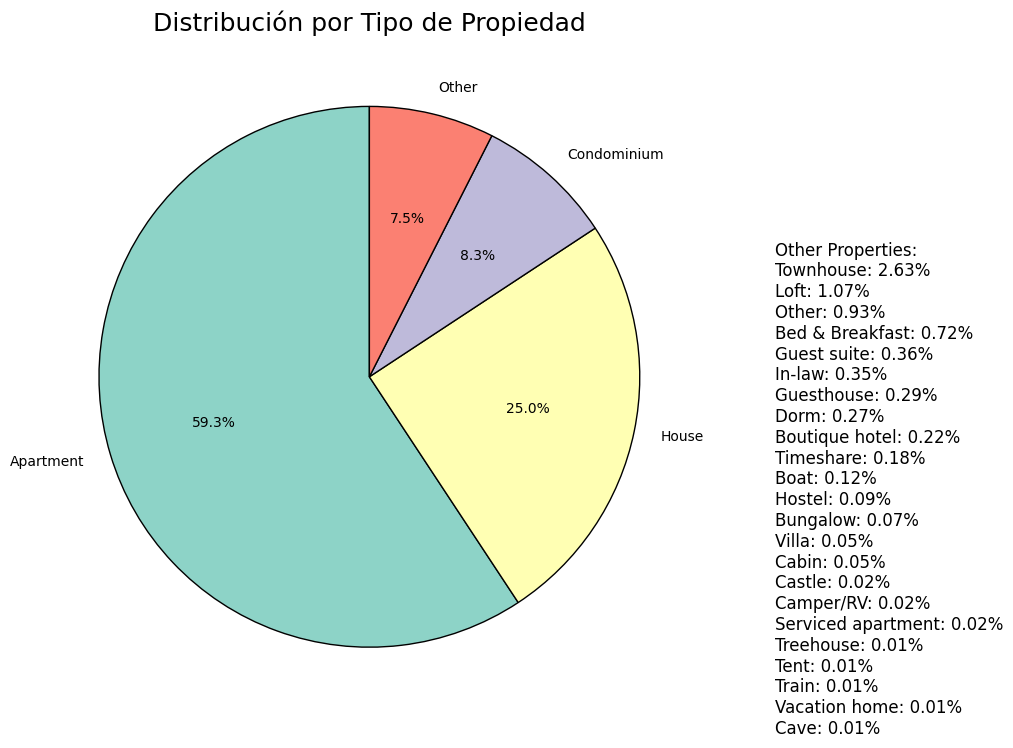

property_type
Apartment      10500
House           4426
Condominium     1462
Other           1325
Name: count, dtype: int64

In [ ]:
# Primero visualizaremos como se distribuye la variable "property_type" en todo el dataset con un grafico de torta


# Calculamos las frecuencias de cada tipo de propiedad
property_type_counts = airbnb_us_cleaning['property_type'].value_counts()




# Definimos el umbral para "Other". Agruparemos aquellos que tienen menos del 5% de las entradas totales
threshold = 0.05 * len(airbnb_us_cleaning)


# Agrupamos los tipos con menos de ese umbral como "Other"
property_type_counts_other = property_type_counts[property_type_counts > threshold]
other_count = property_type_counts[property_type_counts <= threshold].sum()


# Guardamos los tipos de propiedad que fueron agrupados en "Other"
other_properties = property_type_counts[property_type_counts <= threshold].index.tolist()

# Agregamos la categoría "Other"
property_type_counts_other['Other'] = other_count




# Gráficamos de torta con la categoría "Other"
plt.figure(figsize=(16, 8))  # Aumentar el tamaño para mayor espacio
ax = property_type_counts_other.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(property_type_counts_other)), wedgeprops={'edgecolor': 'black'})

# Título y ajuste
plt.title('Distribución por Tipo de Propiedad', fontsize=18)
plt.ylabel('')  # Ocultar la etiqueta del eje y


# Preparamos el texto solo con el porcentaje de "Other"
other_properties_percentage = "\n".join([f"{prop}: {count / property_type_counts.sum() * 100:.2f}%"
                                        for prop, count in zip(other_properties, property_type_counts[other_properties])])



# Ajustamos la posición del texto y agregar más separación
plt.text(1.5, 0.5, f"Other Properties:\n{other_properties_percentage}", fontsize=12, va='top', ha='left', wrap=True, fontweight='light')



plt.tight_layout()  # Ajustamos para que no se corte el gráfico
plt.show()

# Mostramos los valores de porcentaje de cada categoría
property_type_counts_other



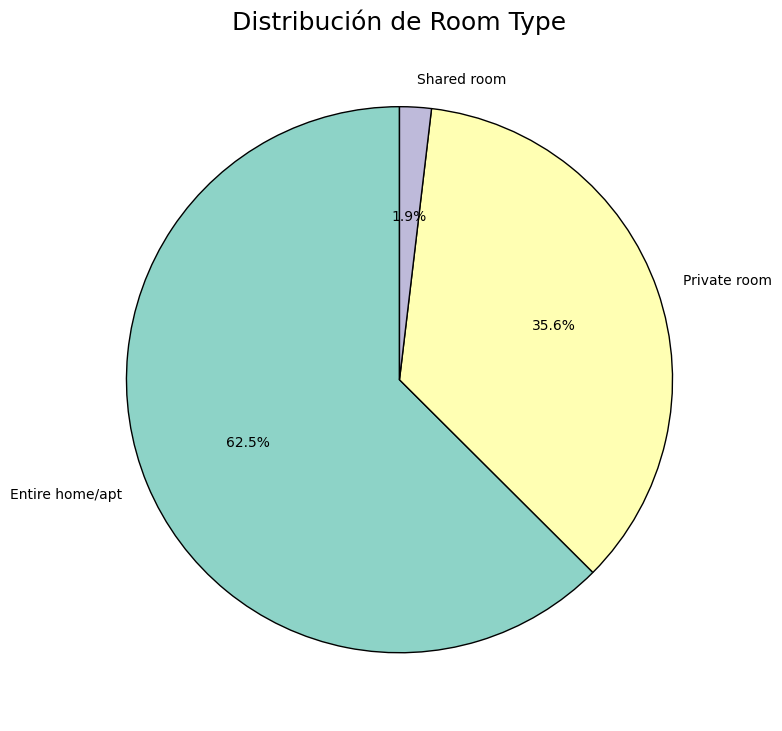

room_type
Entire home/apt    11076
Private room        6305
Shared room          332
Name: count, dtype: int64

In [ ]:
#Visualizaremos como se distribuye la variable "room_type" en todo el dataset con un grafico de torta




# Calculamos las frecuencias de cada tipo de habitación (room_type)
room_type_counts = airbnb_us_cleaning['room_type'].value_counts()


# Gráfico de torta para la distribución de room_type
plt.figure(figsize=(8, 8))
room_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(room_type_counts)), wedgeprops={'edgecolor': 'black'})


# Título y ajuste
plt.title('Distribución de Room Type', fontsize=18)
plt.ylabel('')  # Ocultamos la etiqueta del eje y

plt.tight_layout()  # Ajustamos para que no se corte el gráfico
plt.show()


# Mostramos las cantidades y porcentajes
room_type_counts


In [ ]:
# Veremos por cada tipo de propiedad como se distribuyen los diferentes tipos de cuartos de manera de entender mejor esta distribucion


# Generamos la tabla como en el ejemplo anterior
room_type_by_property = airbnb_us_cleaning.groupby(['property_type', 'room_type']).size().reset_index(name='count')
room_type_by_property['property_type_total'] = room_type_by_property.groupby('property_type')['count'].transform('sum')
room_type_by_property['percentage'] = (room_type_by_property['count'] / room_type_by_property['property_type_total']) * 100
room_type_by_property['percentage'] = room_type_by_property['percentage'].apply(lambda x: f"{x:.1f}%")
room_type_by_property = room_type_by_property[['property_type', 'room_type', 'count', 'property_type_total', 'percentage']]

# Mostramos la tabla final
room_type_by_property




property_type        room_type  count  property_type_total percentage
0            Apartment  Entire home/apt   7394                10500      70.4%
1            Apartment     Private room   2904                10500      27.7%
2            Apartment      Shared room    202                10500       1.9%
3      Bed & Breakfast  Entire home/apt     21                  127      16.5%
4      Bed & Breakfast     Private room     97                  127      76.4%
5      Bed & Breakfast      Shared room      9                  127       7.1%
6                 Boat  Entire home/apt     22                   22     100.0%
7       Boutique hotel  Entire home/apt     14                   39      35.9%
8       Boutique hotel     Private room     25                   39      64.1%
9             Bungalow  Entire home/apt     10                   13      76.9%
10            Bungalow     Private room      3                   13      23.1%
11               Cabin  Entire home/apt      6                    8      75.0%
12               Cabin     Private room      2                    8      25.0%
13           Camper/RV  Entire home/apt      3                    4      75.0%
14           Camper/RV     Private room      1                    4      25.0%
15              Castle  Entire home/apt      2                    4      50.0%
16              Castle     Private room      2                    4      50.0%
17                Cave     Private room      1                    1     100.0%
18         Condominium  Entire home/apt    965                 1462      66.0%
19         Condominium     Private room    483                 1462      33.0%
20         Condominium      Shared room     14                 1462       1.0%
21                Dorm  Entire home/apt      1                   47       2.1%
22                Dorm     Private room     22                   47      46.8%
23                Dorm      Shared room     24                   47      51.1%
24         Guest suite  Entire home/apt     37                   63      58.7%
25         Guest suite     Private room     26                   63      41.3%
26          Guesthouse  Entire home/apt     37                   51      72.5%
27          Guesthouse     Private room     13                   51      25.5%
28          Guesthouse      Shared room      1                   51       2.0%
29              Hostel     Private room     11                   16      68.8%
30              Hostel      Shared room      5                   16      31.2%
31               House  Entire home/apt   1999                 4426      45.2%
32               House     Private room   2367                 4426      53.5%
33               House      Shared room     60                 4426       1.4%
34              In-law  Entire home/apt     55                   62      88.7%
35              In-law     Private room      7                   62      11.3%
36                Loft  Entire home/apt    139                  189      73.5%
37                Loft     Private room     42                  189      22.2%
38                Loft      Shared room      8                  189       4.2%
39               Other  Entire home/apt    101                  165      61.2%
40               Other     Private room     58                  165      35.2%
41               Other      Shared room      6                  165       3.6%
42  Serviced apartment  Entire home/apt      3                    3     100.0%
43                Tent  Entire home/apt      1                    1     100.0%
44           Timeshare  Entire home/apt     24                   32      75.0%
45           Timeshare     Private room      8                   32      25.0%
46           Townhouse  Entire home/apt    239                  465      51.4%
47           Townhouse     Private room    223                  465      48.0%
48           Townhouse      Shared room      3                  465       0.6%
49               Train     Private room      1             

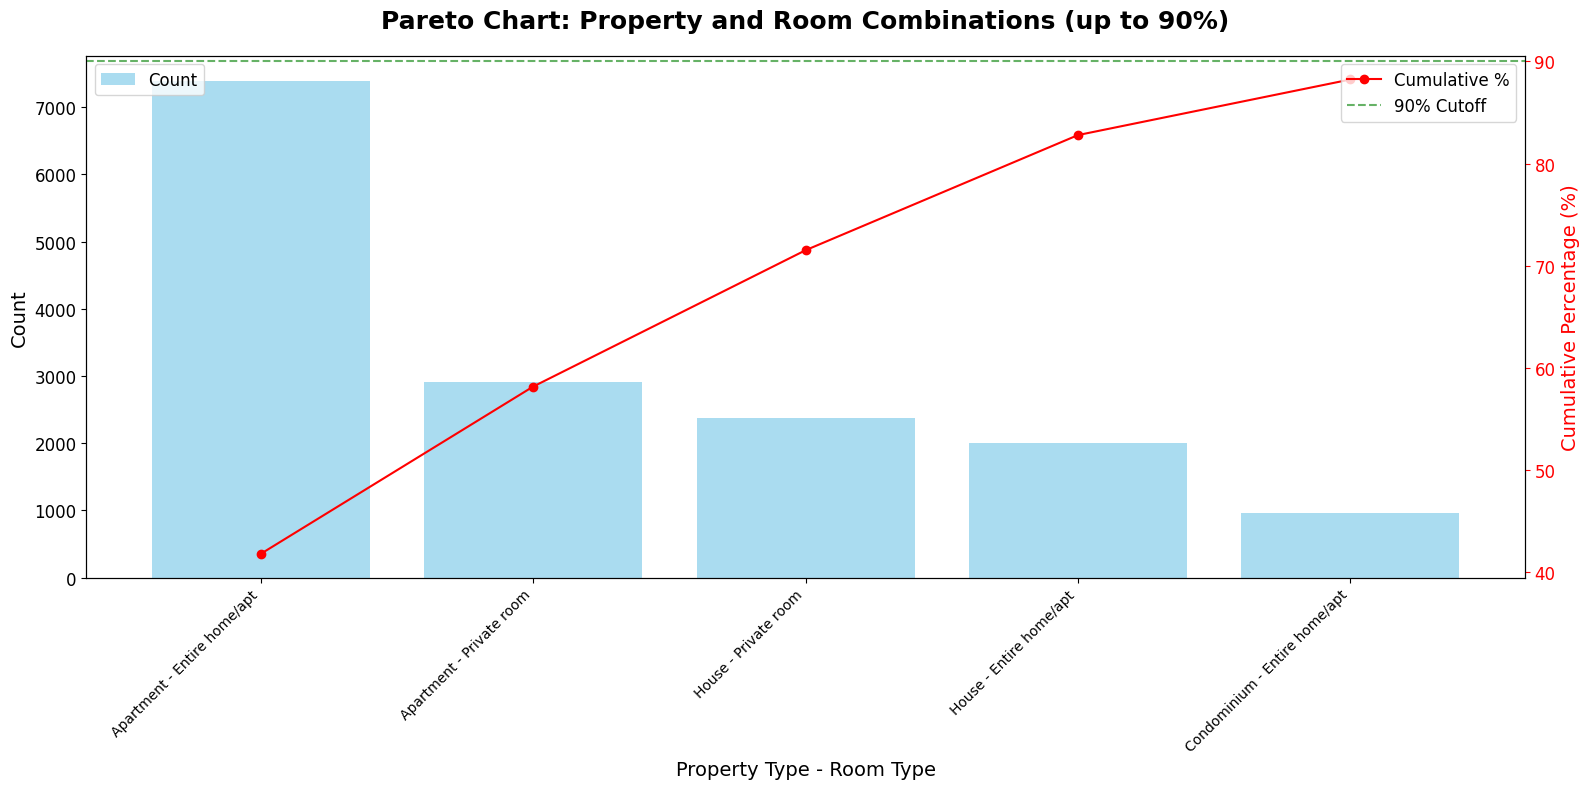

In [ ]:
# Ahora mostraremos solo los procentajes que siginfican esa combinacion de room y property sobre el dataset general y su porcentaje acumulado para luego hacer un grafico pareto



# 1. Agrupamos los datos por tipo de propiedad y habitación
room_type_by_property = airbnb_us_cleaning.groupby(['property_type', 'room_type']).size().reset_index(name='count')

# 2. Ordenamos los datos por 'count' de mayor a menor
room_type_by_property = room_type_by_property.sort_values(by="count", ascending=False)

# 3. Calculamos el porcentaje de cada combinación respecto al total
room_type_by_property["percentage"] = (room_type_by_property["count"] / room_type_by_property["count"].sum()) * 100

# 4. Calculamos el porcentaje acumulado
room_type_by_property["cumulative_percentage"] = room_type_by_property["percentage"].cumsum()

# 5. Filtramos los datos hasta el 90% del porcentaje acumulado
room_type_up_to_90 = room_type_by_property[room_type_by_property["cumulative_percentage"] <= 90].copy()

# Preparamos los datos para el gráfico
x_labels = room_type_up_to_90["property_type"] + " - " + room_type_up_to_90["room_type"]
counts = room_type_up_to_90["count"]
cumulative_percentages = room_type_up_to_90["cumulative_percentage"]

# Creamos el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(16, 8))

# Gráfico de barras para los counts
ax1.bar(x_labels, counts, color="skyblue", alpha=0.7, label="Count")
ax1.set_xlabel("Property Type - Room Type", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)
ax1.set_title("Pareto Chart: Property and Room Combinations (up to 90%)", fontsize=18, weight="bold", pad=20)
ax1.tick_params(axis="y", labelsize=12)

# Ajustamos las etiquetas del eje x
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=10)

# Gráfico de línea para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(range(len(x_labels)), cumulative_percentages, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=14, color="red")
ax2.tick_params(axis="y", colors="red", labelsize=12)

# Línea de referencia al 90%
ax2.axhline(y=90, color="green", linestyle="--", alpha=0.6, label="90% Cutoff")

# Agregamos leyendas
ax1.legend(loc="upper left", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)

# Ajustamos el diseño
plt.tight_layout()

# Mostramos el gráfico
plt.show()


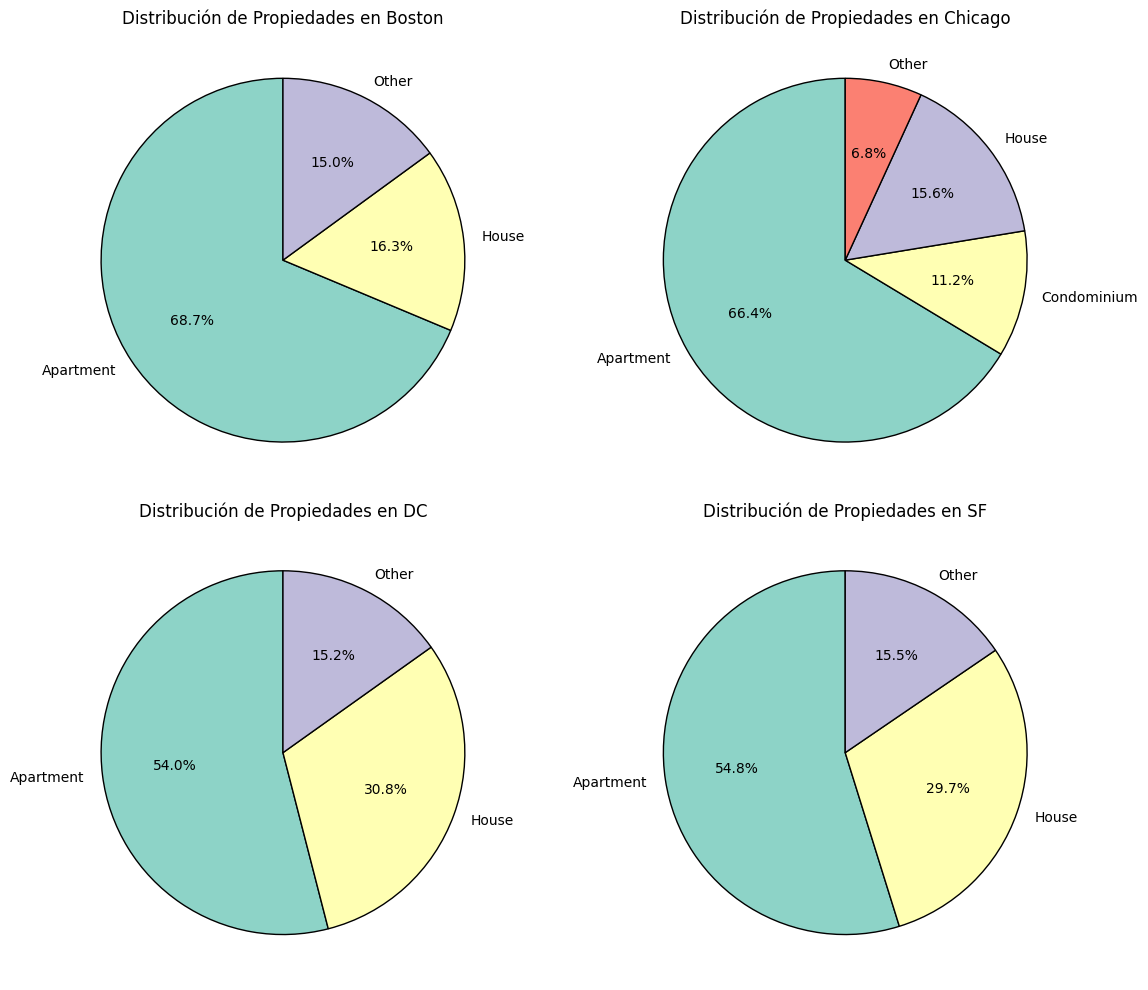

In [ ]:
# Ahora visualizaremos como se dsitribiyen los tipos de propiedades segun el barrio en el que se ubiquen a manera de entender mas el dataset

# Agrupamos datos por ciudad y tipo de propiedad
city_property_counts = airbnb_us_cleaning.groupby(['city', 'property_type']).size().reset_index(name='count')

# Iteramos sobre las ciudades únicas
cities = city_property_counts['city'].unique()

# Determinamos el número de filas y columnas (2x2)
ncols = 2
nrows = (len(cities) + ncols - 1) // ncols  # Calcula las filas necesarias para todas las ciudades

# Creamos subgráficos en una grilla
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 5))
axes = axes.flatten()  # Aplanamos la grilla para iterar fácilmente

for idx, city in enumerate(cities):
    # Filtramos datos para la ciudad actual
    city_data = city_property_counts[city_property_counts['city'] == city].copy()
    city_total = city_data['count'].sum()

    # Calculamos porcentajes
    city_data['percentage'] = city_data['count'] / city_total * 100

    # Identificamos propiedades principales (>= 10%)
    main_properties = city_data[city_data['percentage'] >= 10].copy()

    # Sumamos las categorías menores a 10% como "Other"
    other_count = city_data[city_data['percentage'] < 10]['count'].sum()
    if other_count > 0:
        other_percentage = other_count / city_total * 100
        other_row = pd.DataFrame([{'property_type': 'Other', 'count': other_count, 'percentage': other_percentage}])
        main_properties = pd.concat([main_properties, other_row], ignore_index=True)

    # Grafico de torta
    colors = sns.color_palette('Set3', len(main_properties))
    axes[idx].pie(main_properties['count'], labels=main_properties['property_type'],
                  autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

    # Título del gráfico
    axes[idx].set_title(f'Distribución de Propiedades en {city}', fontsize=12)

# Ocultamos los  ejes no utilizados (si la cantidad de ciudades no llena toda la grilla)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])  # Eliminamos los subgráficos extra

# Ajuste de diseño
plt.tight_layout()
plt.show()



In [ ]:
# Visualizaos en una tabla como se distribuyen los tipos de propiedades segun la ciudad en la que esten


# Agrupamos  por 'city' y 'property_type' y contar las ocurrencias
city_property_by_type = airbnb_us_cleaning.groupby(['city', 'property_type']).size().reset_index(name='count')

# Calculamos  el total de propiedades por ciudad
city_property_by_type['city_total'] = city_property_by_type.groupby('city')['count'].transform('sum')

# Calculamos el porcentaje por cada tipo de propiedad dentro de cada ciudad
city_property_by_type['percentage'] = (city_property_by_type['count'] / city_property_by_type['city_total']) * 100

# Formateamos el porcentaje a una sola decimal
city_property_by_type['percentage'] = city_property_by_type['percentage'].apply(lambda x: f"{x:.1f}%")


# Seleccionamos las columnas relevantes
city_property_by_type = city_property_by_type[['city', 'property_type', 'count', 'city_total', 'percentage']]


city_property_by_type



city    property_type  count  city_total percentage
0   Boston        Apartment   2363        3440      68.7%
1   Boston  Bed & Breakfast     17        3440       0.5%
2   Boston             Boat     10        3440       0.3%
3   Boston   Boutique hotel      1        3440       0.0%
4   Boston      Condominium    335        3440       9.7%
..     ...              ...    ...         ...        ...
71      SF             Tent      1        6340       0.0%
72      SF        Timeshare     30        6340       0.5%
73      SF        Townhouse     46        6340       0.7%
74      SF        Treehouse      2        6340       0.0%
75      SF            Villa      2        6340       0.0%

[76 rows x 5 columns]

In [ ]:
# Agrupar por 'city' y 'property_type' y contar las ocurrencias
city_property_by_type = airbnb_us_cleaning.groupby(['city', 'property_type']).size().reset_index(name='count')

# Calcular el porcentaje respecto al total del dataset
dataset_total = city_property_by_type['count'].sum()
city_property_by_type['percentage'] = (city_property_by_type['count'] / dataset_total) * 100

# Calcular el porcentaje acumulado
city_property_by_type = city_property_by_type.sort_values(by='count', ascending=False)  # Ordenar por 'count'
city_property_by_type['cumulative_percentage'] = city_property_by_type['percentage'].cumsum()

# Formatear los porcentajes a una sola decimal
city_property_by_type['percentage'] = city_property_by_type['percentage'].apply(lambda x: f"{x:.1f}%")
city_property_by_type['cumulative_percentage'] = city_property_by_type['cumulative_percentage'].apply(lambda x: f"{x:.1f}%")

# Seleccionar las columnas relevantes
city_property_by_type = city_property_by_type[['city', 'property_type', 'count', 'percentage', 'cumulative_percentage']]

# Mostrar la tabla final
city_property_by_type


city       property_type  count percentage cumulative_percentage
52       SF           Apartment   3475      19.6%                 19.6%
34       DC           Apartment   2634      14.9%                 34.5%
0    Boston           Apartment   2363      13.3%                 47.8%
17  Chicago           Apartment   2028      11.4%                 59.3%
66       SF               House   1884      10.6%                 69.9%
..      ...                 ...    ...        ...                   ...
33  Chicago               Villa      1       0.0%                100.0%
36       DC                Boat      1       0.0%                100.0%
39       DC              Castle      1       0.0%                100.0%
49       DC  Serviced apartment      1       0.0%                100.0%
38       DC               Cabin      1       0.0%                100.0%

[76 rows x 5 columns]

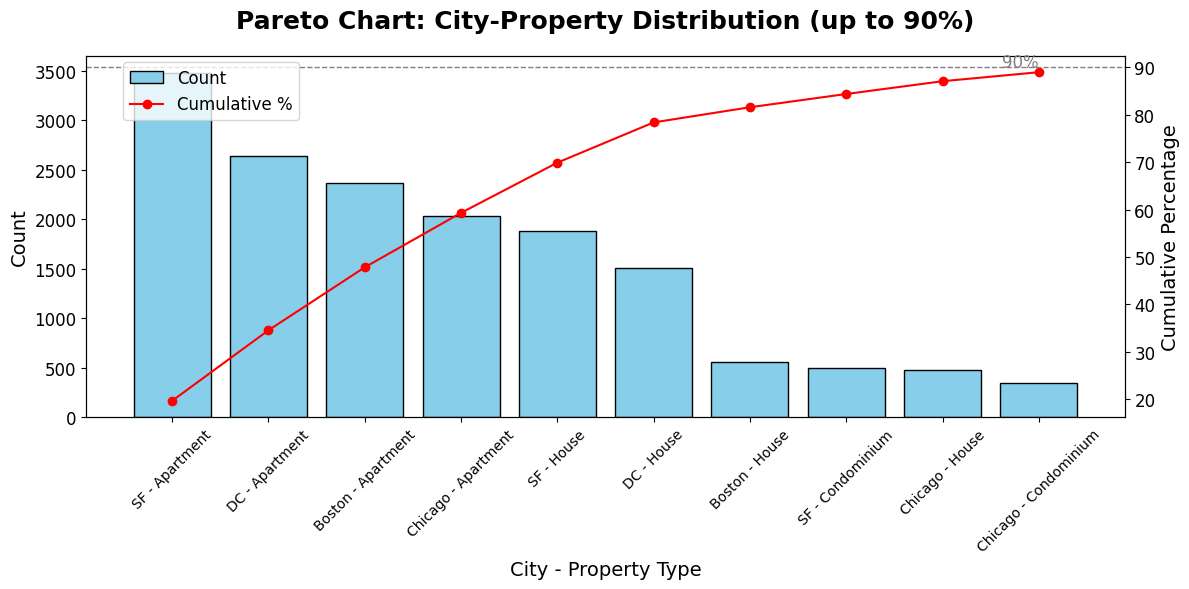

In [ ]:
# Ahora mostraremos solo los procentajes que siginfican esa combinacion de city y property sobre el dataset general y su porcentaje acumulado para luego hacer un grafico pareto


# Creamos columna combinada para city-property
city_property_by_type['city_property'] = city_property_by_type['city'] + " - " + city_property_by_type['property_type']

# Convertimos los porcentajes acumulados a valores numéricos
city_property_by_type['cumulative_percentage_numeric'] = city_property_by_type['cumulative_percentage'].str.rstrip('%').astype(float)

# Filtramos combinaciones principales (hasta 90%)
main_combinations = city_property_by_type[city_property_by_type['cumulative_percentage_numeric'] <= 90].copy()

# Preparmos datos para el gráfico
x_labels = main_combinations['city_property']
counts = main_combinations['count']
cumulative_percentages = main_combinations['cumulative_percentage_numeric']

# Creamos el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para los conteos
bars = ax1.bar(x_labels, counts, color='skyblue', edgecolor='black', label='Count')
ax1.set_xlabel('City - Property Type', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=12)

# Línea para el porcentaje acumulado
ax2 = ax1.twinx()
line = ax2.plot(x_labels, cumulative_percentages, color='red', marker='o', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

# Líneas de referencia
ax2.axhline(90, color='gray', linestyle='--', linewidth=1)
ax2.text(len(x_labels) - 1, 90, '90%', color='gray', fontsize=12, ha='right')

# Título y leyendas
plt.title('Pareto Chart: City-Property Distribution (up to 90%)', fontsize=18, weight='bold', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Ajuste de diseño
plt.tight_layout()
plt.show()



In [ ]:
# Ahora dentro de esas propiedades por barrio lo agrupo por tipo de cuarto y vemos mas en detalle como esta compuesto

# Agruparmos por 'city', 'property_type', y 'room_type' y contar las ocurrencias
city_property_room_by_type = airbnb_us_cleaning.groupby(['city', 'property_type', 'room_type']).size().reset_index(name='count')

# Calculamos  el total de propiedades por ciudad
city_property_room_by_type['city_total'] = city_property_room_by_type.groupby('city')['count'].transform('sum')

# Calculamos el porcentaje por cada tipo de propiedad y habitación dentro de cada ciudad
city_property_room_by_type['percentage'] = (city_property_room_by_type['count'] / city_property_room_by_type['city_total']) * 100

# Formateamos el porcentaje a una sola decimal
city_property_room_by_type['percentage'] = city_property_room_by_type['percentage'].apply(lambda x: f"{x:.1f}%")

# Seleccionamos las columnas relevantes
city_property_room_by_type = city_property_room_by_type[['city', 'property_type', 'room_type', 'count', 'city_total', 'percentage']]


# Mostramos el resultado final
city_property_room_by_type


city    property_type        room_type  count  city_total percentage
0    Boston        Apartment  Entire home/apt   1630        3440      47.4%
1    Boston        Apartment     Private room    701        3440      20.4%
2    Boston        Apartment      Shared room     32        3440       0.9%
3    Boston  Bed & Breakfast  Entire home/apt      1        3440       0.0%
4    Boston  Bed & Breakfast     Private room     16        3440       0.5%
..      ...              ...              ...    ...         ...        ...
140      SF        Timeshare     Private room      6        6340       0.1%
141      SF        Townhouse  Entire home/apt     16        6340       0.3%
142      SF        Townhouse     Private room     30        6340       0.5%
143      SF        Treehouse  Entire home/apt      2        6340       0.0%
144      SF            Villa     Private room      2        6340       0.0%

[145 rows x 6 columns]

In [ ]:
# Calculamos  los porcentajes agrupados  en el filtro por ciudad m tipo de propiedad y tipo de cuarto

# Agrupamos por 'city', 'property_type', y 'room_type' y contamos las ocurrencias
city_property_room_by_type = airbnb_us_cleaning.groupby(['city', 'property_type', 'room_type']).size().reset_index(name='count')

# Calculamos el total de propiedades en el dataset completo
total_properties = city_property_room_by_type['count'].sum()

# Calculamos el porcentaje total respecto al dataset completo
city_property_room_by_type['global_percentage'] = (city_property_room_by_type['count'] / total_properties) * 100

# Calculamos el porcentaje acumulado global
city_property_room_by_type = city_property_room_by_type.sort_values(by='count', ascending=False)
city_property_room_by_type['cumulative_percentage'] = city_property_room_by_type['count'].cumsum() / total_properties * 100

# Formateamos los porcentajes a una sola decimal
city_property_room_by_type['global_percentage'] = city_property_room_by_type['global_percentage'].apply(lambda x: f"{x:.1f}%")
city_property_room_by_type['cumulative_percentage'] = city_property_room_by_type['cumulative_percentage'].apply(lambda x: f"{x:.1f}%")

# Seleccionamos y reorganizamos las columnas relevantes
city_property_room_by_type = city_property_room_by_type[['city', 'property_type', 'room_type', 'count', 'global_percentage', 'cumulative_percentage']]

# Reiniciamos el índice para claridad
city_property_room_by_type = city_property_room_by_type.reset_index(drop=True)

# Mostramos el resultado final
city_property_room_by_type


city property_type        room_type  count global_percentage  \
0         SF     Apartment  Entire home/apt   2211             12.5%   
1         DC     Apartment  Entire home/apt   2197             12.4%   
2     Boston     Apartment  Entire home/apt   1630              9.2%   
3    Chicago     Apartment  Entire home/apt   1356              7.7%   
4         SF     Apartment     Private room   1212              6.8%   
..       ...           ...              ...    ...               ...   
140       DC    Guesthouse      Shared room      1              0.0%   
141       SF        Castle  Entire home/apt      1              0.0%   
142       SF     Camper/RV     Private room      1              0.0%   
143       DC         Other      Shared room      1              0.0%   
144       DC        Castle  Entire home/apt      1              0.0%   

    cumulative_percentage  
0                   12.5%  
1                   24.9%  
2                   34.1%  
3                   41.7%  
4                   48.6%  
..                    ...  
140                100.0%  
141                100.0%  
142                100.0%  
143                100.0%  
144                100.0%  

[145 rows x 6 columns]

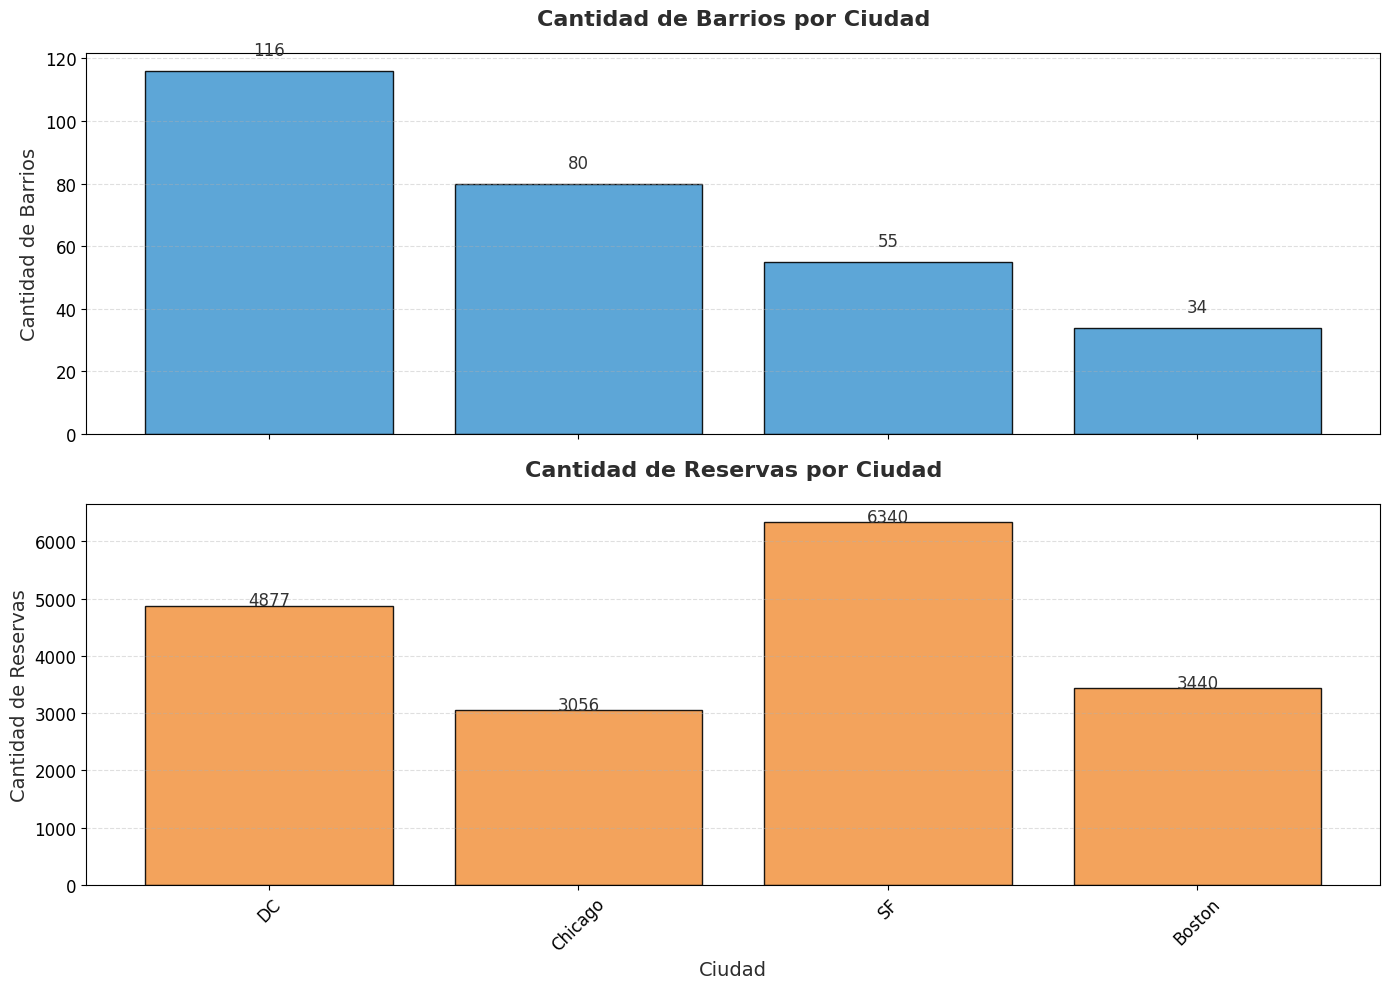

In [ ]:
#Analizamos como se distribuyen ahora la cantidad de barrios por ciudad y cuanto representa eso en el ttoal de las reservaciones del dataset




# Agrupamos por ciudad para contar barrios únicos y reservas totales
city_summary = airbnb_us_cleaning.groupby('city').agg(
    neighbourhood_count=('neighbourhood', 'nunique'),
    reservation_count=('neighbourhood', 'size')
).reset_index()



# Ordenamos por la cantidad de barrios descendente
city_summary = city_summary.sort_values(by='neighbourhood_count', ascending=False)



# Creamos  la figura y los ejes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 1]})



# Estilo para las barras y texto
bar_color1 = '#4B9CD3'  # Azul para los barrios
bar_color2 = '#F2994A'  # Naranja para las reservas
text_color = '#333333'   # Color para las etiquetas de texto



# Gráfico 1: Cantidad de barrios por ciudad
bars1 = ax1.bar(city_summary['city'], city_summary['neighbourhood_count'], color=bar_color1, alpha=0.9, edgecolor='black')
ax1.set_title('Cantidad de Barrios por Ciudad', fontsize=16, weight='bold', pad=20, color='#2D2D2D')
ax1.set_ylabel('Cantidad de Barrios', fontsize=14, color='#2D2D2D')
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12, rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.4)



# Añadimos etiquetas de valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', color=text_color, fontsize=12)



# Gráfico 2: Cantidad de reservas por ciudad
bars2 = ax2.bar(city_summary['city'], city_summary['reservation_count'], color=bar_color2, alpha=0.9, edgecolor='black')
ax2.set_title('Cantidad de Reservas por Ciudad', fontsize=16, weight='bold', pad=20, color='#2D2D2D')
ax2.set_xlabel('Ciudad', fontsize=14, color='#2D2D2D')
ax2.set_ylabel('Cantidad de Reservas', fontsize=14, color='#2D2D2D')
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12, rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.4)



# Añadimos  etiquetas de valores encima de las barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', color=text_color, fontsize=12)


# Ajustamos el diseño para que no se solapen los elementos
plt.tight_layout()


# Mostramos el gráfico
plt.show()



In [ ]:
#Misma informacion que en el grafico anterior pero visualizandola en una tabla


# Calculamos el total de barrios y reservas en el dataset
total_neighbourhoods = airbnb_us_cleaning['neighbourhood'].nunique()
total_reservations = airbnb_us_cleaning.shape[0]

# Agrupamos por ciudad para contar barrios únicos y reservas totales
city_summary = airbnb_us_cleaning.groupby('city').agg(
    neighbourhood_count=('neighbourhood', 'nunique'),
    reservation_count=('neighbourhood', 'size')
).reset_index()

# Calculamos el porcentaje de barrios y reservas con respecto al total
city_summary['neighbourhood_percentage'] = (city_summary['neighbourhood_count'] / total_neighbourhoods) * 100
city_summary['reservation_percentage'] = (city_summary['reservation_count'] / total_reservations) * 100

# Formateamos los porcentajes con una sola decimal
city_summary['neighbourhood_percentage'] = city_summary['neighbourhood_percentage'].apply(lambda x: f"{x:.1f}%")
city_summary['reservation_percentage'] = city_summary['reservation_percentage'].apply(lambda x: f"{x:.1f}%")

# Seleccionamos y reorganizamos las columnas para la tabla final
city_summary = city_summary[['city', 'neighbourhood_count', 'reservation_count', 'neighbourhood_percentage', 'reservation_percentage']]

# Mostramos la tabla final
city_summary



city  neighbourhood_count  reservation_count neighbourhood_percentage  \
0   Boston                   34               3440                    12.2%   
1  Chicago                   80               3056                    28.8%   
2       DC                  116               4877                    41.7%   
3       SF                   55               6340                    19.8%   

  reservation_percentage  
0                  19.4%  
1                  17.3%  
2                  27.5%  
3                  35.8%

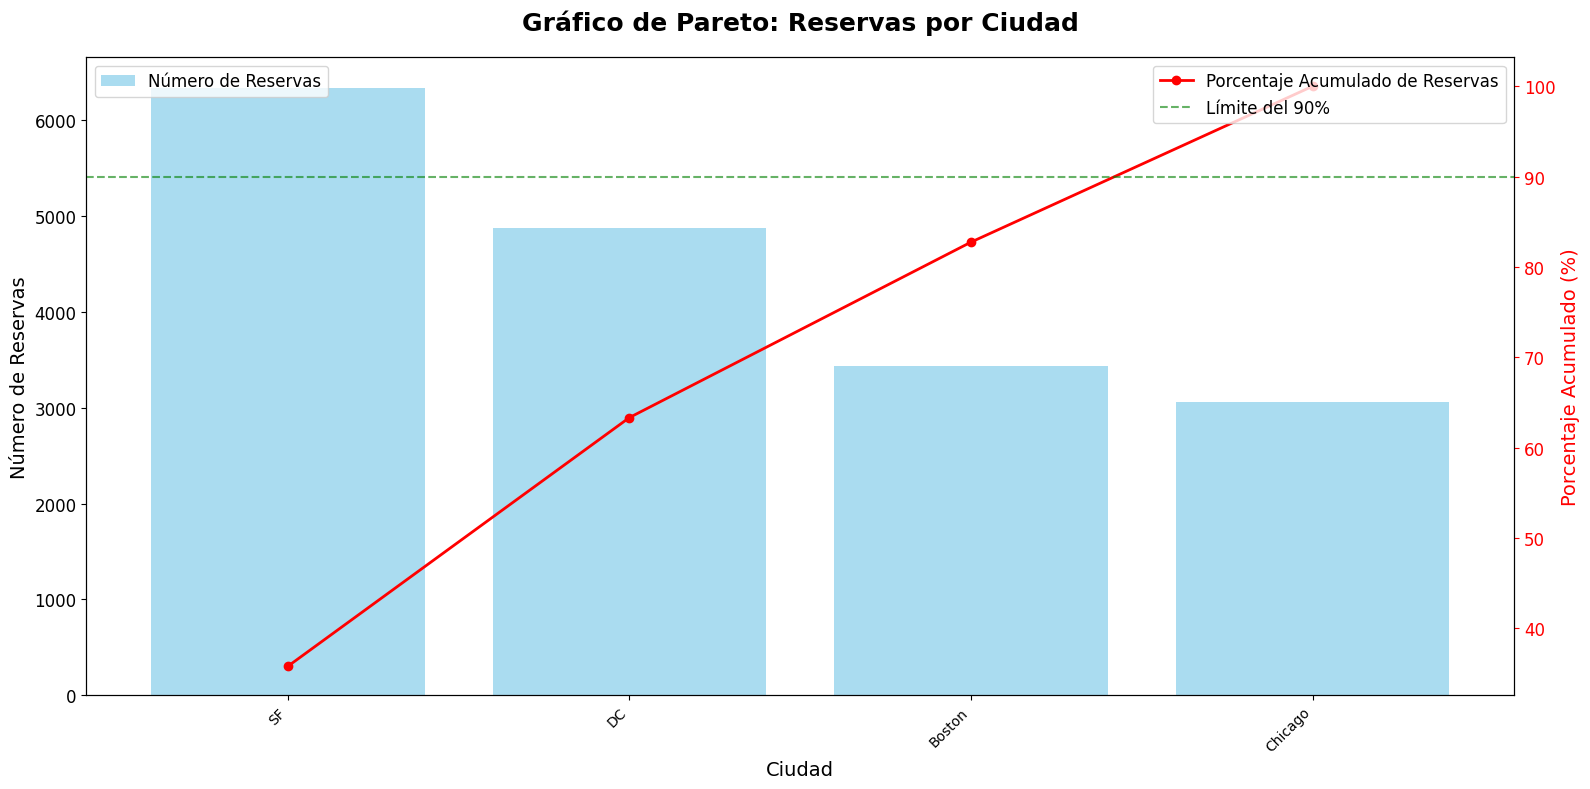

In [ ]:

# Ordenamos el DataFrame por cantidad de reservas de forma descendente
city_summary = city_summary.sort_values(by='reservation_count', ascending=False)

# Calculamos el porcentaje acumulado de reservas
city_summary['cumulative_reservation_percentage'] = city_summary['reservation_count'].cumsum() / total_reservations * 100

# Crear gráfico de Pareto con barras para el número de reservas y línea para el porcentaje acumulado
fig, ax1 = plt.subplots(figsize=(16, 8))

# Gráfico de barras para el número de reservas
ax1.bar(city_summary['city'], city_summary['reservation_count'], color='skyblue', alpha=0.7, label='Número de Reservas')
ax1.set_xlabel('Ciudad', fontsize=14)
ax1.set_ylabel('Número de Reservas', fontsize=14)
ax1.set_title('Gráfico de Pareto: Reservas por Ciudad', fontsize=18, weight='bold', pad=20)
ax1.tick_params(axis='y', labelsize=12)

# Ajustamos las etiquetas del eje x
ax1.set_xticks(range(len(city_summary['city'])))
ax1.set_xticklabels(city_summary['city'], rotation=45, ha='right', fontsize=10)

# Gráfico de línea para el porcentaje acumulado de reservas
ax2 = ax1.twinx()
ax2.plot(city_summary['city'], city_summary['cumulative_reservation_percentage'], color='red', marker='o', linestyle='-', label='Porcentaje Acumulado de Reservas', linewidth=2)
ax2.set_ylabel('Porcentaje Acumulado (%)', fontsize=14, color='red')
ax2.tick_params(axis='y', colors='red', labelsize=12)

# Línea de referencia para el 90%
ax2.axhline(y=90, color='green', linestyle='--', alpha=0.6, label='Límite del 90%')

# Agregamos leyenda
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Ajustamos el diseño
plt.tight_layout()

# Mostramos el gráfico
plt.show()


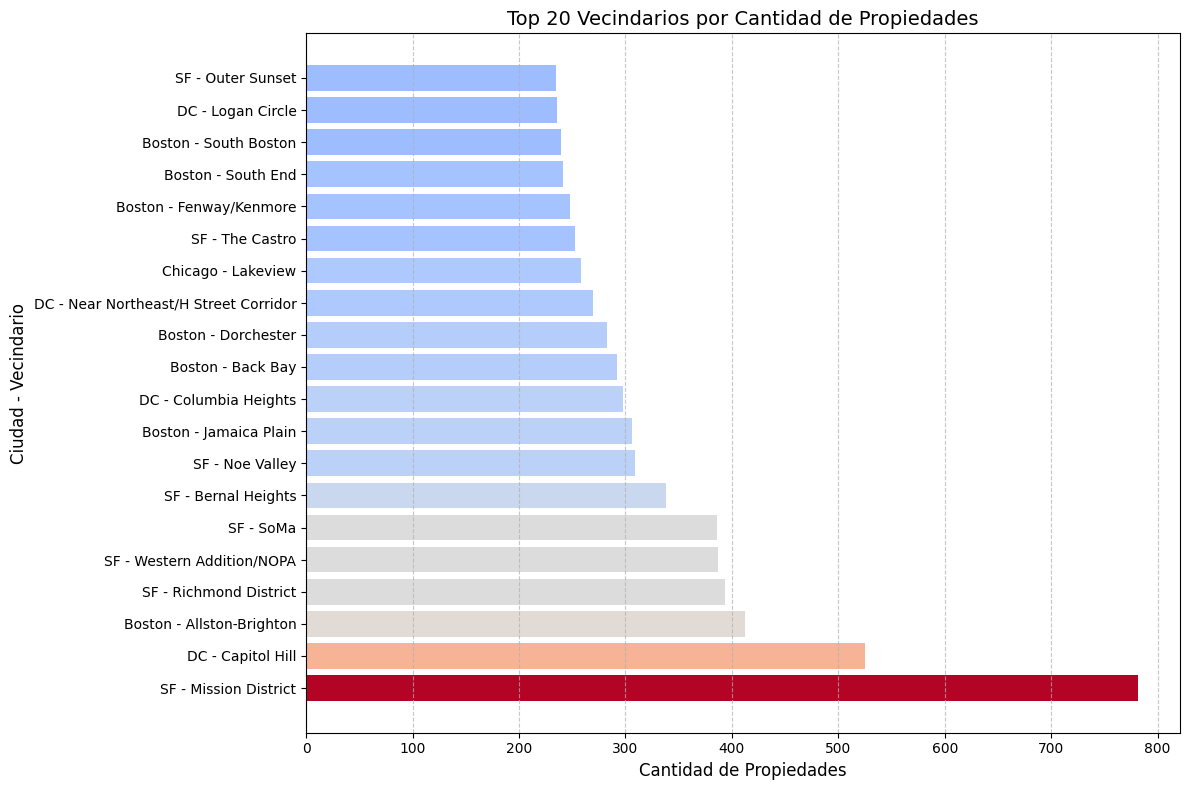

In [ ]:

# Agrupamos por 'city' y 'neighbourhood' y calcular las métricas requeridas
city_neighbourhood = airbnb_us_cleaning.groupby(['city', 'neighbourhood']).agg(
    count=('price', 'size'),
    avg_price=('price', 'mean'),
    min_price=('price', 'min'),
    max_price=('price', 'max')
).reset_index()

# Calculamos el total de propiedades en todo el dataset
total_properties = city_neighbourhood['count'].sum()

# Calculamos el porcentaje basado en el total del dataset
city_neighbourhood['percentage'] = (city_neighbourhood['count'] / total_properties) * 100

# Formateamos el porcentaje a dos decimales
city_neighbourhood['percentage'] = city_neighbourhood['percentage'].apply(lambda x: round(x, 1))

# Formateamos los precios a dos decimales
city_neighbourhood['avg_price'] = city_neighbourhood['avg_price'].apply(lambda x: round(x, 2))
city_neighbourhood['min_price'] = city_neighbourhood['min_price'].apply(lambda x: round(x, 2))
city_neighbourhood['max_price'] = city_neighbourhood['max_price'].apply(lambda x: round(x, 2))

# Ordenamos por 'count' de mayor a menor
city_neighbourhood = city_neighbourhood.sort_values(by='count', ascending=False)

# Seleccionamos las columnas relevantes
city_neighbourhood = city_neighbourhood[['city', 'neighbourhood', 'count', 'percentage', 'avg_price', 'min_price', 'max_price']]

# Creamos una nueva columna combinada para eje vertical: 'city - neighbourhood'
city_neighbourhood['label'] = city_neighbourhood['city'] + " - " + city_neighbourhood['neighbourhood']

# Creamos el gráfico
plt.figure(figsize=(12, 8))
bar_colors = plt.cm.coolwarm(city_neighbourhood['percentage'] / city_neighbourhood['percentage'].max())  # Escala de colores según el porcentaje

plt.barh(
    city_neighbourhood['label'][:20],  # Etiqueta combinada (ciudad - vecindario)
    city_neighbourhood['count'][:20],  # Cantidad de propiedades
    color=bar_colors
)

# Configuracion de  etiquetas y títulos
plt.title('Top 20 Vecindarios por Cantidad de Propiedades', fontsize=14)
plt.xlabel('Cantidad de Propiedades', fontsize=12)
plt.ylabel('Ciudad - Vecindario', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos el gráfico
plt.show()



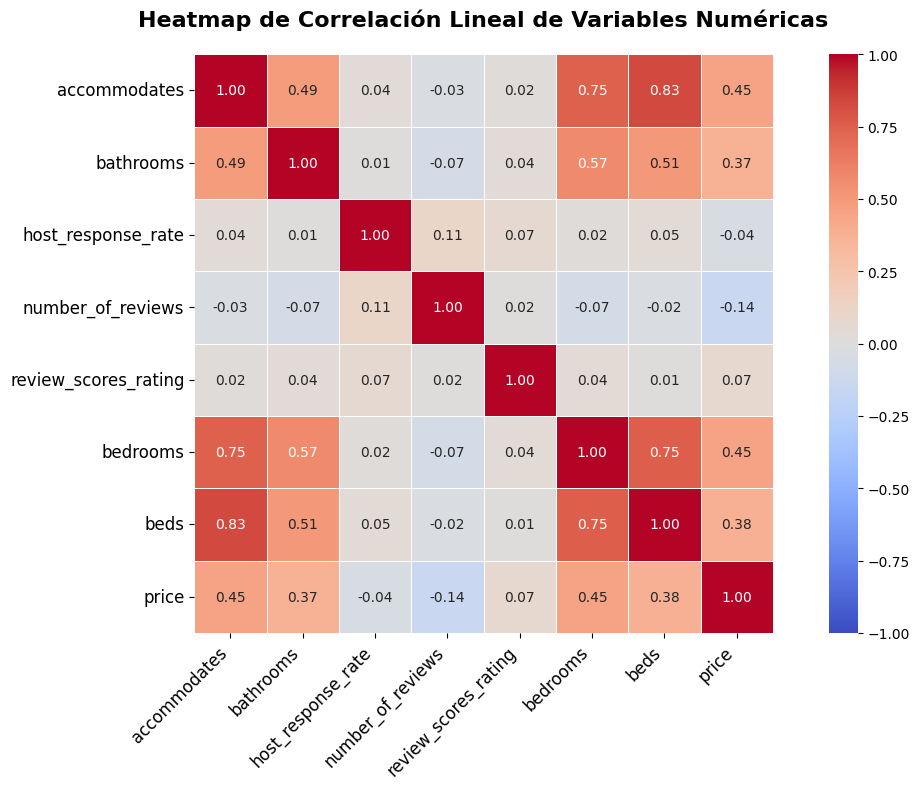

In [ ]:
# Ahora analizamos la correlacion lineal que hya entre las diferentes variables numericas del dataset, para ver si hay alguna correlacion entre algunas de las avriables , en este caso nos interesan las que mas se correlacionan con la variable precio a predecir



# Seleccionamos solo las columnas numéricas del DataFrame
numerical_data = airbnb_us_cleaning.select_dtypes(include=['float64', 'int64'])


# Agregamos 'host_response_rate' si está presente en el DataFrame
if 'host_response_rate' in airbnb_us_cleaning.columns:
    numerical_data['host_response_rate'] = airbnb_us_cleaning['host_response_rate'].apply(pd.to_numeric, errors='coerce')


# Eliminamos las columnas 'id', 'longitude' y 'latitude'
numerical_data = numerical_data.drop(columns=['id', 'longitude', 'latitude'], errors='ignore')


# Calculamos la matriz de correlación
correlation_matrix = numerical_data.corr()


# Creamos el heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, linewidths=0.5)


# Ajustamos el título y los ejes
plt.title('Heatmap de Correlación Lineal de Variables Numéricas', fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Mostramos el gráfico
plt.tight_layout()
plt.show()



In [ ]:

# Creamos  la columna log_price
airbnb_us_cleaning['log_price'] = np.log1p(airbnb_us_cleaning['price'])

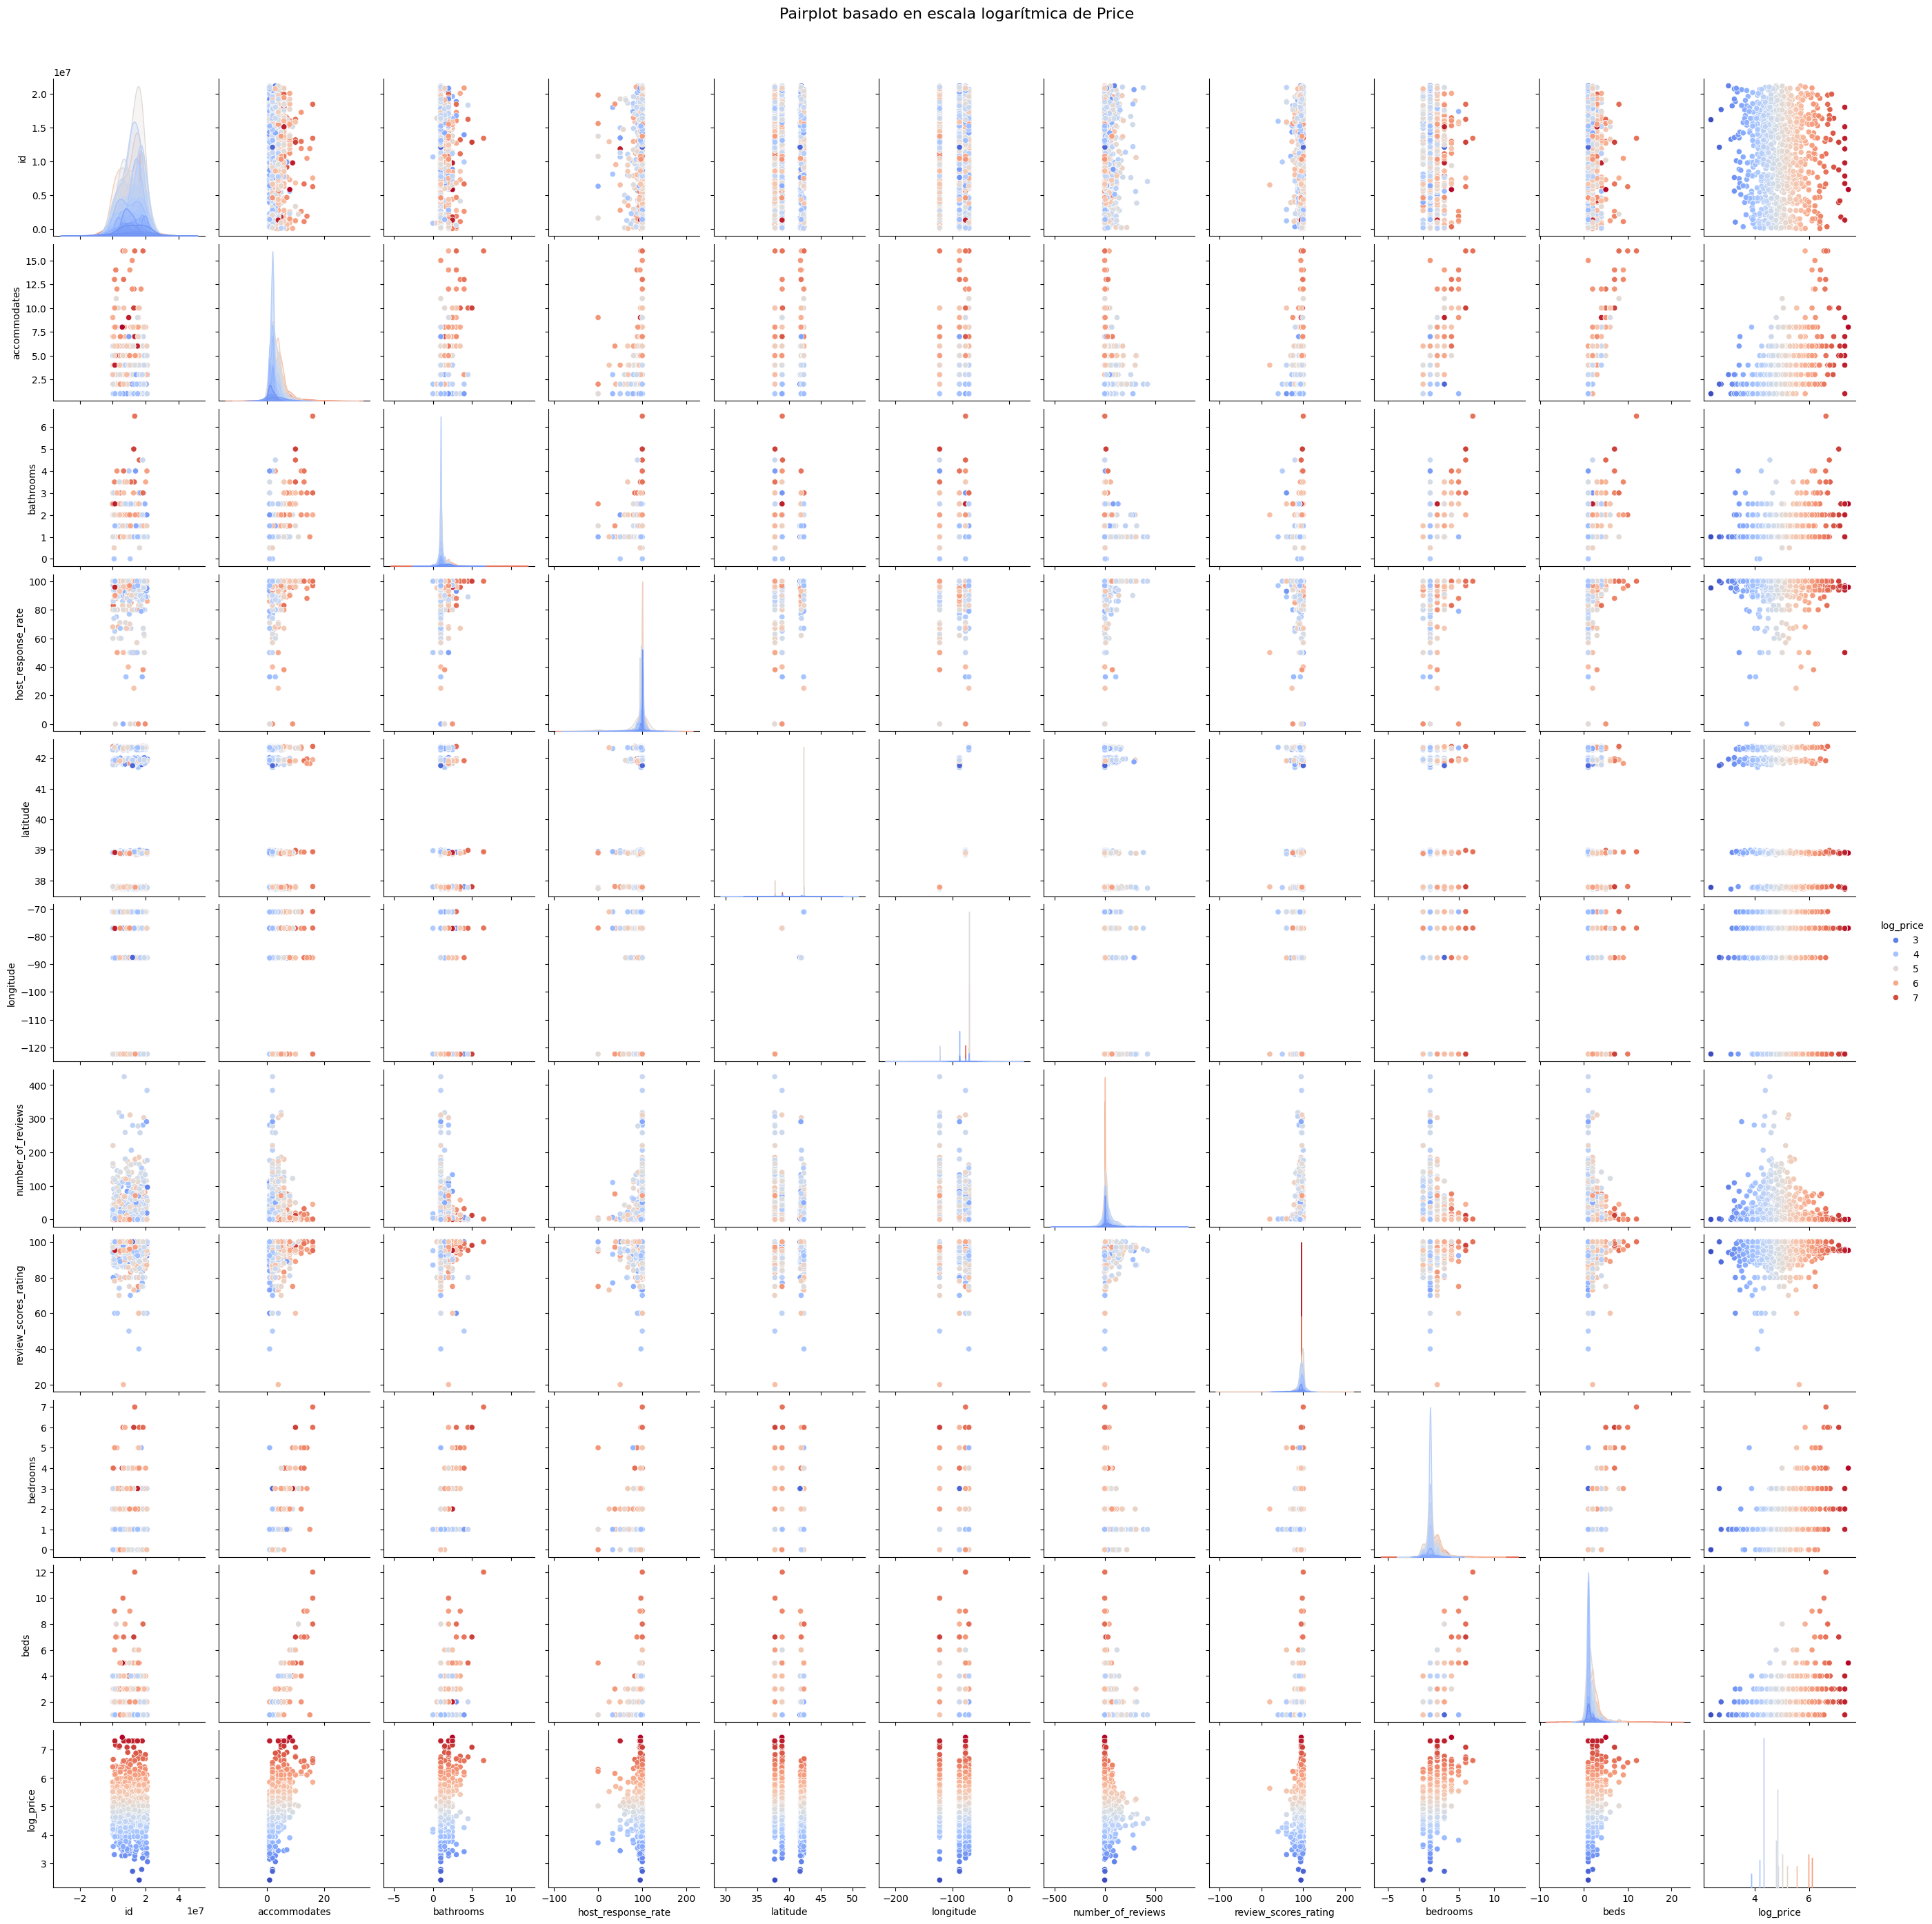

In [ ]:
# Visualizamos un Pairplot con la variable Price en escala logaritmica para ver si hay clases bien separables



# Seleccionamos columnas numéricas relevantes
numerical_columns = airbnb_us_cleaning.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['price'], errors='ignore')  # Excluir 'price' para trabajar con 'log_price'



# Reducimos el tamaño del dataset si tiene demasiados datos
sampled_data = airbnb_us_cleaning.sample(1000, random_state=42)  # Ajustamos el número según sea necesario



# Generar el pairplot
sns.pairplot(
    sampled_data,
    vars=numerical_columns,  # Incluir solo las variables seleccionadas
    hue='log_price',         # Usar 'log_price' como eje de color
    palette='coolwarm',      # Paleta de colores
    diag_kind='kde',         # Graficar KDE en la diagonal
    height=2.5               # Ajustar el tamaño de los gráficos
)

# Mostramos el gráfico
plt.suptitle('Pairplot basado en escala logarítmica de Price', y=1.02, fontsize=16)
plt.show()



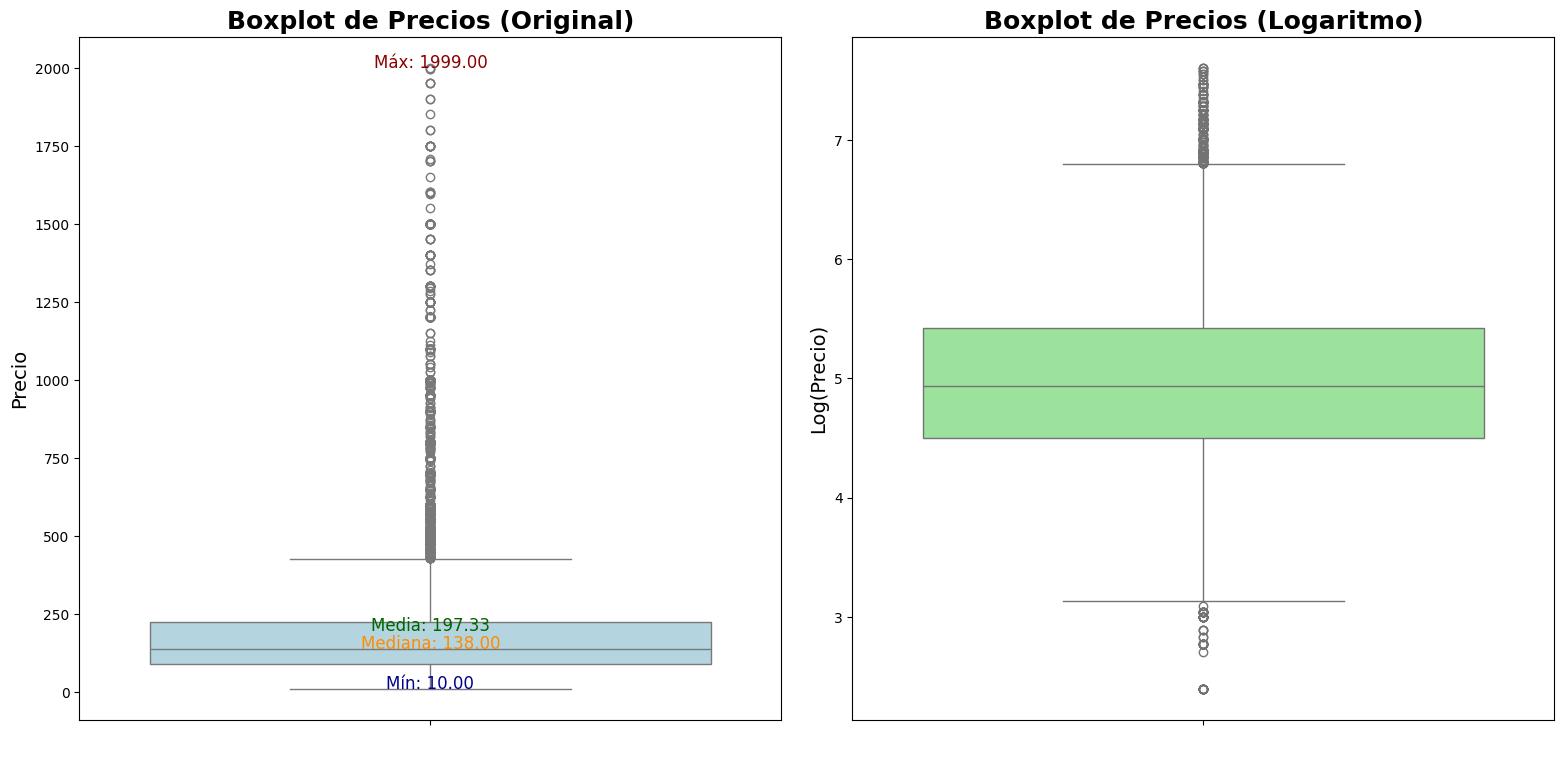

In [ ]:
# Analizamos la variable precio  haciendo un boxplot de la misma para sacar los principales indicadores y laa visualizamos en su distribucion logaritimica para que quede en una mejor escala



# Creamos  una figura con dos subgráficos en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


# Boxplot Vertical para 'price' (original)
sns.boxplot(data=airbnb_us_cleaning, y='price', color='lightblue', ax=ax1)


# Títulos y etiquetas para el primer boxplot
ax1.set_title('Boxplot de Precios (Original)', fontsize=18, fontweight='bold')
ax1.set_ylabel('Precio', fontsize=14)
ax1.set_xlabel(' ', fontsize=14)  # Sin etiqueta en el eje X


# Calculo e indicacion los principales valores en el boxplot original
median = airbnb_us_cleaning['price'].median()
mean = airbnb_us_cleaning['price'].mean()
min_price = airbnb_us_cleaning['price'].min()
max_price = airbnb_us_cleaning['price'].max()


# Agregamos texto en el gráfico
ax1.text(0, min_price, f'Mín: {min_price:.2f}', horizontalalignment='center', fontsize=12, color='darkblue')
ax1.text(0, max_price, f'Máx: {max_price:.2f}', horizontalalignment='center', fontsize=12, color='darkred')
ax1.text(0, mean, f'Media: {mean:.2f}', horizontalalignment='center', fontsize=12, color='darkgreen')
ax1.text(0, median, f'Mediana: {median:.2f}', horizontalalignment='center', fontsize=12, color='darkorange')


# Boxplot Logarítmico para 'price' (log aplicado)
sns.boxplot(data=airbnb_us_cleaning, y=np.log1p(airbnb_us_cleaning['price']), color='lightgreen', ax=ax2)


# Títulos y etiquetas para el segundo boxplot
ax2.set_title('Boxplot de Precios (Logaritmo)', fontsize=18, fontweight='bold')
ax2.set_ylabel('Log(Precio)', fontsize=14)
ax2.set_xlabel(' ', fontsize=14)  # Sin etiqueta en el eje X


# Ajustamos el layout para que los gráficos no se superpongan
plt.tight_layout(pad=2.0)
plt.show()




<ipython-input-42-173199338d52>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


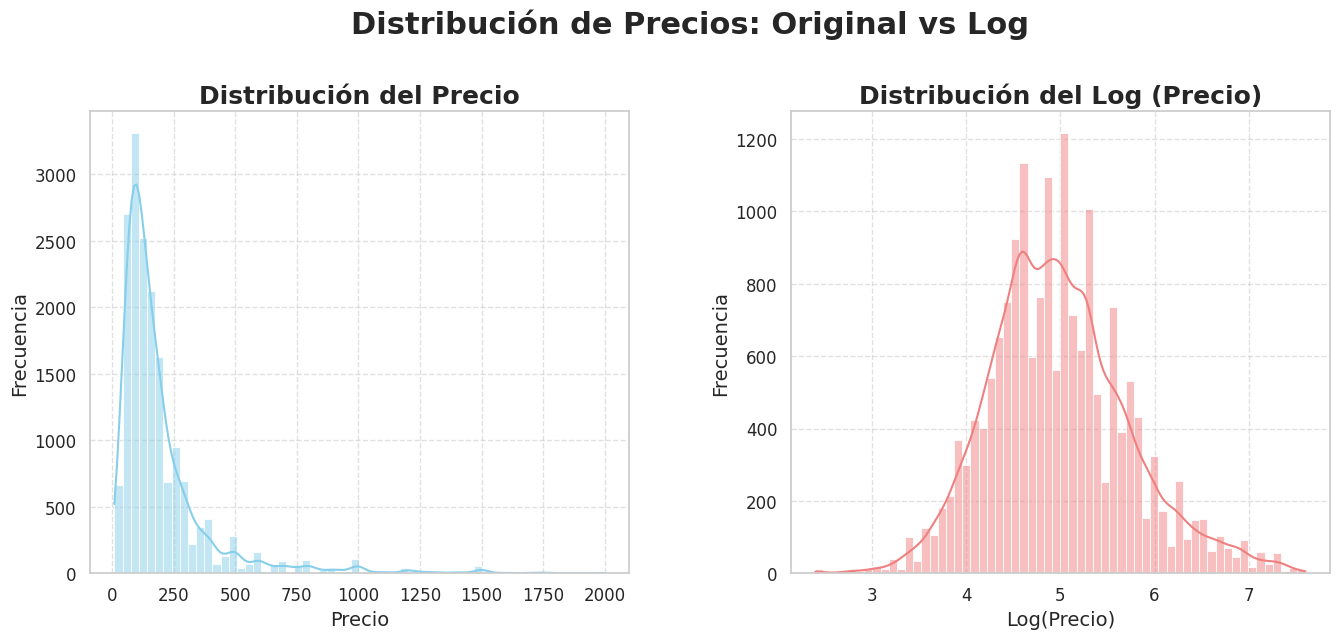

In [ ]:
# Visualizamos la misma variable precio peor en un frafico de histograma analizandolo junto a su distribucion logaritmica



# Configuración de estilo estético
sns.set(style="whitegrid", palette="muted")


# Creamos la figura y los subgráficos (2 columnas, 1 fila)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.3})



# Gráfico 1: Distribución de precios originales
sns.histplot(
    airbnb_us_cleaning['price'],
    bins=60,
    color='skyblue',
    kde=True,
    stat='count',
    ax=axes[0]
)
axes[0].set_title("Distribución del Precio", fontsize=18, weight='bold')
axes[0].set_xlabel("Precio", fontsize=14)
axes[0].set_ylabel("Frecuencia", fontsize=14)




# Gráfico 2: Distribución de precios en escala logarítmica
sns.histplot(
    airbnb_us_cleaning['log_price'],
    bins=60,
    color='lightcoral',
    kde=True,
    stat='count',
    ax=axes[1]
)
axes[1].set_title("Distribución del Log (Precio)", fontsize=18, weight='bold')
axes[1].set_xlabel("Log(Precio)", fontsize=14)
axes[1].set_ylabel("Frecuencia", fontsize=14)



# Ajustes finales para estética
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

# Título general de la figura
fig.suptitle("Distribución de Precios: Original vs Log", fontsize=22, weight='bold', y=1.05)


# Mostramos los gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Analizmaos los rangos de precios en la segemntacion por ciduad y tipo de propeidad de manera de observar estadisticas generales



# Agrupamos por 'city' y 'property_type' y calculamos métricas generales
city_property_metrics = airbnb_us_cleaning.groupby(['city', 'property_type']).agg(
    count=('price', 'size'),
    min_price=('price', 'min'),
    q1_price=('price', lambda x: x.quantile(0.25)),
    median_price=('price', 'median'),
    avg_price=('price', 'mean'),
    q3_price=('price', lambda x: x.quantile(0.75)),
    max_price=('price', 'max')
).reset_index()


# Calculamos el total general de propiedades en el dataset
total_combinations = city_property_metrics['count'].sum()


# Calculamos el porcentaje del total del dataset por cada combinación de ciudad y propiedad
city_property_metrics['percentage_total'] = (city_property_metrics['count'] / total_combinations) * 100



# Limitamos los decimales a 2 para las métricas y porcentaje
city_property_metrics['min_price'] = city_property_metrics['min_price'].round(2)
city_property_metrics['q1_price'] = city_property_metrics['q1_price'].round(2)
city_property_metrics['median_price'] = city_property_metrics['median_price'].round(2)
city_property_metrics['avg_price'] = city_property_metrics['avg_price'].round(2)
city_property_metrics['q3_price'] = city_property_metrics['q3_price'].round(2)
city_property_metrics['max_price'] = city_property_metrics['max_price'].round(2)
city_property_metrics['percentage_total'] = city_property_metrics['percentage_total'].round(2).apply(lambda x: f"{x}%")



# Seleccionamos las columnas relevantes y ordenarlas según lo solicitado
city_property_metrics = city_property_metrics[
    ['city', 'property_type', 'count', 'percentage_total', 'min_price',
     'q1_price', 'median_price', 'avg_price', 'q3_price', 'max_price']
]



# Ordenamos de mayor a menor en la columna 'count'
city_property_metrics = city_property_metrics.sort_values(by='count', ascending=False).reset_index(drop=True)

# Mostramois el resultado final
city_property_metrics.head(10)




city property_type  count percentage_total  min_price  q1_price  \
0       SF     Apartment   3475           19.62%       10.0    110.00   
1       DC     Apartment   2634           14.87%       10.0     95.00   
2   Boston     Apartment   2363           13.34%       17.0     90.00   
3  Chicago     Apartment   2028           11.45%       10.0     65.00   
4       SF         House   1884           10.64%       10.0     95.75   
5       DC         House   1504            8.49%       15.0     73.00   
6   Boston         House    562            3.17%       24.0     60.00   
7       SF   Condominium    496             2.8%       10.0    150.00   
8  Chicago         House    476            2.69%       10.0     50.00   
9  Chicago   Condominium    343            1.94%       14.0     70.00   

   median_price  avg_price  q3_price  max_price  
0         165.0     215.63     250.0     1850.0  
1         129.0     200.58     200.0     1950.0  
2         145.0     167.89     200.0     1275.0  
3         100.0     123.22     150.0     1000.0  
4         150.0     240.74     300.0     1995.0  
5         120.0     242.70     276.0     1999.0  
6          85.0     139.79     150.0     1400.0  
7         225.0     276.41     350.0     1500.0  
8          75.0     141.25     150.0     1500.0  
9         100.0     150.33     175.0     1125.0

In [ ]:
# Analizmaos los rangos de precios en la segemntacion por ciduad , tipo de propeidad y barrio  de manera de observar estadisticas generales




# Agrupamos por 'city', 'property_type', y 'neighbourhood' y calculamos métricas generales
city_property_neighbourhood = airbnb_us_cleaning.groupby(['city', 'property_type', 'neighbourhood']).agg(
    count=('price', 'size'),
    min_price=('price', 'min'),
    q1_price=('price', lambda x: x.quantile(0.25)),
    median_price=('price', 'median'),
    avg_price=('price', 'mean'),
    q3_price=('price', lambda x: x.quantile(0.75)),
    max_price=('price', 'max')
).reset_index()



# Calculamos el total de propiedades en todo el dataset
total_properties = city_property_neighbourhood['count'].sum()


# Calculamos el porcentaje basado en el total del dataset
city_property_neighbourhood['percentage'] = (city_property_neighbourhood['count'] / total_properties) * 100



# Formateamos los precios y el porcentaje a dos decimales
city_property_neighbourhood['percentage'] = city_property_neighbourhood['percentage'].apply(lambda x: f"{x:.1f}%")
for col in ['min_price', 'q1_price', 'median_price', 'avg_price', 'q3_price', 'max_price']:
    city_property_neighbourhood[col] = city_property_neighbourhood[col].round(2)



# Reordenamos las columnas
city_property_neighbourhood = city_property_neighbourhood[
    ['city', 'property_type', 'neighbourhood', 'count', 'percentage', 'min_price', 'q1_price', 'median_price', 'avg_price', 'q3_price', 'max_price']
]

# Ordenamos por 'count' de mayor a menor
city_property_neighbourhood = city_property_neighbourhood.sort_values(by='count', ascending=False).reset_index(drop=True)


# Mostramos las primeras filas del resultado
city_property_neighbourhood.head(10)




city property_type          neighbourhood  count percentage  min_price  \
0      SF     Apartment       Mission District    502       2.8%       33.0   
1      SF     Apartment                   SoMa    274       1.5%       10.0   
2  Boston     Apartment       Allston-Brighton    256       1.4%       22.0   
3      SF     Apartment  Western Addition/NOPA    255       1.4%       46.0   
4  Boston     Apartment               Back Bay    248       1.4%       40.0   
5      DC     Apartment           Capitol Hill    248       1.4%       35.0   
6  Boston     Apartment         Fenway/Kenmore    228       1.3%       17.0   
7      SF     Apartment      Richmond District    215       1.2%       30.0   
8      SF     Apartment               Nob Hill    195       1.1%       65.0   
9      DC         House           Capitol Hill    191       1.1%       49.0   

   q1_price  median_price  avg_price  q3_price  max_price  
0    100.00         155.0     202.99    240.00     1750.0  
1    113.50         172.5     220.46    258.75     1500.0  
2     55.00          82.5     104.76    129.00      999.0  
3    120.00         175.0     222.72    250.00     1200.0  
4    150.00         190.5     228.95    269.00     1250.0  
5    117.75         149.0     221.54    186.00     1700.0  
6     99.00         140.0     170.95    190.25     1275.0  
7     99.00         150.0     179.99    200.00     1850.0  
8    120.00         175.0     209.29    250.00     1100.0  
9    120.00         225.0     366.56    350.00     1900.0

In [ ]:
# Analizmaos los rangos de precios en la segemntacion por ciduad  y barrio  de manera de observar estadisticas generales



# Agrupamos por 'city' y 'neighbourhood' y calculamos las métricas  generales

city_neighbourhood = airbnb_us_cleaning.groupby(['city', 'neighbourhood']).agg(
    count=('price', 'size'),               # Contar ocurrencias
    min_price=('price', 'min'),            # Precio mínimo
    q1_price=('price', lambda x: x.quantile(0.25)),  # Primer cuartil
    median_price=('price', 'median'),      # Mediana
    avg_price=('price', 'mean'),           # Precio promedio
    q3_price=('price', lambda x: x.quantile(0.75)),  # Tercer cuartil
    max_price=('price', 'max')             # Precio máximo
).reset_index()



# Calculamos  el total de propiedades en todo el dataset
total_properties = city_neighbourhood['count'].sum()


# Calculamos el porcentaje basado en el total del dataset
city_neighbourhood['percentage'] = (city_neighbourhood['count'] / total_properties) * 100


# Redondeamos y formatear los valores numéricos
city_neighbourhood['percentage'] = city_neighbourhood['percentage'].apply(lambda x: f"{x:.1f}%")
for col in ['min_price', 'q1_price', 'median_price', 'avg_price', 'q3_price', 'max_price']:
    city_neighbourhood[col] = city_neighbourhood[col].round(2)


# Reordenamos las columnas
city_neighbourhood = city_neighbourhood[
    ['city', 'neighbourhood', 'count', 'percentage', 'min_price', 'q1_price', 'median_price', 'avg_price', 'q3_price', 'max_price']
]



# Ordenamos  por 'count' en orden descendente
city_neighbourhood = city_neighbourhood.sort_values(by='count', ascending=False).reset_index(drop=True)


# Mostramos  la tabla procesada
city_neighbourhood.head(10)


city          neighbourhood  count percentage  min_price  q1_price  \
0      SF       Mission District    782       4.4%       33.0    100.00   
1      DC           Capitol Hill    525       3.0%       35.0    120.00   
2  Boston       Allston-Brighton    412       2.3%       22.0     50.75   
3      SF      Richmond District    394       2.2%       30.0    100.25   
4      SF  Western Addition/NOPA    387       2.2%       46.0    116.50   
5      SF                   SoMa    386       2.2%       10.0    115.00   
6      SF         Bernal Heights    338       1.9%       39.0    105.00   
7      SF             Noe Valley    309       1.7%       25.0    129.00   
8  Boston          Jamaica Plain    306       1.7%       25.0     75.00   
9      DC       Columbia Heights    298       1.7%       15.0     80.00   

   median_price  avg_price  q3_price  max_price  
0         160.0     209.47    250.00     1750.0  
1         175.0     310.28    300.00     1900.0  
2          79.0     102.44    121.25      999.0  
3         150.0     231.21    280.00     1850.0  
4         169.0     229.77    250.00     1500.0  
5         176.5     225.82    275.00     1500.0  
6         150.0     204.38    250.00     1200.0  
7         190.0     246.17    275.00     1500.0  
8         110.0     142.70    173.75      725.0  
9         113.0     195.63    194.50     1749.0

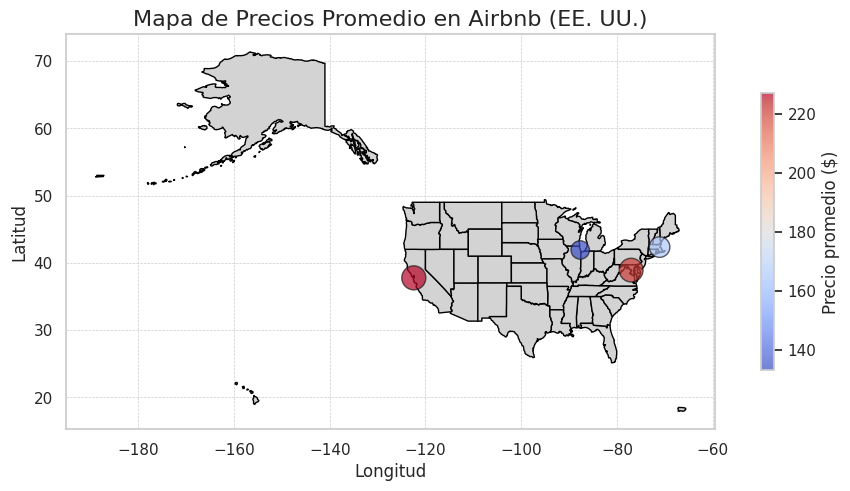

In [ ]:
#Grafico de Mapa para visualizar donde estan los precios ams altos en las diferentes regiones analizadas del dataset




# Calculamos el precio promedio por ciudad
city_avg_price = airbnb_us_cleaning.groupby('city').agg(
    avg_price=('price', 'mean'),
    latitude=('latitude', 'mean'),
    longitude=('longitude', 'mean')
).reset_index()



# Creamos una geometría de puntos para las ciudades
geometry = [Point(lon, lat) for lon, lat in zip(city_avg_price['longitude'], city_avg_price['latitude'])]
geo_df = gpd.GeoDataFrame(city_avg_price, geometry=geometry, crs="EPSG:4326")



# Cargamos un mapa base de Estados Unidos
us_map_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_map = gpd.read_file(us_map_url)




# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 5))


# Dibujamos el mapa base de EE. UU.
us_map.plot(ax=ax, color='lightgrey', edgecolor='black')



# Agregamos las ciudades con colores según el precio promedio
scatter = ax.scatter(
    geo_df.geometry.x,  # Longitudes
    geo_df.geometry.y,  # Latitudes
    c=geo_df['avg_price'],  # Colores basados en el precio promedio
    cmap='coolwarm',  # Colores de la paleta "coolwarm" para un rango amplio
    s=(geo_df['avg_price'] / geo_df['avg_price'].max()) * 300,  # Tamaños normalizados
    alpha=0.7,  # Transparencia
    edgecolor='k'  # Borde negro para los puntos
)



# Agregamos una barra de color para interpretar los valores
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", shrink=0.7, label="Precio promedio ($)")



# Títulos y etiquetas
ax.set_title('Mapa de Precios Promedio en Airbnb (EE. UU.)', fontsize=16)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

# Mejoramos la visualización
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Mostramos el gráfico
plt.show()



Estadísticas descriptivas por ciudad:
          min     Q1  Mediana     Q3     max       Media
city                                                    
Boston   17.0   80.0    136.0  200.0  1400.0  165.779360
Chicago  10.0   65.0     99.0  155.0  1500.0  133.201571
DC       10.0   85.0    125.0  230.0  1999.0  221.183309
SF       10.0  107.0    165.0  260.0  1995.0  226.997476


<ipython-input-47-7b8bf4ec3331>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='price', data=airbnb_us_cleaning_subset, palette='pastel', ax=ax1, width=0.6)
<ipython-input-47-7b8bf4ec3331>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y=np.log1p(airbnb_us_cleaning_subset['price']), data=airbnb_us_cleaning_subset, palette='Set3', ax=ax2, width=0.6)


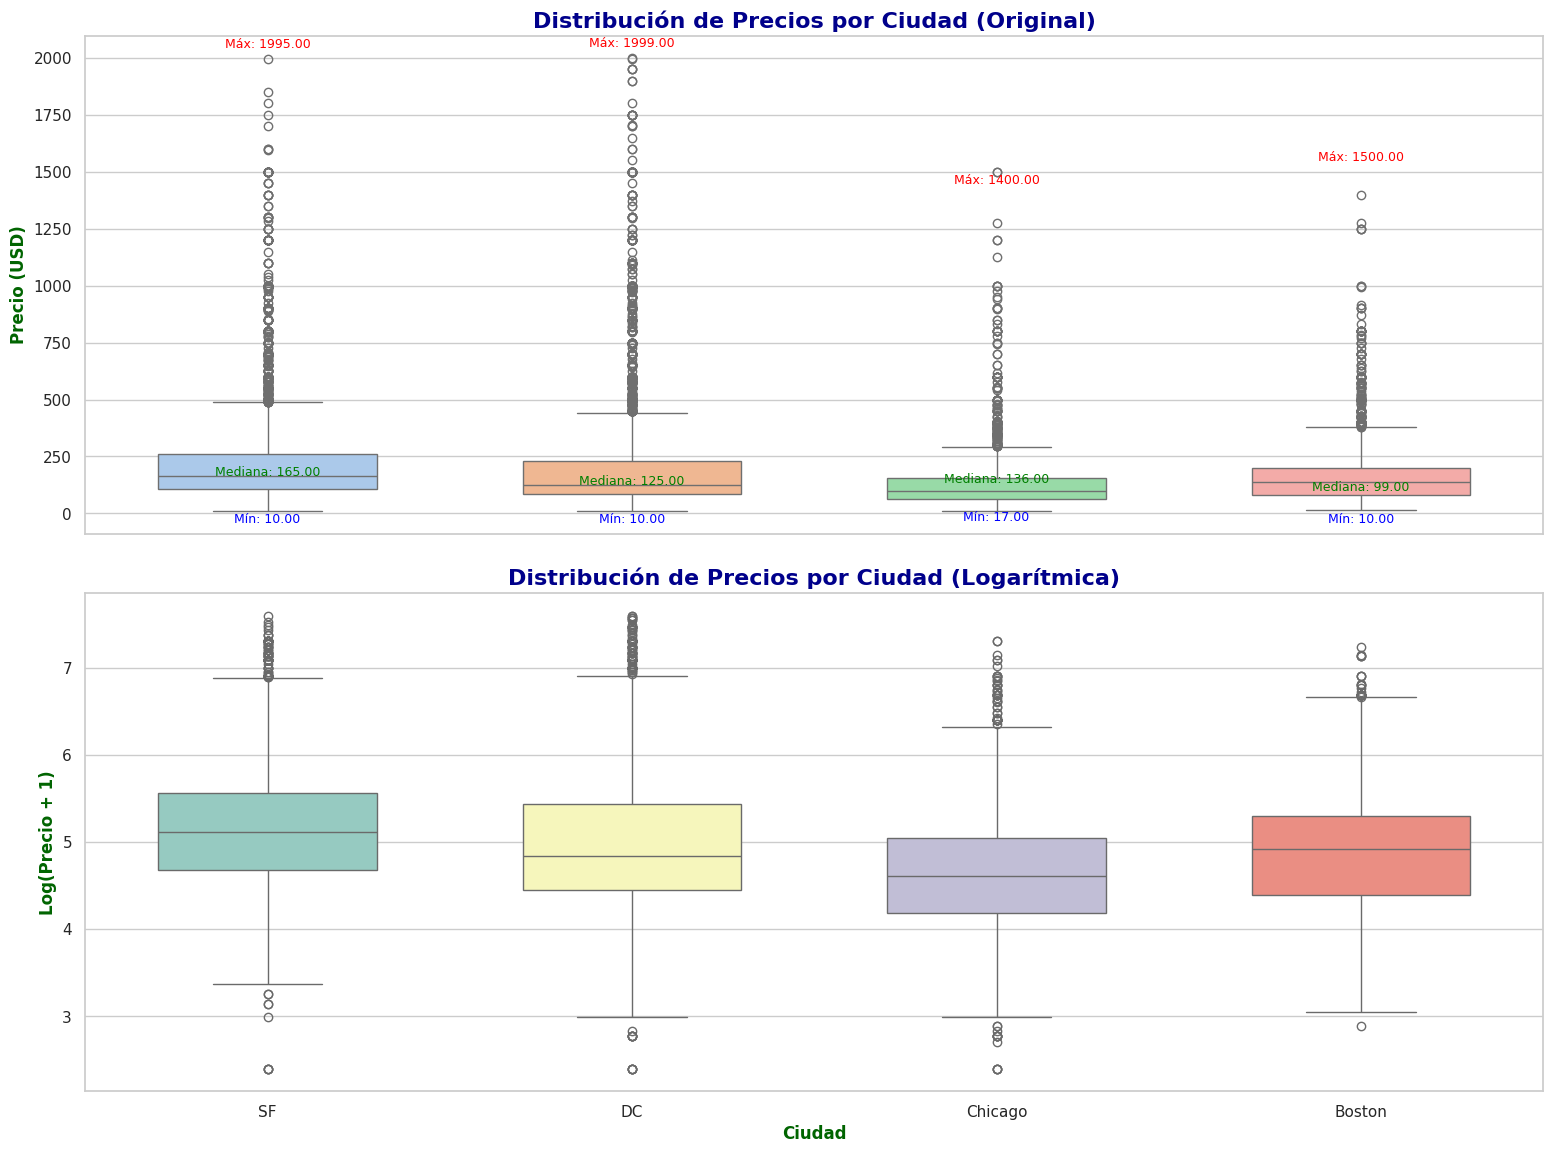

In [ ]:
# Analizamos en un grafico de BoxPlot como se distribuye el precio en las diferentes ciduades


# Filtramos Ciudades(Podemos ajustar la cantidad de ciduades que queremos visualizar)
top_cities = airbnb_us_cleaning['city'].value_counts().head(4).index
airbnb_us_cleaning_subset = airbnb_us_cleaning[airbnb_us_cleaning['city'].isin(top_cities)]


# Calculamos estadísticas descriptivas por ciudad
city_price_stats = airbnb_us_cleaning_subset.groupby('city')['price'].describe(percentiles=[0.25, 0.5, 0.75])
city_price_stats = city_price_stats[['min', '25%', '50%', '75%', 'max', 'mean']].rename(
    columns={'25%': 'Q1', '50%': 'Mediana', '75%': 'Q3', 'mean': 'Media'})


# Mostramos la tabla de estadísticas en la consola
print("Estadísticas descriptivas por ciudad:")
print(city_price_stats)



# Configuración de estilo
sns.set(style="whitegrid")


# Creamos una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)



# Gráfico 1: Boxplot para precios originales
sns.boxplot(x='city', y='price', data=airbnb_us_cleaning_subset, palette='pastel', ax=ax1, width=0.6)
ax1.set_title('Distribución de Precios por Ciudad (Original)', fontsize=16, weight='bold', color='darkblue')
ax1.set_ylabel('Precio (USD)', fontsize=12, weight='bold', color='darkgreen')
ax1.set_xlabel('', fontsize=12)  # Sin etiqueta en el eje X



# Anotamos estadísticas en el boxplot original
for i, city in enumerate(top_cities):
    stats = airbnb_us_cleaning_subset[airbnb_us_cleaning_subset['city'] == city]['price']
    ax1.text(i, stats.min() - 50, f'Mín: {stats.min():.2f}', ha='center', fontsize=9, color='blue')
    ax1.text(i, stats.median(), f'Mediana: {stats.median():.2f}', ha='center', fontsize=9, color='green')
    ax1.text(i, stats.max() + 50, f'Máx: {stats.max():.2f}', ha='center', fontsize=9, color='red')



# Gráfico 2: Boxplot para precios logarítmicos
sns.boxplot(x='city', y=np.log1p(airbnb_us_cleaning_subset['price']), data=airbnb_us_cleaning_subset, palette='Set3', ax=ax2, width=0.6)
ax2.set_title('Distribución de Precios por Ciudad (Logarítmica)', fontsize=16, weight='bold', color='darkblue')
ax2.set_ylabel('Log(Precio + 1)', fontsize=12, weight='bold', color='darkgreen')
ax2.set_xlabel('Ciudad', fontsize=12, weight='bold', color='darkgreen')

# Ajustamos márgenes
plt.tight_layout(pad=2.0)


# Mostramos los gráficos
plt.show()


<ipython-input-48-49a302f840a8>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_neighbourhoods = top_neighbourhoods.groupby('city').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)


Estadísticas descriptivas para los barrios más relevantes:
                           min      Q1  Mediana      Q3     max       Media
city    neighbourhood                                                      
Boston  Allston-Brighton  22.0   50.75     79.0  121.25   999.0  102.441748
Chicago Lakeview          35.0   84.25    122.5  225.00  1200.0  188.852713
DC      Capitol Hill      35.0  120.00    175.0  300.00  1900.0  310.283810
SF      Mission District  33.0  100.00    160.0  250.00  1750.0  209.466752


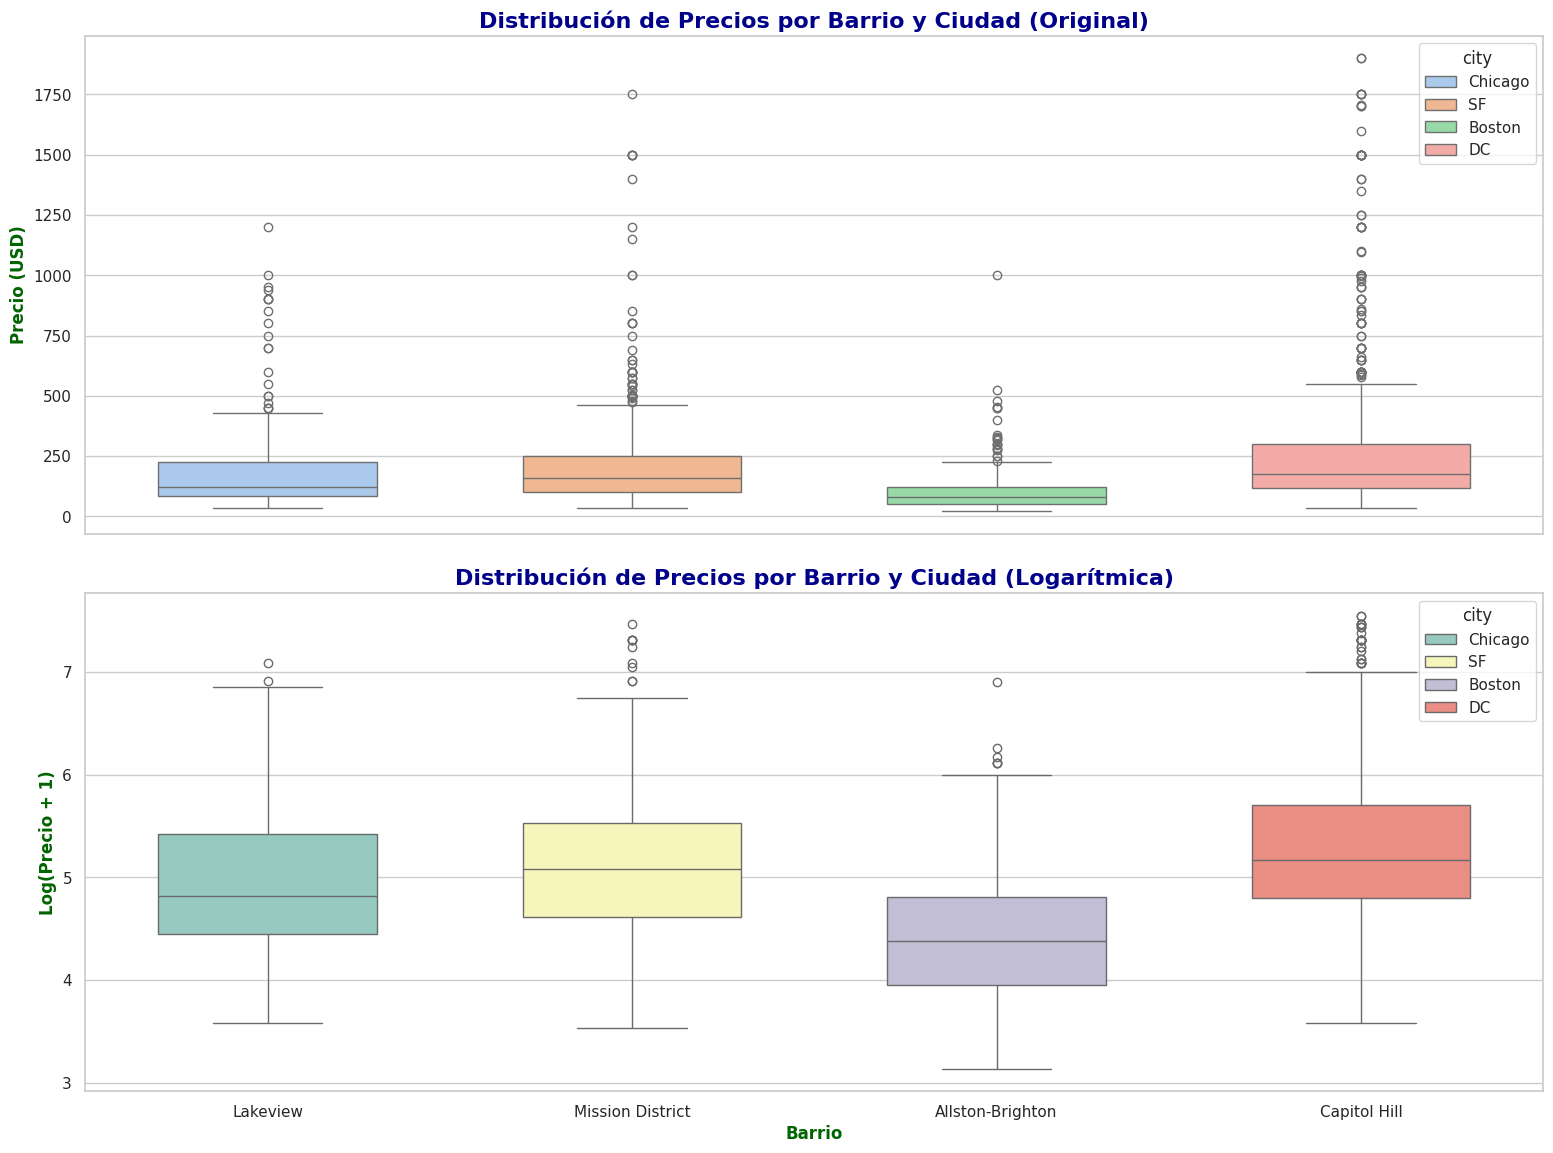

In [ ]:
# Analizamos en un grafico de BoxPlot como se distribuye el precio en los barrios  con mayor cantidad de reservas por cada ciudad



# Filtrar las ciudades más populares(podemos cambiar esto para visualizar diferentes ciudades)
top_cities = airbnb_us_cleaning['city'].value_counts().head(4).index


# Filtramos el dataset para las 4 ciudades más populares
airbnb_us_cleaning_subset = airbnb_us_cleaning[airbnb_us_cleaning['city'].isin(top_cities)]



# Filtramos  el barrio más relevante (el más frecuente) por cada ciudad
top_neighbourhoods = airbnb_us_cleaning_subset.groupby(['city', 'neighbourhood']).size().reset_index(name='count')
top_neighbourhoods = top_neighbourhoods.groupby('city').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)



# Obtenemos  los barrios más relevantes
top_neighbourhoods_list = top_neighbourhoods['neighbourhood'].tolist()


# Filtramos el dataset para solo esos barrios más relevantes
airbnb_us_cleaning_subset_relevant = airbnb_us_cleaning_subset[airbnb_us_cleaning_subset['neighbourhood'].isin(top_neighbourhoods_list)]



# Calculamos estadísticas descriptivas para los barrios más relevantes
neighbourhood_price_stats = airbnb_us_cleaning_subset_relevant.groupby(['city', 'neighbourhood'])['price'].describe(percentiles=[0.25, 0.5, 0.75])
neighbourhood_price_stats = neighbourhood_price_stats[['min', '25%', '50%', '75%', 'max', 'mean']].rename(
    columns={'25%': 'Q1', '50%': 'Mediana', '75%': 'Q3', 'mean': 'Media'})



# Mostramos estadísticas en consola
print("Estadísticas descriptivas para los barrios más relevantes:")
print(neighbourhood_price_stats)



# Configuración de estilo
sns.set(style="whitegrid")


# Creamos una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)


# Gráfico 1: Boxplot para precios originales por barrio y ciudad
sns.boxplot(x='neighbourhood', y='price', data=airbnb_us_cleaning_subset_relevant,
            palette='pastel', ax=ax1, width=0.6, hue='city')
ax1.set_title('Distribución de Precios por Barrio y Ciudad (Original)', fontsize=16, weight='bold', color='darkblue')
ax1.set_ylabel('Precio (USD)', fontsize=12, weight='bold', color='darkgreen')
ax1.set_xlabel('Barrio', fontsize=12, weight='bold', color='darkgreen')


# Gráfico 2: Boxplot para precios logarítmicos por barrio y ciudad
sns.boxplot(x='neighbourhood', y=np.log1p(airbnb_us_cleaning_subset_relevant['price']),
            data=airbnb_us_cleaning_subset_relevant,
            palette='Set3', ax=ax2, width=0.6, hue='city')
ax2.set_title('Distribución de Precios por Barrio y Ciudad (Logarítmica)', fontsize=16, weight='bold', color='darkblue')
ax2.set_ylabel('Log(Precio + 1)', fontsize=12, weight='bold', color='darkgreen')
ax2.set_xlabel('Barrio', fontsize=12, weight='bold', color='darkgreen')


# Ajustamos márgenes
plt.tight_layout(pad=2.0)

# Mostramos los gráficos
plt.show()


Estadísticas clave de precios por tipo de propiedad:
                          mean     25%    50%     75%    min     max
property_type                                                       
Apartment           183.264857   92.00  139.0  200.00   10.0  1950.0
Bed & Breakfast     139.866142   81.00  125.0  175.00   39.0   495.0
Boat                323.000000  192.25  239.5  307.00   69.0  1250.0
Boutique hotel      204.205128  109.00  150.0  199.00   59.0  1500.0
Bungalow            189.153846  117.00  149.0  200.00   39.0   599.0
Cabin               149.125000  116.75  149.5  169.25   95.0   211.0
Camper/RV           209.750000   97.25  200.0  312.50   89.0   350.0
Castle              221.000000  143.75  172.0  249.25  140.0   400.0
Cave                147.000000  147.00  147.0  147.00  147.0   147.0
Condominium         229.458276  100.00  169.0  275.00   10.0  1749.0
Dorm                 59.872340   32.50   54.0   64.00   15.0   199.0
Guest suite         131.857143   86.50  120.0  160

<ipython-input-49-da7b8144bf61>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
<ipython-input-49-da7b8144bf61>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
<ipython-input-49-da7b8144bf61>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)


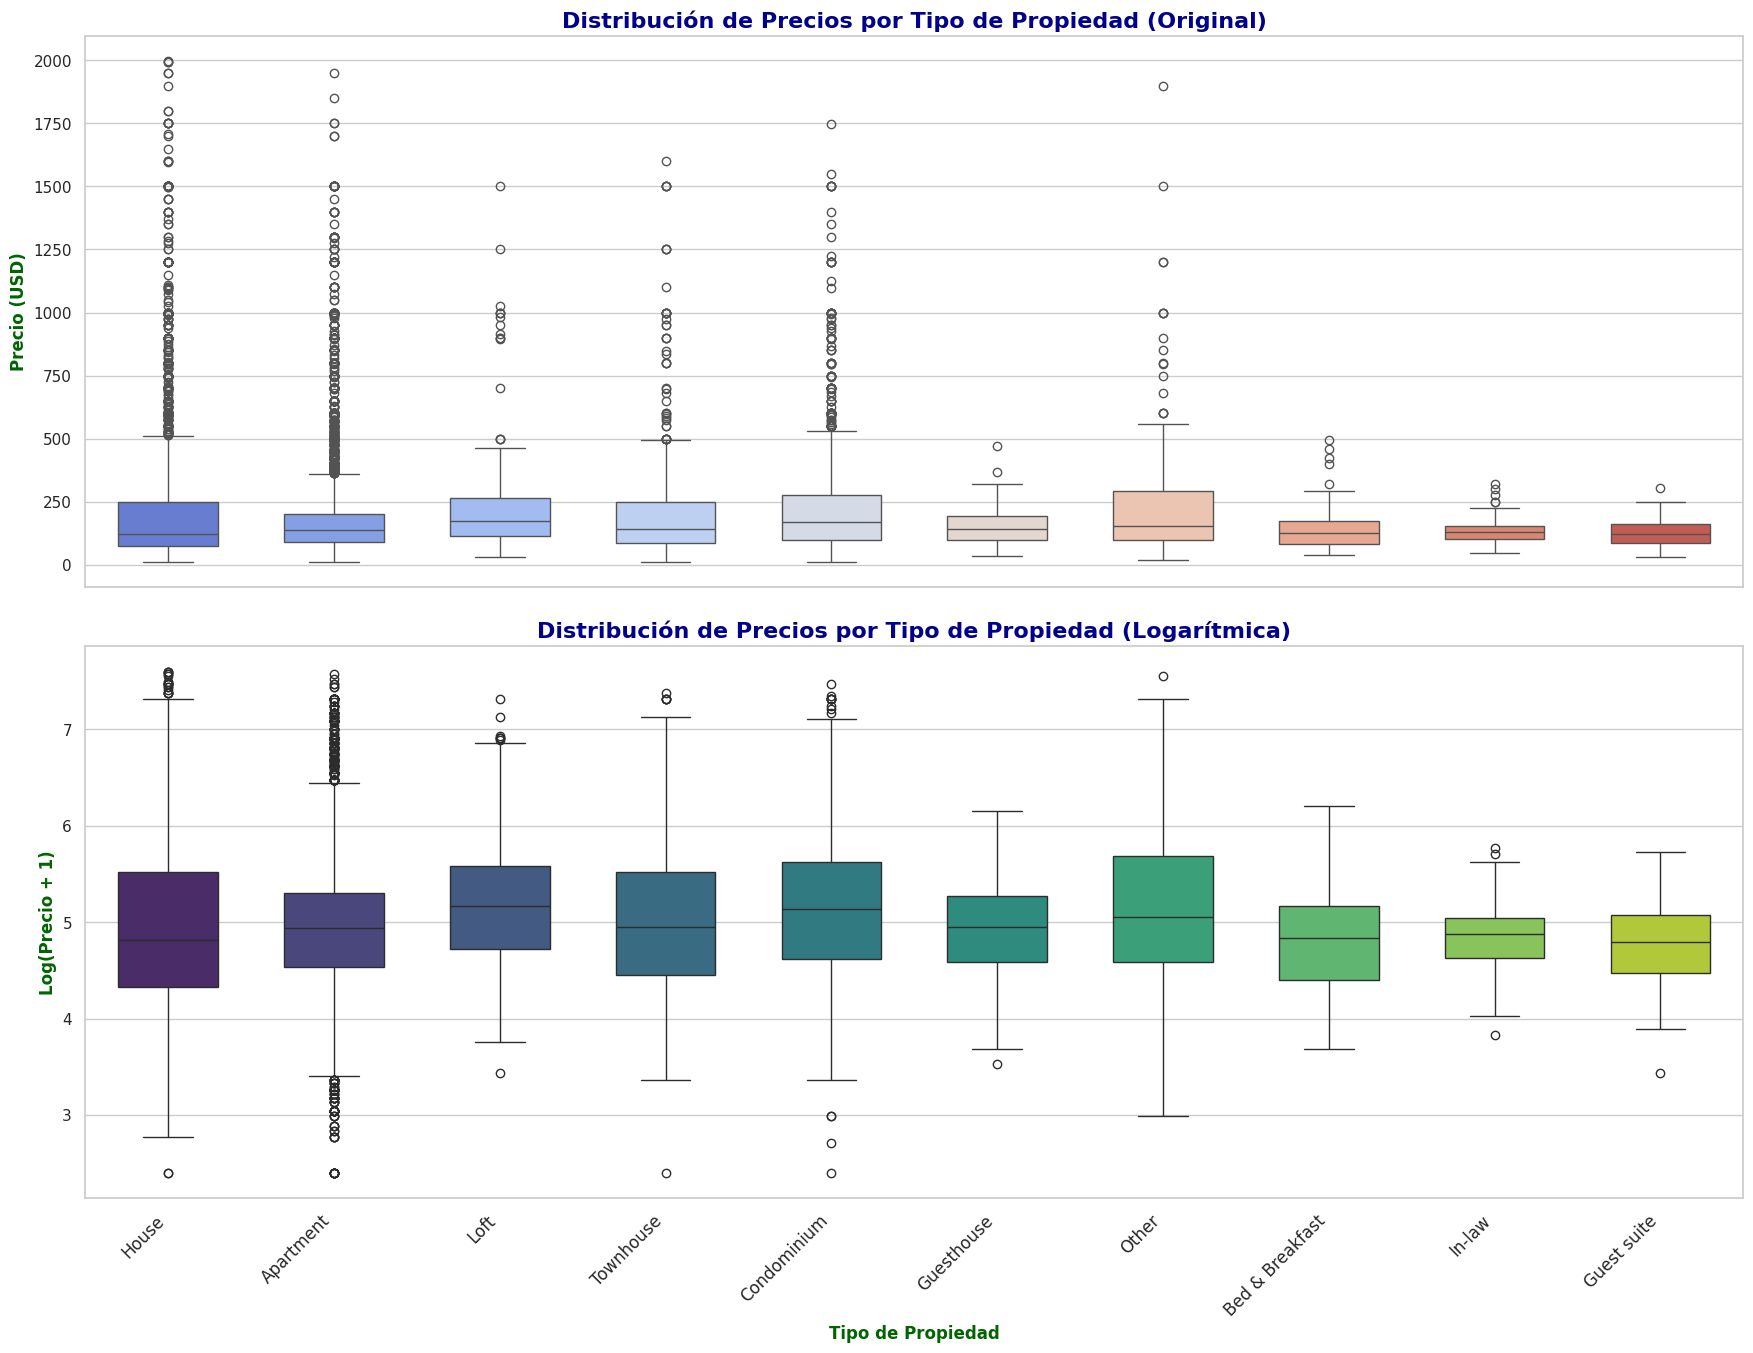

In [ ]:
# Analizamos en un grafico de BoxPlot como se distribuye el precio en los diferentes tipos de propeidades (filtraremos los tipos d epropeidas mas relevantes del dataset)



# Calculamos estadísticas clave para el tipo de propiedad y los precios
property_price_stats = airbnb_us_cleaning.groupby('property_type')['price'].describe()


# Mostramos las estadísticas clave
print("Estadísticas clave de precios por tipo de propiedad:")
print(property_price_stats[['mean', '25%', '50%', '75%', 'min', 'max']])



# Calculamos el rango intercuartílico (IQR) y los valores atípicos
property_price_stats['IQR'] = property_price_stats['75%'] - property_price_stats['25%']
property_price_stats['lower_bound'] = property_price_stats['25%'] - 1.5 * property_price_stats['IQR']
property_price_stats['upper_bound'] = property_price_stats['75%'] + 1.5 * property_price_stats['IQR']


print("\nValores atípicos (outliers) por tipo de propiedad:")
print(property_price_stats[['lower_bound', 'upper_bound']])


# Filtramos los 10 tipos de propiedad más frecuentes
top_10_property_types = airbnb_us_cleaning['property_type'].value_counts().nlargest(10).index
subset_data = airbnb_us_cleaning[airbnb_us_cleaning['property_type'].isin(top_10_property_types)]

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14), sharex=True)

# Gráfico 1: Boxplot para precios originales
sns.boxplot(x='property_type', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
ax1.set_title('Distribución de Precios por Tipo de Propiedad (Original)', fontsize=16, weight='bold', color='darkblue')
ax1.set_ylabel('Precio (USD)', fontsize=12, weight='bold', color='darkgreen')
ax1.set_xlabel('')  # Sin etiqueta en el eje X

# Gráfico 2: Boxplot para precios logarítmicos
sns.boxplot(x='property_type', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
ax2.set_title('Distribución de Precios por Tipo de Propiedad (Logarítmica)', fontsize=16, weight='bold', color='darkblue')
ax2.set_ylabel('Log(Precio + 1)', fontsize=12, weight='bold', color='darkgreen')
ax2.set_xlabel('Tipo de Propiedad', fontsize=12, weight='bold', color='darkgreen')

# Rotamos etiquetas del eje X para ambos gráficos
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Ajustamos márgenes
plt.tight_layout(pad=2.0)

# Mostramos los gráficos
plt.show()



Estadísticas clave de precios por tipo de habitación (room_type):
                       mean    25%    50%    75%   min     max
room_type                                                     
Entire home/apt  253.411791  125.0  182.0  290.0  10.0  1999.0
Private room     105.696431   60.0   85.0  119.0  10.0  1995.0
Shared room       66.310241   30.0   49.0   75.0  10.0   750.0

Valores atípicos (outliers) por tipo de habitación (room_type):
                 lower_bound  upper_bound
room_type                                
Entire home/apt       -122.5        537.5
Private room           -28.5        207.5
Shared room            -37.5        142.5


<ipython-input-50-e4447c7cbade>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
<ipython-input-50-e4447c7cbade>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
<ipython-input-50-e4447c7cbade>:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)


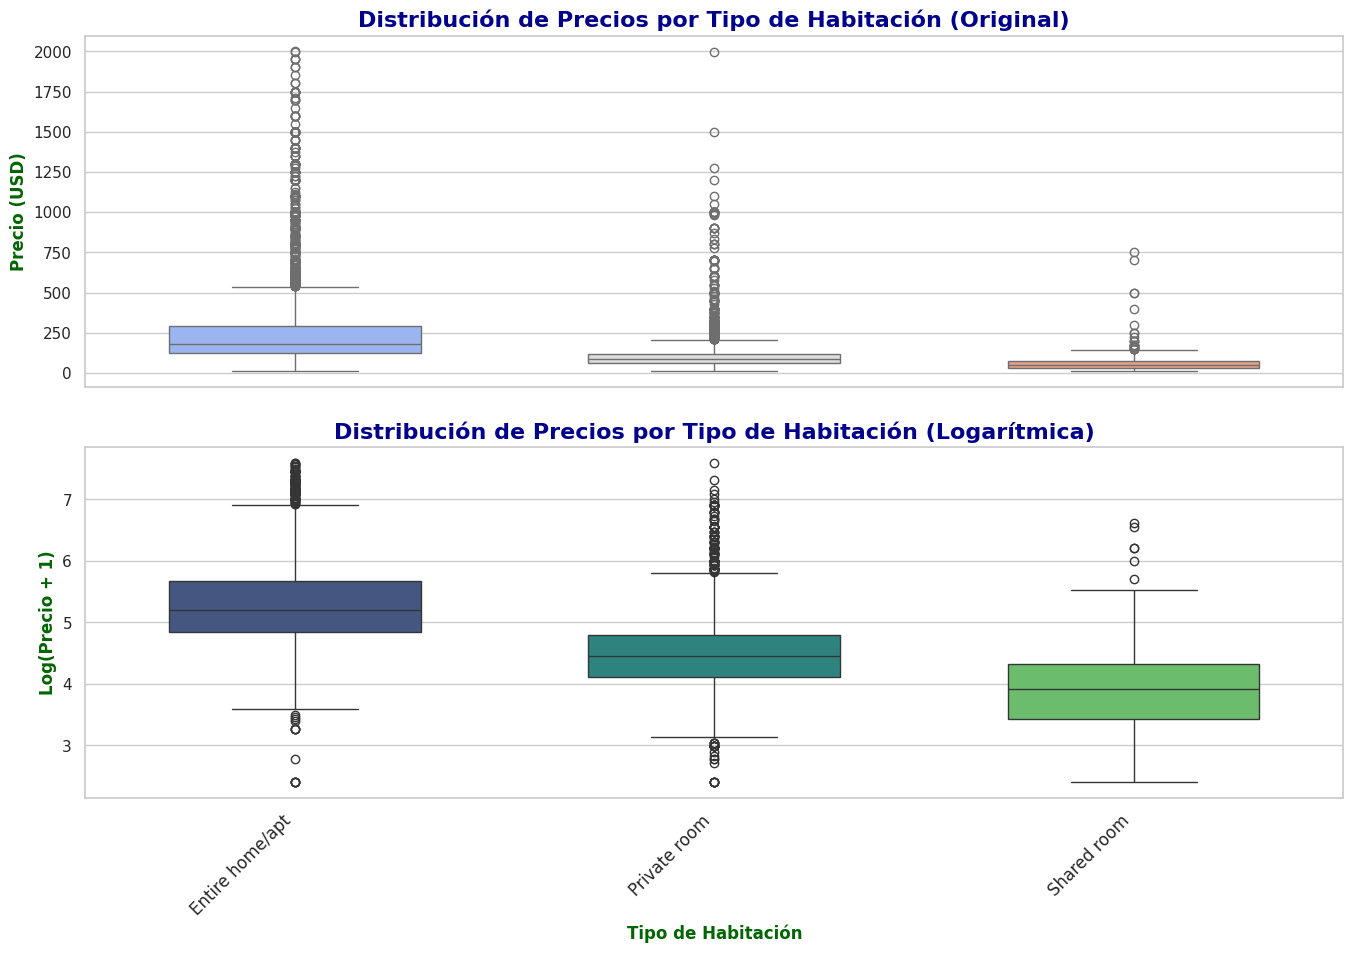

In [ ]:
# Analizamos en un grafico de BoxPlot como se distribuye el precio en los diferentes tipos de cuartos



# Calculamos estadísticas clave para room_type y precios
room_price_stats = airbnb_us_cleaning.groupby('room_type')['price'].describe()



# Mostramos  las estadísticas clave
print("Estadísticas clave de precios por tipo de habitación (room_type):")
print(room_price_stats[['mean', '25%', '50%', '75%', 'min', 'max']])


# Calculamos el rango intercuartílico (IQR) y los valores atípicos
room_price_stats['IQR'] = room_price_stats['75%'] - room_price_stats['25%']
room_price_stats['lower_bound'] = room_price_stats['25%'] - 1.5 * room_price_stats['IQR']
room_price_stats['upper_bound'] = room_price_stats['75%'] + 1.5 * room_price_stats['IQR']


print("\nValores atípicos (outliers) por tipo de habitación (room_type):")
print(room_price_stats[['lower_bound', 'upper_bound']])


# Filtramos las categorías de room_type
room_types = airbnb_us_cleaning['room_type'].unique()
subset_data = airbnb_us_cleaning[airbnb_us_cleaning['room_type'].isin(room_types)]


# Configuracion estilo de Seaborn
sns.set(style="whitegrid")


# Creamos una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)




# Gráfico 1: Boxplot para precios originales
sns.boxplot(x='room_type', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
ax1.set_title('Distribución de Precios por Tipo de Habitación (Original)', fontsize=16, weight='bold', color='darkblue')
ax1.set_ylabel('Precio (USD)', fontsize=12, weight='bold', color='darkgreen')
ax1.set_xlabel('')  # Sin etiqueta en el eje X


# Gráfico 2: Boxplot para precios logarítmicos
sns.boxplot(x='room_type', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
ax2.set_title('Distribución de Precios por Tipo de Habitación (Logarítmica)', fontsize=16, weight='bold', color='darkblue')
ax2.set_ylabel('Log(Precio + 1)', fontsize=12, weight='bold', color='darkgreen')
ax2.set_xlabel('Tipo de Habitación', fontsize=12, weight='bold', color='darkgreen')


# Rotamos etiquetas del eje X para ambos gráficos
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Ajustamos márgenes
plt.tight_layout(pad=2.0)

# Mostramos los gráficos
plt.show()


Estadísticas clave de precios por tipo de cama (bed_type):
                     mean   25%    50%    75%   min     max
bed_type                                                   
Airbed         145.482014  50.0   77.0  122.5  15.0  1850.0
Couch          141.465517  42.0   77.0  130.0  17.0   900.0
Futon           99.839744  58.0   79.5  123.5  20.0   450.0
Pull-out Sofa  121.250000  68.0   89.5  135.0  24.0   913.0
Real Bed       199.415235  90.0  140.0  225.0  10.0  1999.0

Valores atípicos (outliers) por tipo de cama (bed_type):
               lower_bound  upper_bound
bed_type                               
Airbed              -58.75       231.25
Couch               -90.00       262.00
Futon               -40.25       221.75
Pull-out Sofa       -32.50       235.50
Real Bed           -112.50       427.50


<ipython-input-51-069fbe725283>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bed_type', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
<ipython-input-51-069fbe725283>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bed_type', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
<ipython-input-51-069fbe725283>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)


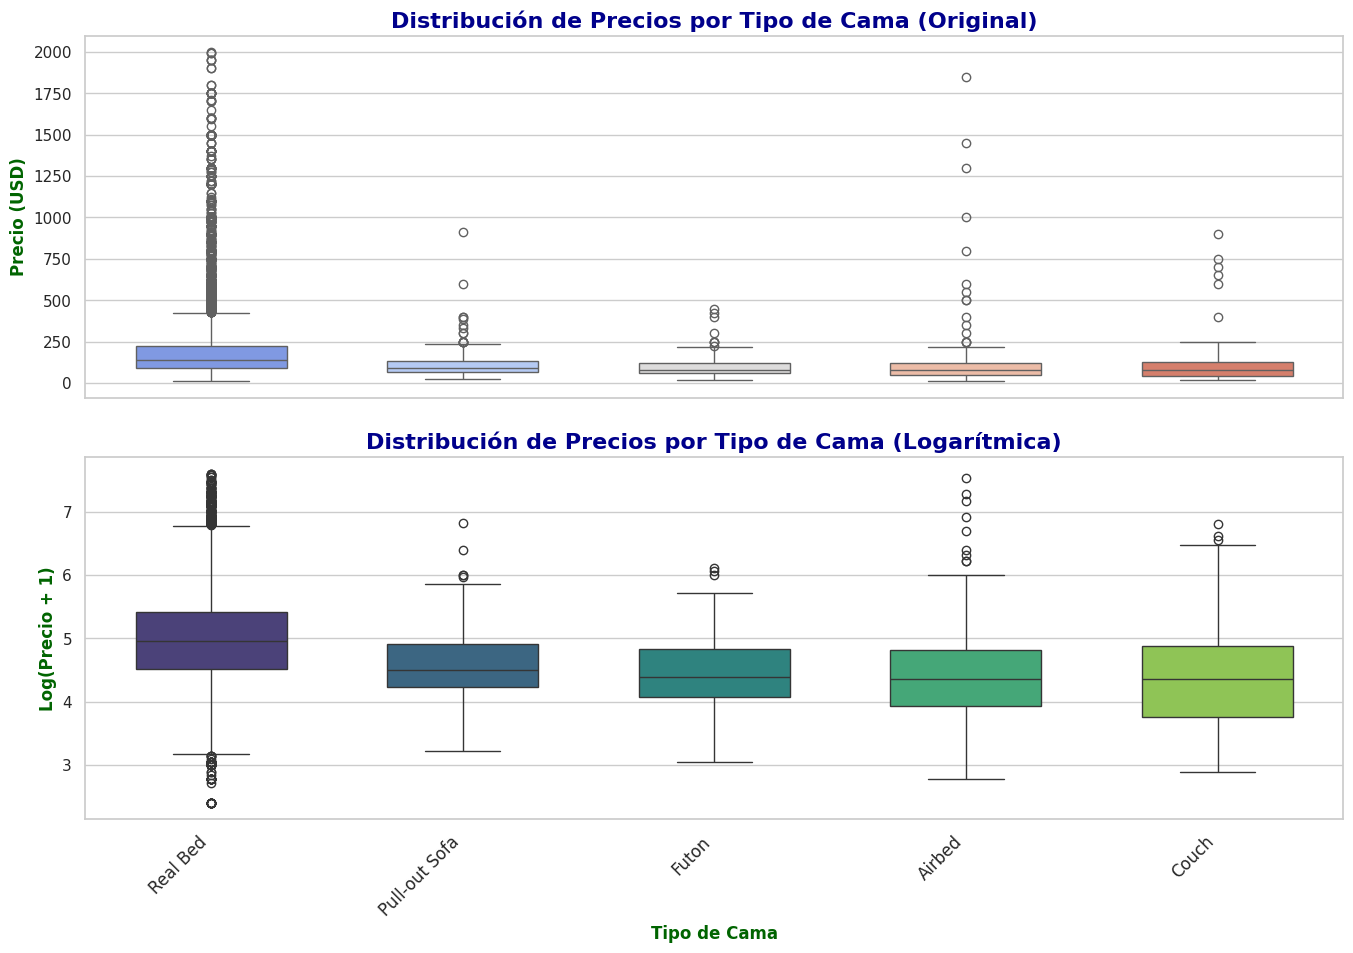

In [ ]:
# Calculamos estadísticas clave para bed_type y precios
bed_price_stats = airbnb_us_cleaning.groupby('bed_type')['price'].describe()

# Mostramos las estadísticas clave
print("Estadísticas clave de precios por tipo de cama (bed_type):")
print(bed_price_stats[['mean', '25%', '50%', '75%', 'min', 'max']])

# Calculamos el rango intercuartílico (IQR) y los valores atípicos
bed_price_stats['IQR'] = bed_price_stats['75%'] - bed_price_stats['25%']
bed_price_stats['lower_bound'] = bed_price_stats['25%'] - 1.5 * bed_price_stats['IQR']
bed_price_stats['upper_bound'] = bed_price_stats['75%'] + 1.5 * bed_price_stats['IQR']

print("\nValores atípicos (outliers) por tipo de cama (bed_type):")
print(bed_price_stats[['lower_bound', 'upper_bound']])

# Filtramos las categorías de bed_type
bed_types = airbnb_us_cleaning['bed_type'].unique()
subset_data = airbnb_us_cleaning[airbnb_us_cleaning['bed_type'].isin(bed_types)]

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Creamos una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Gráfico 1: Boxplot para precios originales
sns.boxplot(x='bed_type', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
ax1.set_title('Distribución de Precios por Tipo de Cama (Original)', fontsize=16, weight='bold', color='darkblue')
ax1.set_ylabel('Precio (USD)', fontsize=12, weight='bold', color='darkgreen')
ax1.set_xlabel('')  # Sin etiqueta en el eje X

# Gráfico 2: Boxplot para precios logarítmicos
sns.boxplot(x='bed_type', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
ax2.set_title('Distribución de Precios por Tipo de Cama (Logarítmica)', fontsize=16, weight='bold', color='darkblue')
ax2.set_ylabel('Log(Precio + 1)', fontsize=12, weight='bold', color='darkgreen')
ax2.set_xlabel('Tipo de Cama', fontsize=12, weight='bold', color='darkgreen')

# Rotamos etiquetas del eje X para ambos gráficos
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Ajustamos márgenes
plt.tight_layout(pad=2.0)

# Mostramos los gráficos
plt.show()


Estadísticas clave de precios por política de cancelación (cancellation_policy):
                           mean    25%    50%    75%    min     max
cancellation_policy                                                
flexible             206.912315   79.0  120.0  220.0   10.0  1999.0
moderate             169.527506   85.0  125.0  200.0   10.0  1995.0
strict               208.480813   99.0  150.0  249.0   10.0  1995.0
super_strict_30      258.709677  195.0  249.0  309.0   85.0   603.0
super_strict_60      327.400000  170.0  258.0  350.0  159.0   700.0

Valores atípicos (outliers) por política de cancelación (cancellation_policy):
                     lower_bound  upper_bound
cancellation_policy                          
flexible                  -132.5        431.5
moderate                   -87.5        372.5
strict                    -126.0        474.0
super_strict_30             24.0        480.0
super_strict_60           -100.0        620.0


<ipython-input-52-5e5924a21555>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancellation_policy', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
<ipython-input-52-5e5924a21555>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancellation_policy', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
<ipython-input-52-5e5924a21555>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)


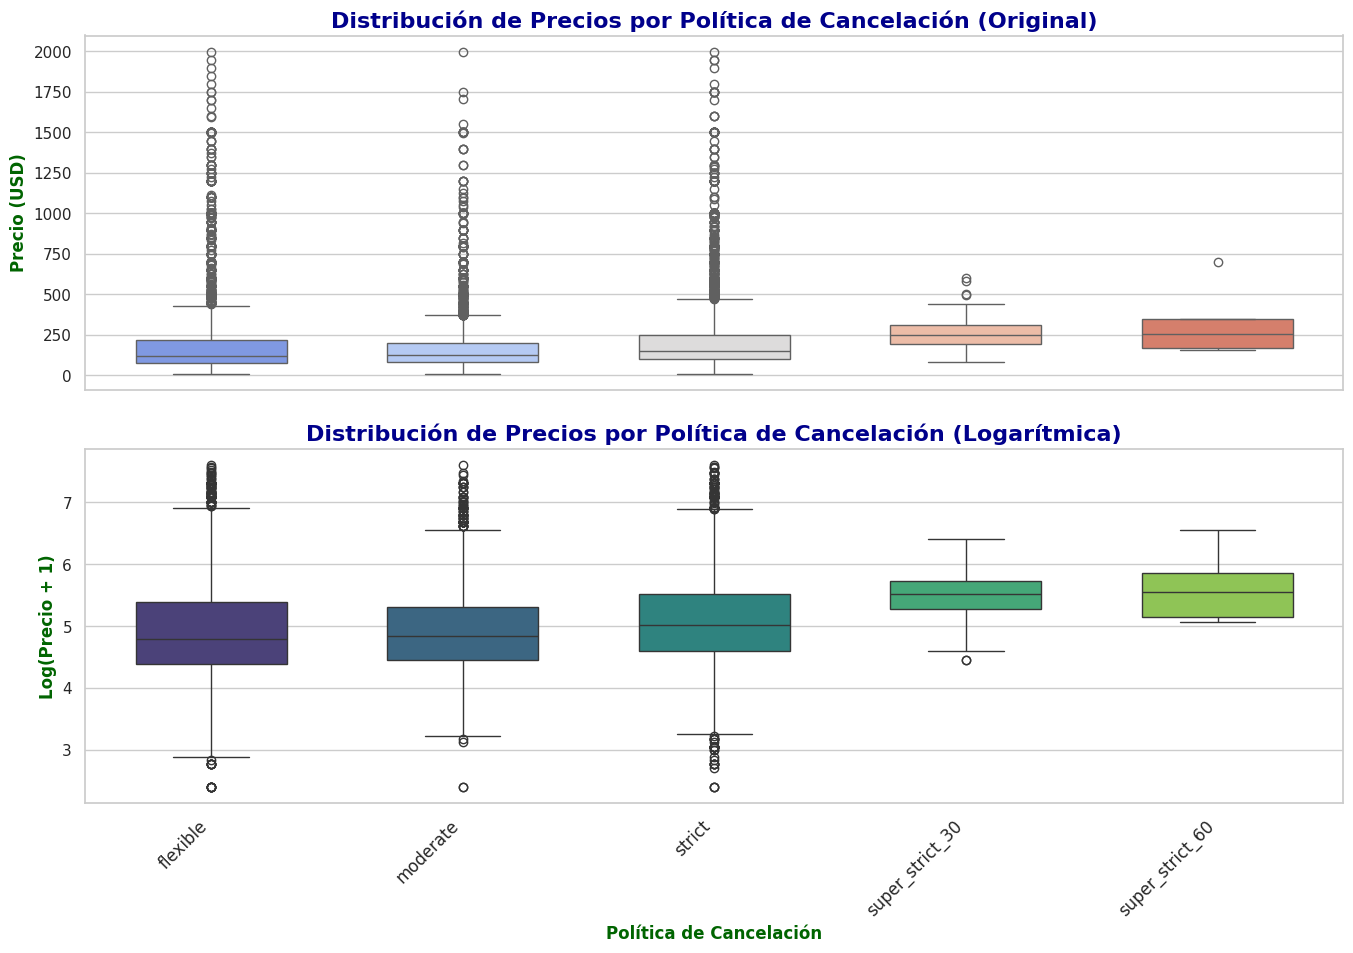

In [ ]:
# Calculamos estadísticas clave para cancellation_policy y precios
cancellation_price_stats = airbnb_us_cleaning.groupby('cancellation_policy')['price'].describe()

# Mostramos las estadísticas clave
print("Estadísticas clave de precios por política de cancelación (cancellation_policy):")
print(cancellation_price_stats[['mean', '25%', '50%', '75%', 'min', 'max']])

# Calculamos el rango intercuartílico (IQR) y los valores atípicos
cancellation_price_stats['IQR'] = cancellation_price_stats['75%'] - cancellation_price_stats['25%']
cancellation_price_stats['lower_bound'] = cancellation_price_stats['25%'] - 1.5 * cancellation_price_stats['IQR']
cancellation_price_stats['upper_bound'] = cancellation_price_stats['75%'] + 1.5 * cancellation_price_stats['IQR']

print("\nValores atípicos (outliers) por política de cancelación (cancellation_policy):")
print(cancellation_price_stats[['lower_bound', 'upper_bound']])

# Filtramos las categorías de cancellation_policy
cancellation_policies = airbnb_us_cleaning['cancellation_policy'].unique()
subset_data = airbnb_us_cleaning[airbnb_us_cleaning['cancellation_policy'].isin(cancellation_policies)]

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Creamos una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Gráfico 1: Boxplot para precios originales
sns.boxplot(x='cancellation_policy', y='price', data=subset_data, palette='coolwarm', ax=ax1, width=0.6)
ax1.set_title('Distribución de Precios por Política de Cancelación (Original)', fontsize=16, weight='bold', color='darkblue')
ax1.set_ylabel('Precio (USD)', fontsize=12, weight='bold', color='darkgreen')
ax1.set_xlabel('')  # Sin etiqueta en el eje X

# Gráfico 2: Boxplot para precios logarítmicos
sns.boxplot(x='cancellation_policy', y=np.log1p(subset_data['price']), data=subset_data, palette='viridis', ax=ax2, width=0.6)
ax2.set_title('Distribución de Precios por Política de Cancelación (Logarítmica)', fontsize=16, weight='bold', color='darkblue')
ax2.set_ylabel('Log(Precio + 1)', fontsize=12, weight='bold', color='darkgreen')
ax2.set_xlabel('Política de Cancelación', fontsize=12, weight='bold', color='darkgreen')

# Rotamos etiquetas del eje X para ambos gráficos
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Ajustamos márgenes
plt.tight_layout(pad=2.0)

# Mostramos los gráficos
plt.show()


In [ ]:
# Analisis de Amenity: Ahora pasamos a analizar la variable Amenity para ver si se correlaciona con el precio pero rpimero hacemos un analsisi exploratorio de esta variable




# Convertimos la columna 'amenities' a listas de elementos
def parse_amenities(amenities_str):


    # Limpiamos las comillas y comas para obtener una lista de comodidades
    amenities_list = amenities_str.replace("{", "").replace("}", "").replace('"', "").split(",")
    return [item.strip() for item in amenities_list]



# Aplicamos la función de parseo sobre la columna 'amenities'
airbnb_us_cleaning['amenities_list'] = airbnb_us_cleaning['amenities'].apply(parse_amenities)


# Contamos la frecuencia de cada elemento en todas las listas de 'amenities_list'
all_amenities = sum(airbnb_us_cleaning['amenities_list'], [])  # Aplana la lista de listas
amenities_count = Counter(all_amenities)



# Creamos un DataFrame con los resultados y calculamos el porcentaje
total_properties = len(airbnb_us_cleaning)  # Total de propiedades
amenities_count_df = pd.DataFrame(amenities_count.items(), columns=['Amenity', 'Count'])
amenities_count_df['Percentage'] = (amenities_count_df['Count'] / total_properties) * 100




# Ordenamos por la frecuencia de las amenidades
amenities_count_df = amenities_count_df.sort_values(by='Count', ascending=False)



amenities_count_df





Amenity  Count  Percentage
3                      Wireless Internet  17141   96.770733
7                                Heating  16712   94.348783
4                                Kitchen  16111   90.955795
14                            Essentials  16002   90.340428
10                        Smoke detector  15741   88.866934
..                                   ...    ...         ...
125                           Bath towel      1    0.005646
126                  Hand or paper towel      1    0.005646
127                         Toilet paper      1    0.005646
128  Wide clearance to shower and toilet      1    0.005646
130     Grab-rails for shower and toilet      1    0.005646

[131 rows x 3 columns]

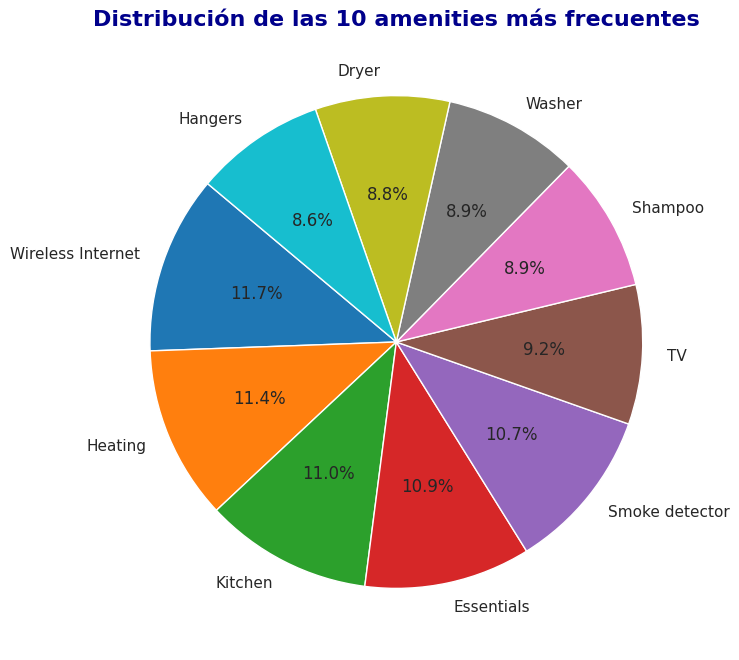

In [ ]:


# Definimos el número máximo de amenities a mostrar
top_n = 10

# Preparamos los datos para el gráfico
top_amenities = amenities_count_df.head(top_n)  # Las N amenities más frecuentes

# Configuración del gráfico circular
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10.colors  # Paleta de colores

# Creamos el gráfico
plt.pie(
    top_amenities['Count'],
    labels=top_amenities['Amenity'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Añadimos título
plt.title(f'Distribución de las {top_n} amenities más frecuentes', fontsize=16, weight='bold', color='darkblue')

# Mostramos el gráfico
plt.show()



In [ ]:
# Vemos como se distribuye los amenities en las diferentes tipos de propiedades y cuartos

# Paso 1: Contamos el número de comodidades en cada fila
airbnb_us_cleaning['num_amenities'] = airbnb_us_cleaning['amenities_list'].apply(len)

# Paso 2: Agrupamos por 'property_type' y 'room_type' y calcular estadísticas de las comodidades
amenities_stats = airbnb_us_cleaning.groupby(['property_type', 'room_type'])['num_amenities'].agg(['mean', 'min', 'max', 'std'])

# Paso 3: Mostramos el DataFrame con las estadísticas


amenities_stats



mean  min  max        std
property_type      room_type                                      
Apartment          Entire home/apt  19.553827    1   86   6.778391
                   Private room     16.660468    1   72   6.812362
                   Shared room      16.995050    1   42   7.155346
Bed & Breakfast    Entire home/apt  16.047619    8   27   6.304571
                   Private room     16.463918    1   29   6.578155
                   Shared room      17.000000    7   28   6.595453
Boat               Entire home/apt  16.863636    7   38   7.395594
Boutique hotel     Entire home/apt  24.714286   12   28   3.969665
                   Private room     19.240000   11   25   3.677409
Bungalow           Entire home/apt  22.300000   11   41   8.615877
                   Private room     23.333333   14   30   8.326664
Cabin              Entire home/apt  22.833333   12   41  10.590877
                   Private room     11.500000    4   19  10.606602
Camper/RV          Entire home/apt  19.333333    3   28  14.153916
                   Private room      6.000000    6    6        NaN
Castle             Entire home/apt  36.500000   26   47  14.849242
                   Private room     28.500000   27   30   2.121320
Cave               Private room     22.000000   22   22        NaN
Condominium        Entire home/apt  21.435233    1   58   7.301253
                   Private room     21.211180    4   58   7.068201
                   Shared room      21.500000   10   48  10.456871
Dorm               Entire home/apt  11.000000   11   11        NaN
                   Private room     17.500000   10   22   3.528793
                   Shared room      14.041667    1   24   5.819601
Guest suite        Entire home/apt  26.243243   12   57   9.390910
                   Private room     20.961538    8   40   7.927071
Guesthouse         Entire home/apt  20.675676    8   39   7.180429
                   Private room     16.384615    9   30   5.424304
                   Shared room      24.000000   24   24        NaN
Hostel             Private room     14.636364    1   23   6.546338
                   Shared room      17.000000   11   22   4.062019
House              Entire home/apt  20.919460    1   57   7.584032
                   Private room     18.066329    1   52   7.205725
                   Shared room      15.766667    1   45   6.887391
In-law             Entire home/apt  23.018182    7   46   9.017454
                   Private room     19.714286   10   48  13.683497
Loft               Entire home/apt  20.906475    1   44   6.787555
                   Private room     20.523810    3   37   6.619403
                   Shared room      19.500000    4   41  10.623424
Other              Entire home/apt  20.980198    2   48   8.648676
                   Private room     14.931034    1   28   6.685575
                   Shared room      13.500000    1   23   9.354143
Serviced apartment Entire home/apt  18.000000   17   19   1.000000
Tent               Entire home/apt   2.000000    2    2        NaN
Timeshare          Entire home/apt  22.208333   12   38   7.779455
                   Private room     13.125000   11   17   2.531939
Townhouse          Entire home/apt  22.079498    8   56   7.099381
                   Private room     19.156951    4   36   5.528593
                   Shared room      15.666667   12   22   5.507571
Train              Private room     14.000000   14   14        NaN
Treehouse          Entire home/apt  25.000000   18   32   9.899495
Vacation home      Entire home/apt  28.000000   28   28        NaN
Villa              Private room     16.555556    1   24   7.535103

In [ ]:
#Agregamos la columna de cantidad de amanetties en el dataset para un analisis posterior


# Contamos la cantidad de amenities en cada fila y lo agregamos  como una nueva columna
airbnb_us_cleaning['amenities_count'] = airbnb_us_cleaning['amenities_list'].apply(len)


# Mostramos las primeras filas para verificar
print(airbnb_us_cleaning[['amenities', 'amenities_count']].head())


                                           amenities  amenities_count
0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...               15
1  {TV,Internet,"Wireless Internet","Air conditio...               12
2  {TV,"Wireless Internet",Heating,"Smoke detecto...               10
3  {TV,"Cable TV","Wireless Internet","Pets live ...               21
4  {TV,"Cable TV",Internet,"Wireless Internet","A...               25


In [ ]:
# Eliminamos las columnas 'num_amenities' y 'amenities_list'
airbnb_us_cleaning = airbnb_us_cleaning.drop(columns=['num_amenities', 'amenities_list'], errors='ignore')

# Verificamos que las columnas se hayan eliminado
airbnb_us_cleaning.head()


id property_type        room_type  \
0  13418779         House  Entire home/apt   
1   3808709     Apartment  Entire home/apt   
2  12422935     Apartment     Private room   
3    180792         House     Private room   
4   2658946     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
1  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
2  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   

   bed_type cancellation_policy  cleaning_fee city  ...      neighbourhood  \
0  Real Bed            flexible          True   SF  ...       Lower Haight   
1  Real Bed            moderate          True   DC  ...   Columbia Heights   
2  Real Bed              strict          True   SF  ...         Noe Valley   
3  Real Bed            moderate          True   SF  ...  Richmond District   
4  Real Bed              strict          True   DC  ...  U Street Corridor   

  number_of_reviews review_scores_rating  \
0                 0                95.81   
1                 4                40.00   
2                 3               100.00   
3               159                99.00   
4                13                89.00   

                                       thumbnail_url  zipcode bedrooms beds  \
0  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0  2.0   
1                                                NaN    20009      0.0  1.0   
2  https://a0.muscache.com/im/pictures/82509143-4...    94131      1.0  1.0   
3  https://a0.muscache.com/im/pictures/0ed6c128-7...    94121      1.0  1.0   
4                                                NaN    20009      2.0  3.0   

   price  log_price  amenities_count  
0  750.0   6.621406               15  
1  115.0   4.753590               12  
2   85.0   4.454347               10  
3  120.0   4.795791               21  
4  200.0   5.303305               25  

[5 rows x 31 columns]

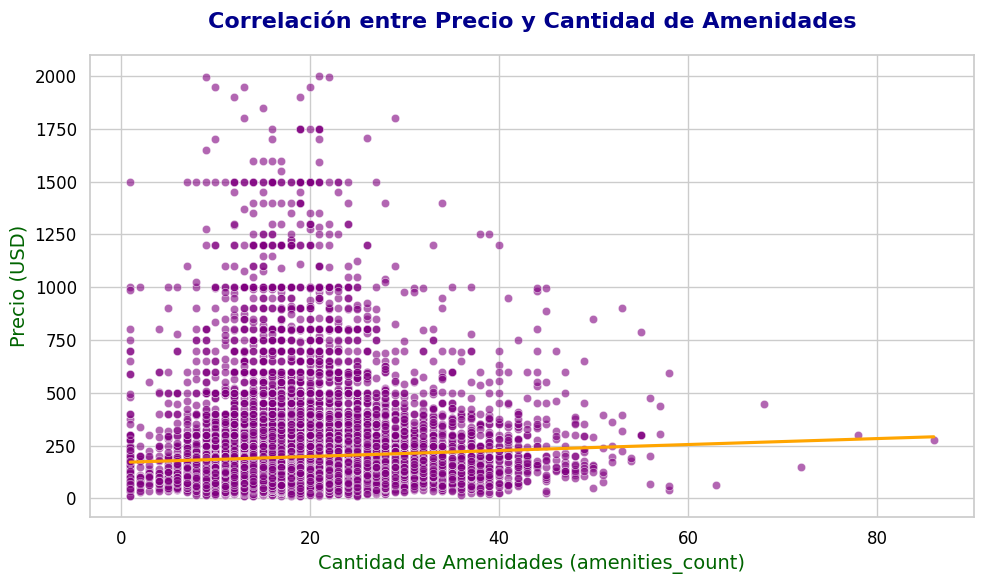

In [ ]:
#Ahora visualizamos si existe correclacion entre Price y la variable Amenities



# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un scatter plot para mostrar la relación entre 'price' y 'amenities_count'
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='amenities_count',
    y='price',
    data=airbnb_us_cleaning,
    alpha=0.6,
    color='purple'
)

# Agregar línea de regresión para observar tendencias
sns.regplot(
    x='amenities_count',
    y='price',
    data=airbnb_us_cleaning,
    scatter=False,
    color='orange',
    ci=None
)

# Personalizar el gráfico
plt.title('Correlación entre Precio y Cantidad de Amenidades', fontsize=16, weight='bold', color='darkblue', pad=20)
plt.xlabel('Cantidad de Amenidades (amenities_count)', fontsize=14, color='darkgreen')
plt.ylabel('Precio (USD)', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [ ]:
#Borramos la voluman amenties_count ya que no nos sirve en el dataset


airbnb_us_cleaning = airbnb_us_cleaning.drop(columns=['amenities_count'], errors='ignore')
airbnb_us_cleaning.head()

id property_type        room_type  \
0  13418779         House  Entire home/apt   
1   3808709     Apartment  Entire home/apt   
2  12422935     Apartment     Private room   
3    180792         House     Private room   
4   2658946     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
1  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
2  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   

   bed_type cancellation_policy  cleaning_fee city  ...  \
0  Real Bed            flexible          True   SF  ...   
1  Real Bed            moderate          True   DC  ...   
2  Real Bed              strict          True   SF  ...   
3  Real Bed            moderate          True   SF  ...   
4  Real Bed              strict          True   DC  ...   

                                                name      neighbourhood  \
0                 Beautiful Flat in the Heart of SF!       Lower Haight   
1                         Great studio in midtown DC   Columbia Heights   
2                        Comfort Suite San Francisco         Noe Valley   
3                 Cozy Garden Studio - Private Entry  Richmond District   
4  Charming 2 bdrm in trendy U/14th streets w/par...  U Street Corridor   

  number_of_reviews review_scores_rating  \
0                 0                95.81   
1                 4                40.00   
2                 3               100.00   
3               159                99.00   
4                13                89.00   

                                       thumbnail_url  zipcode bedrooms beds  \
0  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0  2.0   
1                                                NaN    20009      0.0  1.0   
2  https://a0.muscache.com/im/pictures/82509143-4...    94131      1.0  1.0   
3  https://a0.muscache.com/im/pictures/0ed6c128-7...    94121      1.0  1.0   
4                                                NaN    20009      2.0  3.0   

   price  log_price  
0  750.0   6.621406  
1  115.0   4.753590  
2   85.0   4.454347  
3  120.0   4.795791  
4  200.0   5.303305  

[5 rows x 30 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter

# Descargamos las stopwords de nltk (primera vez)
nltk.download('stopwords')

# Obtenemos la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar y filtrar palabras
def clean_and_filter(text):
    text = text.lower()  # Convertimos a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminamos caracteres especiales
    words = text.split()  # Dividimos en palabras
    # Eliminamos las palabras que estén en la lista de stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Aplicamos la función a la columna 'description'
filtered_descriptions = airbnb_us_cleaning['description'].dropna().apply(clean_and_filter)

# Unimos todas las palabras y contamos su frecuencia
all_filtered_words = sum(filtered_descriptions, [])  # Aplanamos la lista de listas
word_count_filtered = Counter(all_filtered_words)

# Creamos un DataFrame con las palabras más frecuentes
filtered_word_count_df = pd.DataFrame(word_count_filtered.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Mostramos las 20 palabras más frecuentes después de eliminar stopwords
print(filtered_word_count_df.head(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


             Word  Count
91           room  18438
224     apartment  14209
110       kitchen  12964
100       bedroom  12805
102           bed  10404
12         street   9899
45           walk   9756
90        private   9726
61           home   9340
206        living   9077
135        access   9002
30    restaurants   9001
28            one   8889
10        located   8714
223             2   8458
169         house   8227
17   neighborhood   8164
138      bathroom   7946
136          full   7775
182         place   7706


# 4) Feature Engineering

En esta Seccion de Feature Engineering lo que buscamos aplicar el metodo get dummies  para transformar variables categoricas a numericas y asi usarlas mas adelante en el analisis de regresion .
Se haran las siguientes transformaciones:


Get Dummies  en city

Get Dummies en  room_type

Get Dummies  en property_tpe

Get Dummies en cancellation_policy

Get Dummies en bed_type


In [ ]:
#Visualizamos el Dataset antes de aplicar los metodos de Feature Engineering
airbnb_us_cleaning.head()

id property_type        room_type  \
0  13418779         House  Entire home/apt   
1   3808709     Apartment  Entire home/apt   
2  12422935     Apartment     Private room   
3    180792         House     Private room   
4   2658946     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
1  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
2  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   

   bed_type cancellation_policy  cleaning_fee city  ...  \
0  Real Bed            flexible          True   SF  ...   
1  Real Bed            moderate          True   DC  ...   
2  Real Bed              strict          True   SF  ...   
3  Real Bed            moderate          True   SF  ...   
4  Real Bed              strict          True   DC  ...   

                                                name      neighbourhood  \
0                 Beautiful Flat in the Heart of SF!       Lower Haight   
1                         Great studio in midtown DC   Columbia Heights   
2                        Comfort Suite San Francisco         Noe Valley   
3                 Cozy Garden Studio - Private Entry  Richmond District   
4  Charming 2 bdrm in trendy U/14th streets w/par...  U Street Corridor   

  number_of_reviews review_scores_rating  \
0                 0                95.81   
1                 4                40.00   
2                 3               100.00   
3               159                99.00   
4                13                89.00   

                                       thumbnail_url  zipcode bedrooms beds  \
0  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0  2.0   
1                                                NaN    20009      0.0  1.0   
2  https://a0.muscache.com/im/pictures/82509143-4...    94131      1.0  1.0   
3  https://a0.muscache.com/im/pictures/0ed6c128-7...    94121      1.0  1.0   
4                                                NaN    20009      2.0  3.0   

   price  log_price  
0  750.0   6.621406  
1  115.0   4.753590  
2   85.0   4.454347  
3  120.0   4.795791  
4  200.0   5.303305  

[5 rows x 30 columns]

In [ ]:
# Identificamos las variables numéricas
numeric_columns = airbnb_us_cleaning.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identificamos las variables categóricas
categorical_columns = airbnb_us_cleaning.select_dtypes(exclude=['float64', 'int64']).columns.tolist()


# Mostramos resultados
print("Variables Numéricas:")
print(numeric_columns)


print("\nVariables Categóricas:")
print(categorical_columns)


Variables Numéricas:
['id', 'accommodates', 'bathrooms', 'host_response_rate', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price', 'log_price']

Variables Categóricas:
['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode']


In [ ]:
# Identificamos las variables categóricas
categorical_columns = airbnb_us_cleaning.select_dtypes(exclude=['float64', 'int64']).columns.tolist()


# Mostramos el tipo de dato de cada variable categórica
print("Tipos de datos de las variables categóricas:")
print(airbnb_us_cleaning[categorical_columns].dtypes)


Tipos de datos de las variables categóricas:
property_type             object
room_type                 object
amenities                 object
bed_type                  object
cancellation_policy       object
cleaning_fee                bool
city                      object
description               object
first_review              object
host_has_profile_pic      object
host_identity_verified    object
host_since                object
instant_bookable          object
last_review               object
name                      object
neighbourhood             object
thumbnail_url             object
zipcode                   object
dtype: object


In [ ]:
# 1)Dummy  City

# Creamos las columnas dummy para 'city', sin eliminar la primera categoría
city_dummies = pd.get_dummies(airbnb_us_cleaning['city'], drop_first=False, prefix='city')


# Verificamos las dimensiones antes y después
print("Dimensiones iniciales del dataset:")
initial_shape = airbnb_us_cleaning.shape
print(f"Filas: {initial_shape[0]}, Columnas: {initial_shape[1]}")


# Concatenamos las columnas dummy con el dataset original de limpieza
airbnb_us_cleaning_with_dummies = pd.concat([airbnb_us_cleaning, city_dummies], axis=1)


print("\nDimensiones después de agregar las columnas dummy:")
new_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {new_shape[0]}, Columnas: {new_shape[1]}")

# Mostramos las primeras 5 filas con las nuevas columnas de 'city'
print("\nPrimeras 5 filas con las nuevas columnas de 'city':")
print(airbnb_us_cleaning_with_dummies[['city_Boston', 'city_Chicago', 'city_DC', 'city_SF']].head())




Dimensiones iniciales del dataset:
Filas: 17713, Columnas: 30

Dimensiones después de agregar las columnas dummy:
Filas: 17713, Columnas: 34

Primeras 5 filas con las nuevas columnas de 'city':
   city_Boston  city_Chicago  city_DC  city_SF
0        False         False    False     True
1        False         False     True    False
2        False         False    False     True
3        False         False    False     True
4        False         False     True    False


In [ ]:
# 2)Dummy 'property_type'

# Creamos las columnas dummy para 'property_type', sin eliminar la primera categoría
property_type_dummies = pd.get_dummies(airbnb_us_cleaning['property_type'], drop_first=False, prefix='property_type')



# Verificamos las dimensiones antes y después de agregar las columnas dummy para 'property_type'
print("Dimensiones iniciales del dataset con 'city' y otras columnas dummy:")
initial_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {initial_shape[0]}, Columnas: {initial_shape[1]}")



# Concatenamos las columnas dummy con el dataset original de 'airbnb_us_cleaning_with_dummies'
airbnb_us_cleaning_with_dummies = pd.concat([airbnb_us_cleaning_with_dummies, property_type_dummies], axis=1)



print("\nDimensiones después de agregar las columnas dummy para 'property_type':")
new_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {new_shape[0]}, Columnas: {new_shape[1]}")


# Mostramos las primeras 5 filas con las nuevas columnas de 'property_type'
print("\nPrimeras 5 filas con las nuevas columnas de 'property_type':")
property_columns = [col for col in airbnb_us_cleaning_with_dummies.columns if col.startswith('property_type')]


airbnb_us_cleaning_with_dummies[property_columns].head()


Dimensiones iniciales del dataset con 'city' y otras columnas dummy:
Filas: 17713, Columnas: 34

Dimensiones después de agregar las columnas dummy para 'property_type':
Filas: 17713, Columnas: 60

Primeras 5 filas con las nuevas columnas de 'property_type':


property_type  property_type_Apartment  property_type_Bed & Breakfast  \
0         House                    False                          False   
1     Apartment                     True                          False   
2     Apartment                     True                          False   
3         House                    False                          False   
4     Apartment                     True                          False   

   property_type_Boat  property_type_Boutique hotel  property_type_Bungalow  \
0               False                         False                   False   
1               False                         False                   False   
2               False                         False                   False   
3               False                         False                   False   
4               False                         False                   False   

   property_type_Cabin  property_type_Camper/RV  property_type_Castle  \
0                False                    False                 False   
1                False                    False                 False   
2                False                    False                 False   
3                False                    False                 False   
4                False                    False                 False   

   property_type_Cave  ...  property_type_Loft  property_type_Other  \
0               False  ...               False                False   
1               False  ...               False                False   
2               False  ...               False                False   
3               False  ...               False                False   
4               False  ...               False                False   

   property_type_Serviced apartment  property_type_Tent  \
0                             False               False   
1                             False               False   
2                             False               False   
3                             False               False   
4                             False               False   

   property_type_Timeshare  property_type_Townhouse  property_type_Train  \
0                    False                    False                False   
1                    False                    False                False   
2                    False                    False                False   
3                    False                    False                False   
4                    False                    False                False   

   property_type_Treehouse  property_type_Vacation home  property_type_Villa  
0                    False                        False                False  
1                    False                        False                False  
2                    False                        False                False  
3                    False                        False                False  
4                    False                        False                False  

[5 rows x 27 columns]

In [ ]:
# 3)Dummy room_type



# Creamos las columnas dummy para 'room_type', sin eliminar la primera categoría
room_type_dummies = pd.get_dummies(airbnb_us_cleaning['room_type'], drop_first=False, prefix='room_type')


# Verificamos las dimensiones antes y después de agregar las columnas dummy para 'room_type'
print("Dimensiones iniciales del dataset con 'city' y 'property_type' y otras columnas dummy:")
initial_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {initial_shape[0]}, Columnas: {initial_shape[1]}")


# Concatenamos las columnas dummy con el dataset original de 'airbnb_us_cleaning_with_dummies'
airbnb_us_cleaning_with_dummies = pd.concat([airbnb_us_cleaning_with_dummies, room_type_dummies], axis=1)


# Mostramos las dimensiones después de agregar las columnas dummy para 'room_type'
new_shape = airbnb_us_cleaning_with_dummies.shape
print("\nDimensiones después de agregar las columnas dummy para 'room_type':")
print(f"Filas: {new_shape[0]}, Columnas: {new_shape[1]}")


# Mostramos las primeras 5 filas con las nuevas columnas de 'room_type'
print("\nPrimeras 5 filas con las nuevas columnas de 'room_type':")
room_columns = [col for col in airbnb_us_cleaning_with_dummies.columns if col.startswith('room_type')]



airbnb_us_cleaning_with_dummies[room_columns].head()


Dimensiones iniciales del dataset con 'city' y 'property_type' y otras columnas dummy:
Filas: 17713, Columnas: 60

Dimensiones después de agregar las columnas dummy para 'room_type':
Filas: 17713, Columnas: 63

Primeras 5 filas con las nuevas columnas de 'room_type':


room_type  room_type_Entire home/apt  room_type_Private room  \
0  Entire home/apt                       True                   False   
1  Entire home/apt                       True                   False   
2     Private room                      False                    True   
3     Private room                      False                    True   
4  Entire home/apt                       True                   False   

   room_type_Shared room  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [ ]:
# 4)Dummy cancellation_policy



# Creamos las columnas dummy para 'cancellation_policy', sin eliminar la primera categoría
cancellation_policy_dummies = pd.get_dummies(airbnb_us_cleaning['cancellation_policy'], drop_first=False, prefix='cancellation_policy')



# Verificamos las dimensiones antes y después de agregar las columnas dummy para 'cancellation_policy'
print("Dimensiones iniciales del dataset con 'city', 'room_type', 'property_type' y otras columnas dummy:")
initial_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {initial_shape[0]}, Columnas: {initial_shape[1]}")



# Concatenamos las columnas dummy con el dataset original de 'airbnb_us_cleaning_with_dummies'
airbnb_us_cleaning_with_dummies = pd.concat([airbnb_us_cleaning_with_dummies, cancellation_policy_dummies], axis=1)



print("\nDimensiones después de agregar las columnas dummy para 'cancellation_policy':")
new_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {new_shape[0]}, Columnas: {new_shape[1]}")



# Mostramos las primeras 5 filas con las nuevas columnas de 'cancellation_policy'
print("\nPrimeras 5 filas con las nuevas columnas de 'cancellation_policy':")
cancellation_policy_columns = [col for col in airbnb_us_cleaning_with_dummies.columns if col.startswith('cancellation_policy')]


airbnb_us_cleaning_with_dummies[cancellation_policy_columns].head()


Dimensiones iniciales del dataset con 'city', 'room_type', 'property_type' y otras columnas dummy:
Filas: 17713, Columnas: 63

Dimensiones después de agregar las columnas dummy para 'cancellation_policy':
Filas: 17713, Columnas: 68

Primeras 5 filas con las nuevas columnas de 'cancellation_policy':


cancellation_policy  cancellation_policy_flexible  \
0            flexible                          True   
1            moderate                         False   
2              strict                         False   
3            moderate                         False   
4              strict                         False   

   cancellation_policy_moderate  cancellation_policy_strict  \
0                         False                       False   
1                          True                       False   
2                         False                        True   
3                          True                       False   
4                         False                        True   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                False                                False  
1                                False                                False  
2                                False                                False  
3                                False                                False  
4                                False                                False

In [ ]:
# 5) Dummy neighbourhood

# Creamos las columnas dummy para 'neighbourhood', sin eliminar la primera categoría
#neighbourhood_dummies = pd.get_dummies(airbnb_us_cleaning['neighbourhood'], drop_first=False, prefix='neighbourhood')

# Verificamos las dimensiones antes y después de agregar las columnas dummy para 'neighbourhood'
#print("Dimensiones iniciales del dataset antes de agregar las columnas dummy de 'neighbourhood':")
#initial_shape = airbnb_us_cleaning_with_dummies.shape
#print(f"Filas: {initial_shape[0]}, Columnas: {initial_shape[1]}")

# Concatenamos las columnas dummy con el dataset original de 'airbnb_us_cleaning_with_dummies'
#airbnb_us_cleaning_with_dummies = pd.concat([airbnb_us_cleaning_with_dummies, neighbourhood_dummies], axis=1)

#print("\nDimensiones después de agregar las columnas dummy para 'neighbourhood':")
#new_shape = airbnb_us_cleaning_with_dummies.shape
#print(f"Filas: {new_shape[0]}, Columnas: {new_shape[1]}")

# Mostramos las primeras 5 filas con las nuevas columnas de 'neighbourhood'
#print("\nPrimeras 5 filas con las nuevas columnas de 'neighbourhood':")
#neighbourhood_columns = [col for col in airbnb_us_cleaning_with_dummies.columns if col.startswith('neighbourhood')]

#airbnb_us_cleaning_with_dummies[neighbourhood_columns].head()


In [ ]:
# 6) Dummy bed_type


# Creamos las columnas dummy para 'bed_type', sin eliminar la primera categoría
bed_type_dummies = pd.get_dummies(airbnb_us_cleaning['bed_type'], drop_first=False, prefix='bed_type')

# Verificamos las dimensiones antes y después de agregar las columnas dummy para 'bed_type'
print("Dimensiones iniciales del dataset antes de agregar las columnas dummy de 'bed_type':")
initial_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {initial_shape[0]}, Columnas: {initial_shape[1]}")

# Concatenamos las columnas dummy con el dataset original de 'airbnb_us_cleaning_with_dummies'
airbnb_us_cleaning_with_dummies = pd.concat([airbnb_us_cleaning_with_dummies, bed_type_dummies], axis=1)

print("\nDimensiones después de agregar las columnas dummy para 'bed_type':")
new_shape = airbnb_us_cleaning_with_dummies.shape
print(f"Filas: {new_shape[0]}, Columnas: {new_shape[1]}")

# Mostramos las primeras 5 filas con las nuevas columnas de 'bed_type'
print("\nPrimeras 5 filas con las nuevas columnas de 'bed_type':")
bed_type_columns = [col for col in airbnb_us_cleaning_with_dummies.columns if col.startswith('bed_type')]

airbnb_us_cleaning_with_dummies[bed_type_columns].head()


Dimensiones iniciales del dataset antes de agregar las columnas dummy de 'bed_type':
Filas: 17713, Columnas: 68

Dimensiones después de agregar las columnas dummy para 'bed_type':
Filas: 17713, Columnas: 73

Primeras 5 filas con las nuevas columnas de 'bed_type':


bed_type  bed_type_Airbed  bed_type_Couch  bed_type_Futon  \
0  Real Bed            False           False           False   
1  Real Bed            False           False           False   
2  Real Bed            False           False           False   
3  Real Bed            False           False           False   
4  Real Bed            False           False           False   

   bed_type_Pull-out Sofa  bed_type_Real Bed  
0                   False               True  
1                   False               True  
2                   False               True  
3                   False               True  
4                   False               True

In [ ]:
# Seleccionar solo las columnas categóricas para generar variables dummy
categorical_columns = ['cancellation_policy' , 'property_type', 'city',"room_type","bed_type"]

# Crear una lista para almacenar los resultados
dummy_summary_data = []

# Calcular el número de columnas dummy generadas para cada variable categórica
for col in categorical_columns:
    if col in airbnb_us_cleaning_with_dummies.columns:
        num_dummies = len(pd.get_dummies(airbnb_us_cleaning_with_dummies[col], drop_first=False).columns)
        dummy_summary_data.append({"Feature": col, "Dummies Generadas": num_dummies})

# Crear el DataFrame con los resultados
dummy_summary = pd.DataFrame(dummy_summary_data)

# Mostrar la tabla con el resumen
print(dummy_summary)


               Feature  Dummies Generadas
0  cancellation_policy                  5
1        property_type                 26
2                 city                  4
3            room_type                  3
4             bed_type                  5


In [ ]:
# 7) Configuracion  sobre las variables  host_has_profile_pic y host_identity_verified



# Convertir 't' a True y 'f' a False en las columnas especificadas
columns_to_convert = ['host_has_profile_pic', 'host_identity_verified']


# Aplicar reemplazo para cada columna
for column in columns_to_convert:
    airbnb_us_cleaning_with_dummies[column] = airbnb_us_cleaning_with_dummies[column].replace({'t': True, 'f': False})

# Verificar el resultado
print(airbnb_us_cleaning_with_dummies[columns_to_convert].head())


   host_has_profile_pic  host_identity_verified
0                  True                    True
1                  True                    True
2                  True                    True
3                  True                   False
4                  True                    True


<ipython-input-38-5b2ba064220e>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  airbnb_us_cleaning_with_dummies[column] = airbnb_us_cleaning_with_dummies[column].replace({'t': True, 'f': False})


In [ ]:
# 8) sobre las variables host_response_rate y review_scores_rating

# Convertimos 'host_response_rate' de porcentaje a valor entre 0 y 1
airbnb_us_cleaning_with_dummies['host_response_rate'] = airbnb_us_cleaning_with_dummies['host_response_rate'] / 100

# Convertimos 'review_scores_rating' de su rango original (0-100) a un valor entre 0 y 1
airbnb_us_cleaning_with_dummies['review_scores_rating'] = airbnb_us_cleaning_with_dummies['review_scores_rating'] / 100

# Mostramos las primeras 5 filas para verificar las conversiones
print(airbnb_us_cleaning_with_dummies[['host_response_rate', 'review_scores_rating']].head())


   host_response_rate  review_scores_rating
0              0.9671                0.9581
1              1.0000                0.4000
2              1.0000                1.0000
3              1.0000                0.9900
4              1.0000                0.8900


In [ ]:
# Comparación de dimensiones
dims_comparison = pd.DataFrame({
    'Dataset': ['airbnb_us_cleaning', 'airbnb_us_cleaning_with_dummies'],
    'Filas': [airbnb_us_cleaning.shape[0], airbnb_us_cleaning_with_dummies.shape[0]],
    'Columnas': [airbnb_us_cleaning.shape[1], airbnb_us_cleaning_with_dummies.shape[1]]
})

# Comparación de tipos de datos solo para 'airbnb_us_cleaning_with_dummies'
dtypes_comparison = pd.DataFrame({
    'Column': airbnb_us_cleaning_with_dummies.columns,
    'airbnb_us_cleaning_with_dummies_dtypes': airbnb_us_cleaning_with_dummies.dtypes
})

# Mostrar las comparaciones
print(dims_comparison)



dtypes_comparison # Mostramos todos los tipos de datos del dataset con dummies



                           Dataset  Filas  Columnas
0               airbnb_us_cleaning  17713        30
1  airbnb_us_cleaning_with_dummies  17713        73


Column  \
id                                          id   
property_type                    property_type   
room_type                            room_type   
amenities                            amenities   
accommodates                      accommodates   
...                                        ...   
bed_type_Airbed                bed_type_Airbed   
bed_type_Couch                  bed_type_Couch   
bed_type_Futon                  bed_type_Futon   
bed_type_Pull-out Sofa  bed_type_Pull-out Sofa   
bed_type_Real Bed            bed_type_Real Bed   

                       airbnb_us_cleaning_with_dummies_dtypes  
id                                                      int64  
property_type                                          object  
room_type                                              object  
amenities                                              object  
accommodates                                            int64  
...                                                       ...  
bed_type_Airbed                                          bool  
bed_type_Couch                                           bool  
bed_type_Futon                                           bool  
bed_type_Pull-out Sofa                                   bool  
bed_type_Real Bed                                        bool  

[73 rows x 2 columns]

In [ ]:
#Outliers Price



# 5) Machine Learning sin PCA



En esta seccion aplicaremos 2 modelos de machine learning , el de regresion lineal y el de support vector regression(SVR) para comparar las metricas de ambos modelos previamente dividiendo el dataset entre train y test , clasificar cuales son las varibales dependientes e indepenientes y aplicar los metodos de normalizacion y escalamiento de datos

In [ ]:
# Definimos la variable dependiente como DataFrame
y = airbnb_us_cleaning_with_dummies[['log_price']]  # Doble corchete para mantener como DataFrame



# Creamos el conjunto de variables independientes
excluded_columns = ['id', 'zipcode', 'latitude', 'longitude', 'price','log_price']
x = airbnb_us_cleaning_with_dummies.drop(columns=excluded_columns)



# Filtramos  las columnas según los tipos de datos requeridos
x = x.select_dtypes(include=['int64', 'float64', 'bool'])




# Imprimmos  las dimensiones de 'x' y 'y' para verificar
print(f"Dimensiones de 'x' (variables independientes): {x.shape}")
print(f"Dimensiones de 'y' (variable dependiente): {y.shape}")





Dimensiones de 'x' (variables independientes): (17713, 53)
Dimensiones de 'y' (variable dependiente): (17713, 1)


In [ ]:
# Creamos un DataFrame con dos columnas: "Tipo" y "Variables"
variables_dependientes = pd.DataFrame({'Tipo': ['Dependiente'], 'Variables': y.columns.tolist()})
variables_independientes = pd.DataFrame({'Tipo': ['Independiente'] * len(x.columns), 'Variables': x.columns.tolist()})

# Combinamos ambos DataFrames
variables = pd.concat([variables_dependientes, variables_independientes], ignore_index=True)

# Muestramos el resultado
variables


Tipo                            Variables
0     Dependiente                            log_price
1   Independiente                         accommodates
2   Independiente                            bathrooms
3   Independiente                         cleaning_fee
4   Independiente                 host_has_profile_pic
5   Independiente               host_identity_verified
6   Independiente                   host_response_rate
7   Independiente                    number_of_reviews
8   Independiente                 review_scores_rating
9   Independiente                             bedrooms
10  Independiente                                 beds
11  Independiente                          city_Boston
12  Independiente                         city_Chicago
13  Independiente                              city_DC
14  Independiente                              city_SF
15  Independiente              property_type_Apartment
16  Independiente        property_type_Bed & Breakfast
17  Independiente                   property_type_Boat
18  Independiente         property_type_Boutique hotel
19  Independiente               property_type_Bungalow
20  Independiente                  property_type_Cabin
21  Independiente              property_type_Camper/RV
22  Independiente                 property_type_Castle
23  Independiente                   property_type_Cave
24  Independiente            property_type_Condominium
25  Independiente                   property_type_Dorm
26  Independiente            property_type_Guest suite
27  Independiente             property_type_Guesthouse
28  Independiente                 property_type_Hostel
29  Independiente                  property_type_House
30  Independiente                 property_type_In-law
31  Independiente                   property_type_Loft
32  Independiente                  property_type_Other
33  Independiente     property_type_Serviced apartment
34  Independiente                   property_type_Tent
35  Independiente              property_type_Timeshare
36  Independiente              property_type_Townhouse
37  Independiente                  property_type_Train
38  Independiente              property_type_Treehouse
39  Independiente          property_type_Vacation home
40  Independiente                  property_type_Villa
41  Independiente            room_type_Entire home/apt
42  Independiente               room_type_Private room
43  Independiente                room_type_Shared room
44  Independiente         cancellation_policy_flexible
45  Independiente         cancellation_policy_moderate
46  Independiente           cancellation_policy_strict
47  Independiente  cancellation_policy_super_strict_30
48  Independiente  cancellation_policy_super_strict_60
49  Independiente                      bed_type_Airbed
50  Independiente                       bed_type_Couch
51  Independiente                       bed_type_Futon
52  Independiente               bed_type_Pull-out Sofa
53  Independiente                    bed_type_Real Bed

In [ ]:
# Dividimos los datos en entrenamiento (70%) y prueba (30%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Imprimimos las dimensiones de los conjuntos
print(f"Dimensiones de 'x_train' (entrenamiento): {x_train.shape}")
print(f"Dimensiones de 'x_test' (prueba): {x_test.shape}")
print(f"Dimensiones de 'y_train' (entrenamiento): {y_train.shape}")
print(f"Dimensiones de 'y_test' (prueba): {y_test.shape}")

Dimensiones de 'x_train' (entrenamiento): (12399, 53)
Dimensiones de 'x_test' (prueba): (5314, 53)
Dimensiones de 'y_train' (entrenamiento): (12399, 1)
Dimensiones de 'y_test' (prueba): (5314, 1)


In [ ]:

# Imprimir algunas filas antes de escalar
print("Antes de escalar (x_train):")
print(x_train.head())

# Ajustar y transformar el conjunto de entrenamiento
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scal = scaler.transform(x_train)

# Transformar el conjunto de prueba
x_test_scal = scaler.transform(x_test)

# Convertir los datos escalados a DataFrame para visualizar con los nombres de las columnas
x_train_scal_df = pd.DataFrame(x_train_scal, columns=x_train.columns, index=x_train.index)
x_test_scal_df = pd.DataFrame(x_test_scal, columns=x_test.columns, index=x_test.index)

# Imprimir algunas filas después de escalar
print("\nDespués de escalar (x_train_scal):")
print(x_train_scal_df.head())

# Verificar las dimensiones
print(f"\nDimensiones de 'x_train_scal' (entrenamiento escalado): {x_train_scal.shape}")
print(f"Dimensiones de 'x_test_scal' (prueba escalado): {x_test_scal.shape}")


Antes de escalar (x_train):
       accommodates  bathrooms  cleaning_fee  host_has_profile_pic  \
2674              3        1.0         False                  True   
12263             2        1.0         False                  True   
16387             2        1.5          True                  True   
4002              6        3.5          True                  True   
11210             2        2.0          True                  True   

       host_identity_verified  host_response_rate  number_of_reviews  \
2674                    False              0.9400                  9   
12263                    True              0.9857                  0   
16387                    True              1.0000                185   
4002                     True              1.0000                  2   
11210                    True              0.9900                 21   

       review_scores_rating  bedrooms  beds  ...  \
2674                 0.8400       1.0   1.0  ...   
12263         

In [ ]:
# Modelo de regresión lineal

# Definimos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo con los datos escalados
model.fit(x_train_scal, y_train.values.ravel())  # .ravel() convierte y_train a array plano

# Realizamos predicciones en el conjunto de prueba escalado
y_pred_train = model.predict(x_train_scal)  # Predicciones en el conjunto de entrenamiento
y_pred_test = model.predict(x_test_scal)    # Predicciones en el conjunto de prueba

# Calculamos el error cuadrático medio (MSE) para ambos conjuntos
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Mostramos los resultados
print(f"Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de entrenamiento: {rmse_train:.4f}")
print(f"Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de prueba: {rmse_test:.4f}")



Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de entrenamiento: 0.5006
Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de prueba: 0.5064


In [ ]:
# Modelo de regresión lineal


y_pred_train_original = np.exp(y_pred_train)  # Predicciones en entrenamiento revertidas
y_pred_test_original = np.exp(y_pred_test)    # Predicciones en prueba revertidas

y_train_original = np.exp(y_train)  # Valores reales de entrenamiento revertidos
y_test_original = np.exp(y_test)    # Valores reales de prueba revertidos

# Calculamos el MSE en el dominio original
mse_train_original = mean_squared_error(y_train_original, y_pred_train_original)
mse_test_original = mean_squared_error(y_test_original, y_pred_test_original)


rmse_train_original = np.sqrt(mse_train_original)
rmse_test_original = np.sqrt(mse_test_original)
print(f"RMSE en entrenamiento (sin log): {rmse_train_original:.2f}")
print(f"RMSE en prueba (sin log): {rmse_test_original:.2f}")


RMSE en entrenamiento (sin log): 163.65
RMSE en prueba (sin log): 165.76


In [ ]:
# Modelo de regresión lineal


# Calculamos el R² para el conjunto de entrenamiento
r2_train = r2_score(y_train, y_pred_train)

# Calculamos el R² para el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)

# Mostramos los resultados
print(f"R² en el conjunto de entrenamiento: {r2_train:.4f}")
print(f"R² en el conjunto de prueba: {r2_test:.4f}")


R² en el conjunto de entrenamiento: 0.5383
R² en el conjunto de prueba: 0.5494


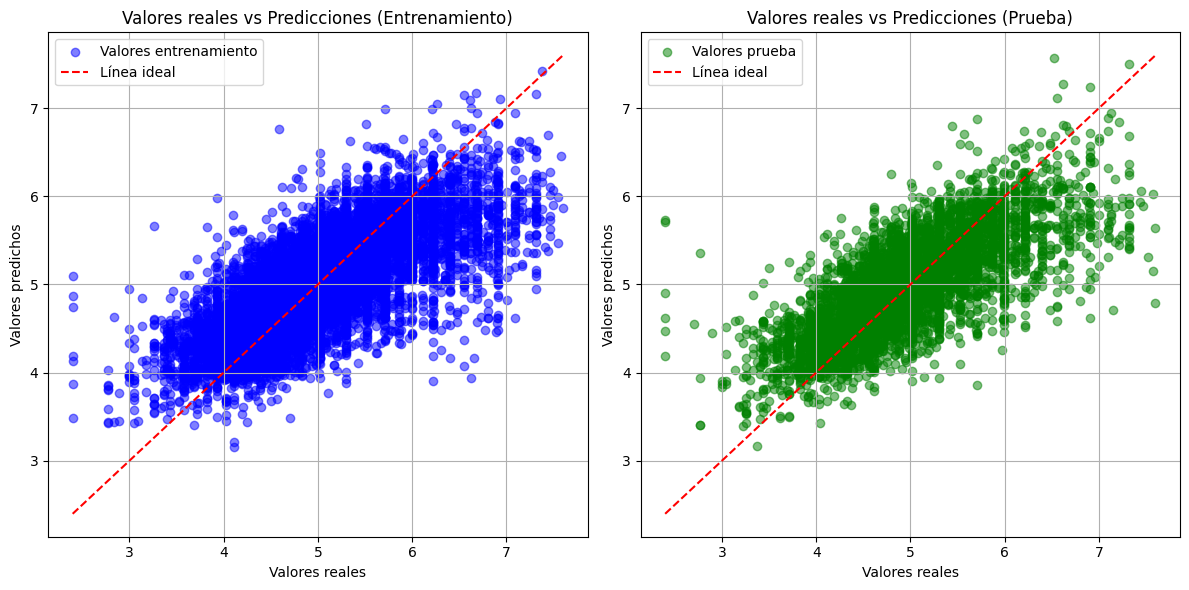

In [ ]:
# Modelo de regresión lineal


# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, color="blue", label="Valores entrenamiento")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linestyle="--", label="Línea ideal")
plt.title("Valores reales vs Predicciones (Entrenamiento)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.legend()
plt.grid()

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, color="green", label="Valores prueba")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Línea ideal")
plt.title("Valores reales vs Predicciones (Prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.legend()
plt.grid()

# Ajustamos espacio entre los gráficos
plt.tight_layout()
plt.show()



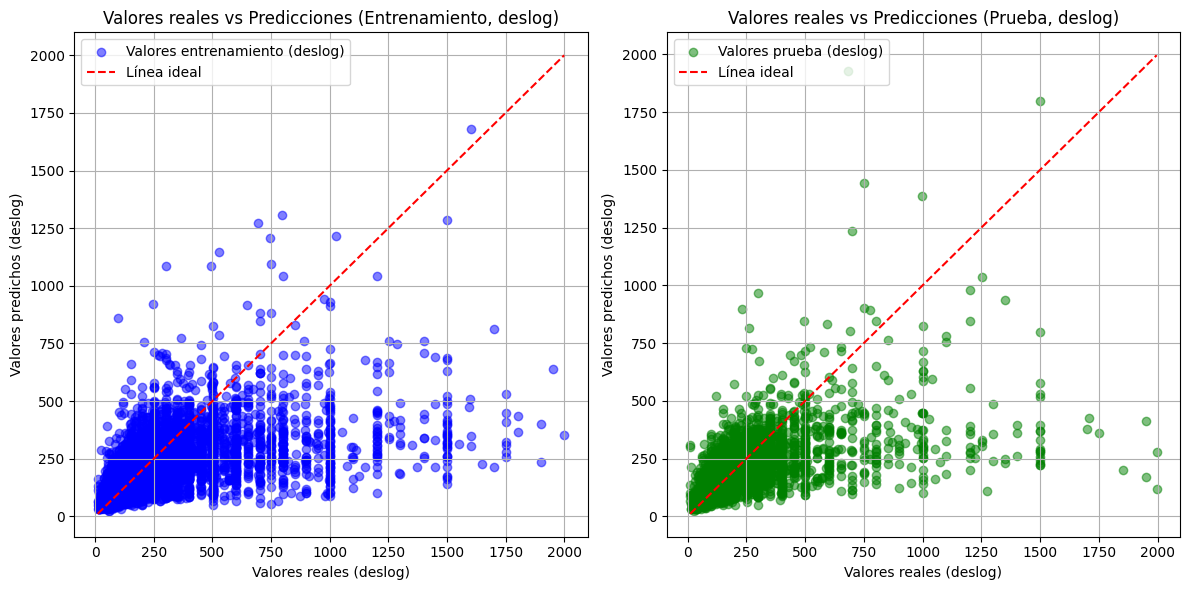

In [ ]:
# Modelo de regresión lineal


# Deslogaritmamos los valores reales y predichos
y_train_deslog = np.exp(y_train)
y_pred_train_deslog = np.exp(y_pred_train)

y_test_deslog = np.exp(y_test)
y_pred_test_deslog = np.exp(y_pred_test)

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento (deslogarizado)
plt.subplot(1, 2, 1)
plt.scatter(y_train_deslog, y_pred_train_deslog, alpha=0.5, color="blue", label="Valores entrenamiento (deslog)")
plt.plot(
    [y_train_deslog.min(), y_train_deslog.max()],
    [y_train_deslog.min(), y_train_deslog.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Entrenamiento, deslog)")
plt.xlabel("Valores reales (deslog)")
plt.ylabel("Valores predichos (deslog)")
plt.legend()
plt.grid()

# Gráfico para el conjunto de prueba (deslogarizado)
plt.subplot(1, 2, 2)
plt.scatter(y_test_deslog, y_pred_test_deslog, alpha=0.5, color="green", label="Valores prueba (deslog)")
plt.plot(
    [y_test_deslog.min(), y_test_deslog.max()],
    [y_test_deslog.min(), y_test_deslog.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Prueba, deslog)")
plt.xlabel("Valores reales (deslog)")
plt.ylabel("Valores predichos (deslog)")
plt.legend()
plt.grid()

# Ajustar espacio entre los gráficos
plt.tight_layout()
plt.show()



In [ ]:
# Definimos el modelo Support Vector Regressor (SVR)
svr = SVR()




# Definimos los parámetros para la búsqueda en cuadrícula
param_grid_svr = {
    'kernel': ['linear', 'rbf'],  # Dos posibles valores para el parámetro "kernel"
    'C': [0.1, 1, 10],            # Tres posibles valores para "C"
    'gamma': [0.01, 0.1, 1]       # Tres posibles valores para "gamma"
}



# Configuramos GridSearchCV para SVR
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, refit=True)



# Ajustamos el modelo con el conjunto de entrenamiento escalado
# Utilizamos .values para extraer la columna como un arreglo de numpy
grid_search_svr.fit(x_train_scal, y_train.values.ravel())  # o puedes usar y_train.to_numpy().ravel()



# Obtenemos los mejores parámetros
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_



# Realizamos predicciones con el mejor modelo
predictions_svr = best_model_svr.predict(x_test_scal)


# Calculamos el Error Cuadrático Medio (RMSE)
mse_svr = mean_squared_error(y_test, predictions_svr)
rmse_svr = np.sqrt(mse_svr)



# Imprimimos los mejores parámetros y el RMSE
print(f"Mejores parámetros para SVR: {best_params_svr}")
print(f"Raiz del error cuadrático medio (RMSE) en el test set con SVR: {rmse_svr:.4f}")



In [ ]:
# Modelo Support Vector Regressor (SVR)

# Deslogaritmizamos las predicciones y los valores reales
y_test_original = np.exp(y_test)  # Valores reales sin log
predictions_svr_original = np.exp(predictions_svr)  # Predicciones sin log

# Calculamos el RMSE en el dominio original
mse_svr_original = mean_squared_error(y_test_original, predictions_svr_original)
rmse_svr_original = np.sqrt(mse_svr_original)


# Calculamos el R^2 en el conjunto de prueba
r2_svr = r2_score(y_test, predictions_svr)


# Imprimimos los resultados
print(f"Mejores parámetros para SVR: {best_params_svr}")
print(f"Raíz del error cuadrático medio (RMSE) en el test set con SVR (log): {rmse_svr:.4f}")
print(f"Raíz del error cuadrático medio (RMSE) en el test set con SVR (sin log): {rmse_svr_original:.4f}")
print(f"Coeficiente de determinación (R^2) en el test set con SVR: {r2_svr:.4f}")

Mejores parámetros para SVR: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Raíz del error cuadrático medio (RMSE) en el test set con SVR (log): 0.4927
Raíz del error cuadrático medio (RMSE) en el test set con SVR (sin log): 162.2723
Coeficiente de determinación (R^2) en el test set con SVR: 0.5735


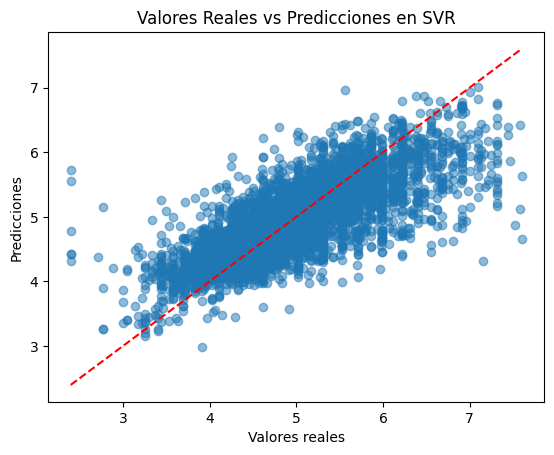

In [ ]:
# Modelo Support Vector Regressor (SVR)


plt.scatter(y_test, predictions_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones ")
plt.title("Valores Reales vs Predicciones en SVR ")
plt.show()


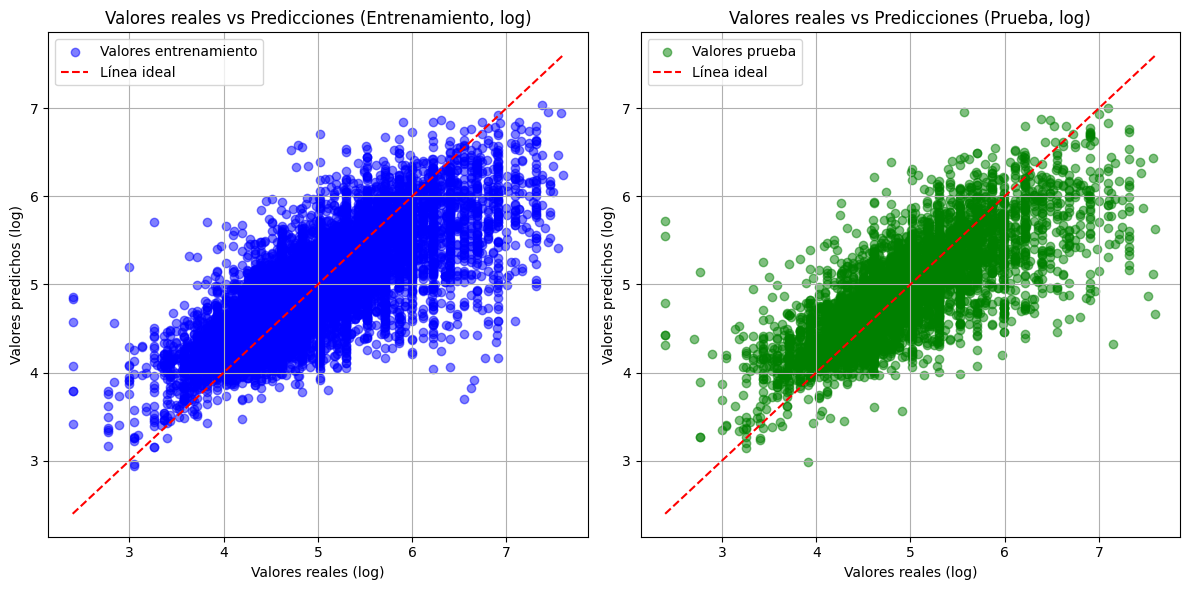

In [ ]:
# Modelo Support Vector Regressor (SVR)


# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, best_model_svr.predict(x_train_scal), alpha=0.5, color="blue", label="Valores entrenamiento")
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Entrenamiento, log)")
plt.xlabel("Valores reales (log)")
plt.ylabel("Valores predichos (log)")
plt.legend()
plt.grid()

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_svr, alpha=0.5, color="green", label="Valores prueba")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Prueba, log)")
plt.xlabel("Valores reales (log)")
plt.ylabel("Valores predichos (log)")
plt.legend()
plt.grid()

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()


# 6) Machine Learning con PCA


En esta seccion aplicaremos nuevamente 2 modelos de machine learning , el de regresion lineal y el de support vector regression(SVR) pero ahora usando el algoritmo PCA(Principal Component Analyst) y nuevamente compararemos las metricas de ambos modelos vs como dieron antes sin la reduccion de la dimencionalidad para determinar si el analsiis de componentes principales fue de gran utilidad o no

In [ ]:


# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)

# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(x_train_scal))

xpca_test = pd.DataFrame(pca.fit_transform(x_test_scal))

# obtenemos los auto-valores
autovalores = pca.explained_variance_ratio_

autovalores

array([0.08218911, 0.0484743 , 0.04738451, 0.04228703, 0.03916642,
       0.03789867, 0.03451794, 0.03224231, 0.03130683, 0.02880462])

In [ ]:
autovectores=pca.explained_variance_
autovectores

array([4.0964155 , 2.41602393, 2.36170729, 2.10764221, 1.95210698,
       1.88892033, 1.72042028, 1.60699982, 1.56037448, 1.43566102])

In [ ]:
xpca.shape

(12399, 10)

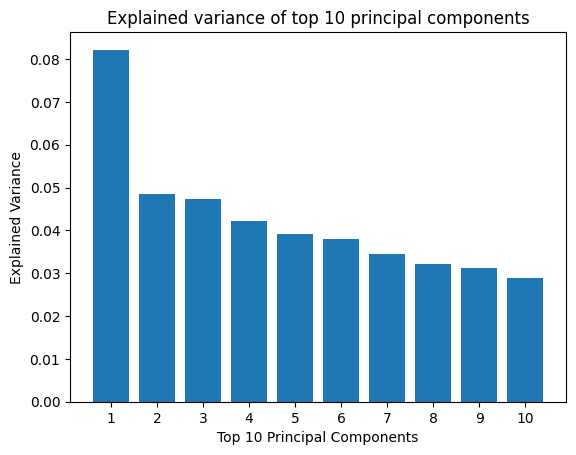

In [ ]:
components = range(1,n_comps + 1)
plt.bar(components,autovalores)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

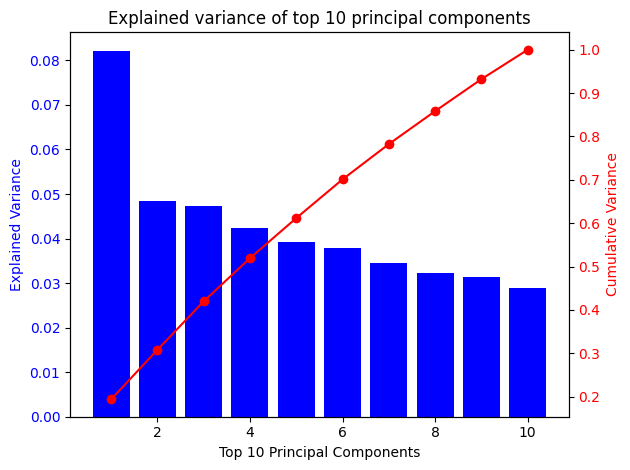

In [ ]:
fig, ax1 = plt.subplots()

components = range(1, n_comps + 1)

# Graficar las barras de varianza explicada en el eje izquierdo
ax1.bar(components, autovalores, label='Explained Variance', color='blue')
ax1.set_xlabel('Top ' + str(n_comps) + ' Principal Components')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para la varianza acumulada
ax2 = ax1.twinx()
cumulative_variance = np.cumsum(autovalores) / np.sum(autovalores)

# Graficar la varianza acumulada en el eje derecho
ax2.plot(components, cumulative_variance, color='red', marker='o', label='Cumulative Variance')
ax2.set_ylabel('Cumulative Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Configurar el título y las leyendas
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')

fig.tight_layout()  # Ajustar el layout para que no se superpongan los ejes
plt.show()

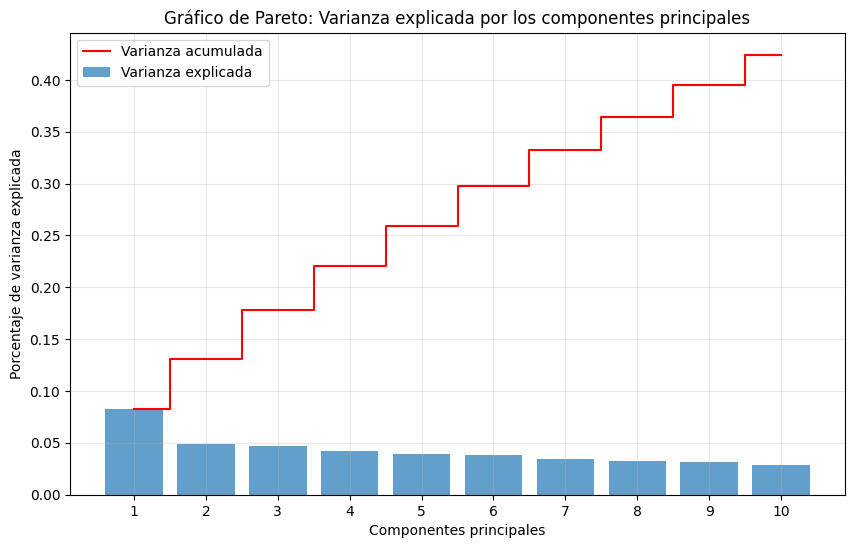

PC1: Varianza acumulada = 0.0822
PC2: Varianza acumulada = 0.1307
PC3: Varianza acumulada = 0.1780
PC4: Varianza acumulada = 0.2203
PC5: Varianza acumulada = 0.2595
PC6: Varianza acumulada = 0.2974
PC7: Varianza acumulada = 0.3319
PC8: Varianza acumulada = 0.3642
PC9: Varianza acumulada = 0.3955
PC10: Varianza acumulada = 0.4243


In [ ]:


# Gráfico de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(autovalores) + 1), autovalores, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(autovalores) + 1), np.cumsum(autovalores), where='mid', color='red', label='Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Gráfico de Pareto: Varianza explicada por los componentes principales')
plt.xticks(range(1, len(autovalores) + 1))  # Mostrar cada componente en el eje x
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Mostrar la varianza explicada acumulada
for i, var_ratio in enumerate(np.cumsum(autovalores)):
    print(f"PC{i+1}: Varianza acumulada = {var_ratio:.4f}")


In [ ]:
# Modelo de regresión lineal con PCA


# Definimos el modelo de regresión lineal
model_pca = LinearRegression()


# Entrenamos el modelo con los datos escalados
model_pca.fit(xpca, y_train.values.ravel())  # .ravel() convierte y_train a array plano


# Realizamos predicciones en el conjunto de prueba escalado
y_pred_train_pca = model_pca.predict(xpca)  # Predicciones en el conjunto de entrenamiento
y_pred_test_pca = model_pca.predict(xpca_test )    # Predicciones en el conjunto de prueba

# Calculamos el error cuadrático medio (MSE) para ambos conjuntos
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_pca))
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_pca ))

# Mostramos los resultados
print(f"Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de entrenamiento: {rmse_train_pca:.4f}")
print(f"Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de prueba: {rmse_test_pca:.4f}")


Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de entrenamiento: 0.5269
Raiz cuadrara del Error cuadrático medio (RMSE) en el conjunto de prueba: 0.6614


In [ ]:
# Modelo de regresión lineal con PCA

y_pred_train_original_pca = np.exp(y_pred_train_pca)  # Predicciones en entrenamiento revertidas
y_pred_test_original_pca = np.exp(y_pred_test_pca)    # Predicciones en prueba revertidas



y_train_original_pca = np.exp(y_train)  # Valores reales de entrenamiento revertidos
y_test_original_pca = np.exp(y_test)    # Valores reales de prueba revertidos



# Calculamos el MSE en el dominio original
mse_train_original_pca = mean_squared_error(y_train_original_pca, y_pred_train_original_pca)
mse_test_original_pca = mean_squared_error(y_test_original_pca, y_pred_test_original_pca)

rmse_train_original_pca = np.sqrt(mse_train_original_pca)
rmse_test_original_pca = np.sqrt(mse_test_original_pca)


print(f"RMSE en entrenamiento (sin log): {rmse_train_original_pca:.2f}")
print(f"RMSE en prueba (sin log): {rmse_test_original_pca:.2f}")

RMSE en entrenamiento (sin log): 171.31
RMSE en prueba (sin log): 10458.84


In [ ]:
# Modelo de regresión lineal con PCA

# Calculamos el R² para el conjunto de entrenamiento
r2_train_pca = r2_score(y_train, y_pred_train_pca)

# Calculamos el R² para el conjunto de prueba
r2_test_pca = r2_score(y_test, y_pred_test_pca )

# Mostramos los resultados
print(f"R² en el conjunto de entrenamiento: {r2_train_pca:.4f}")
print(f"R² en el conjunto de prueba: {r2_test_pca:.4f}")


R² en el conjunto de entrenamiento: 0.4885
R² en el conjunto de prueba: 0.2314


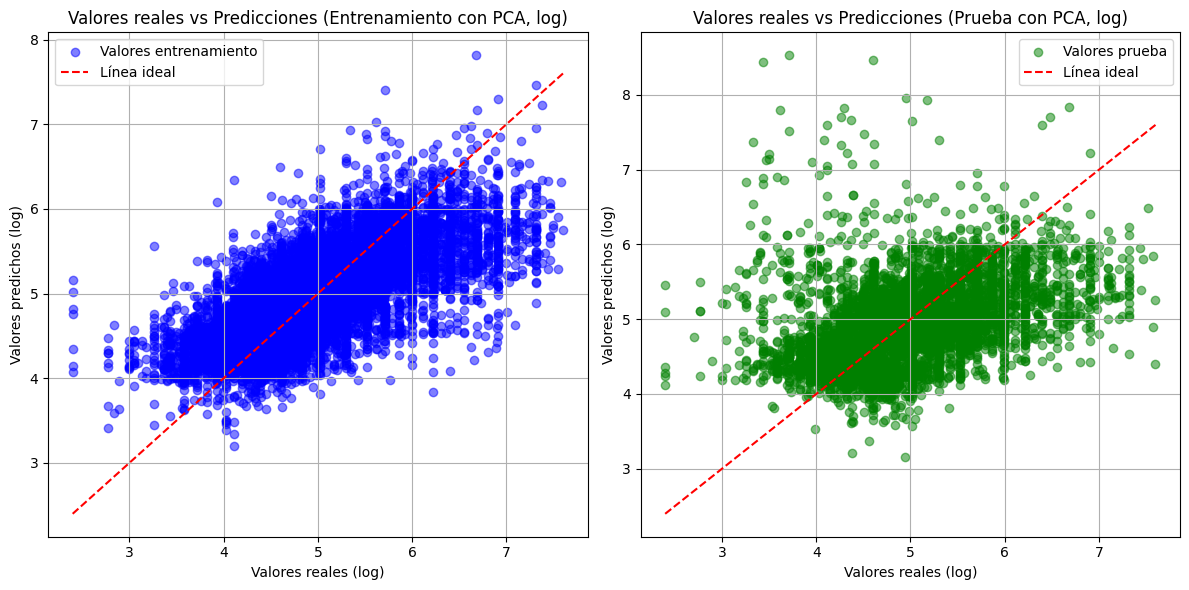

In [ ]:
# Modelo de regresión lineal con PCA



# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_pca, alpha=0.5, color="blue", label="Valores entrenamiento")
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Entrenamiento con PCA, log)")
plt.xlabel("Valores reales (log)")
plt.ylabel("Valores predichos (log)")
plt.legend()
plt.grid()

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_svr_pca, alpha=0.5, color="green", label="Valores prueba")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Prueba con PCA, log)")
plt.xlabel("Valores reales (log)")
plt.ylabel("Valores predichos (log)")
plt.legend()
plt.grid()

# Ajustamos espacio entre gráficos
plt.tight_layout()
plt.show()


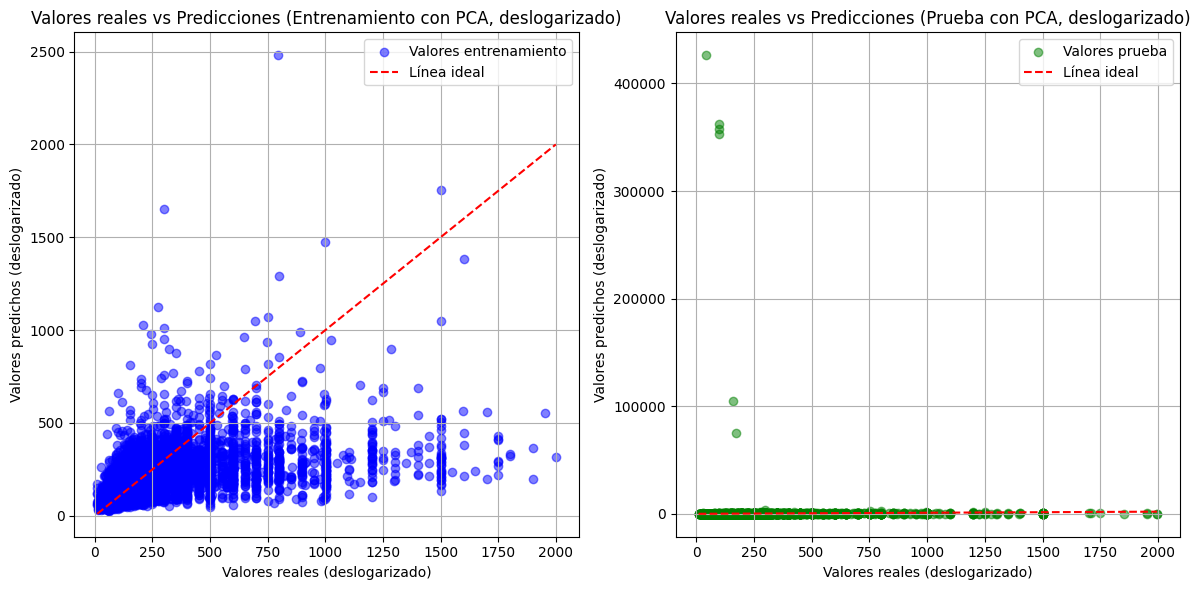

In [ ]:
# Modelo de regresión lineal con PCA



# Deslogarizamos las predicciones y valores reales
y_train_deslog = np.exp(y_train)
y_pred_train_deslog = np.exp(y_pred_train_pca)

y_test_deslog = np.exp(y_test)
y_pred_test_deslog = np.exp(y_pred_test_pca)

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train_deslog, y_pred_train_deslog, alpha=0.5, color="blue", label="Valores entrenamiento")
plt.plot(
    [y_train_deslog.min(), y_train_deslog.max()],
    [y_train_deslog.min(), y_train_deslog.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Entrenamiento con PCA, deslogarizado)")
plt.xlabel("Valores reales (deslogarizado)")
plt.ylabel("Valores predichos (deslogarizado)")
plt.legend()
plt.grid()

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test_deslog, y_pred_test_deslog, alpha=0.5, color="green", label="Valores prueba")
plt.plot(
    [y_test_deslog.min(), y_test_deslog.max()],
    [y_test_deslog.min(), y_test_deslog.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones (Prueba con PCA, deslogarizado)")
plt.xlabel("Valores reales (deslogarizado)")
plt.ylabel("Valores predichos (deslogarizado)")
plt.legend()
plt.grid()

# Ajustamos espacio entre gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Modelo de Support Vector Regressor (SVR) con PCA


# Definimos el modelo Support Vector Regressor (SVR)
svr_pca = SVR()



# Definimos los parámetros para la búsqueda en cuadrícula
param_grid_svr_pca = {
    'kernel': ['linear', 'rbf'],  # Dos posibles valores para el parámetro "kernel"
    'C': [0.1, 1, 10],            # Tres posibles valores para "C"
    'gamma': [0.01, 0.1, 1]       # Tres posibles valores para "gamma"
}



# Configuramos GridSearchCV para SVR
grid_search_svr_pca = GridSearchCV(estimator=svr_pca, param_grid=param_grid_svr_pca, cv=5, refit=True)



# Ajustamos el modelo con el conjunto de entrenamiento escalado
# Utilizamos .values para extraer la columna como un arreglo de numpy
grid_search_svr_pca.fit(xpca , y_train.values.ravel())



# Obtenemos los mejores parámetros
best_params_svr_pca = grid_search_svr_pca.best_params_
best_model_svr_pca = grid_search_svr_pca.best_estimator_



# Realizamos predicciones con el mejor modelo
predictions_svr_pca = best_model_svr_pca.predict(xpca_test )


# Calculamos el Error Cuadrático Medio (MSE)
mse_svr_pca = mean_squared_error(y_test, predictions_svr_pca)
rmse_svr_pca = np.sqrt(mse_svr_pca)




# Imprimimos los mejores parámetros y el MSE
print(f"Mejores parámetros para SVR: {best_params_svr_pca}")
print(f"Raiz del error cuadrático medio (RMSE) en el test set con SVR: {rmse_svr_pca :.4f}")


Mejores parámetros para SVR: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Raiz del error cuadrático medio (RMSE) en el test set con SVR: 0.7492


In [ ]:
# Modelo de Support Vector Regressor (SVR) con PCA

# Imprimimos los mejores parámetros y el MSE
print(f"Mejores parámetros para SVR: {best_params_svr_pca}")
print(f"Raiz del error cuadrático medio (RMSE) en el test set con SVR: {rmse_svr_pca :.4f}")


Mejores parámetros para SVR: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Raiz del error cuadrático medio (RMSE) en el test set con SVR: 0.7492


In [ ]:
# Modelo de Support Vector Regressor (SVR) con PCA

# Deslogaritmizamos las predicciones y los valores reales
y_test_original_pca = np.exp(y_test)  # Valores reales sin log
predictions_svr_original_pca = np.exp(predictions_svr_pca)  # Predicciones sin log

# Calculamos el RMSE en el dominio original
mse_svr_original_pca = mean_squared_error(y_test_original_pca, predictions_svr_original_pca)
rmse_svr_original_pca = np.sqrt(mse_svr_original_pca)


# Calculamos el R^2 en el conjunto de prueba
r2_svr_pca = r2_score(y_test, predictions_svr_pca)


# Imprimimos los resultados
print(f"Mejores parámetros para SVR: {best_params_svr_pca}")
print(f"Raíz del error cuadrático medio (RMSE) en el test set con SVR (log): {rmse_svr_pca:.4f}")
print(f"Raíz del error cuadrático medio (RMSE) en el test set con SVR (sin log): {rmse_svr_original_pca:.4f}")
print(f"Coeficiente de determinación (R^2) en el test set con SVR: {r2_svr_pca:.4f}")

Mejores parámetros para SVR: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Raíz del error cuadrático medio (RMSE) en el test set con SVR (log): 0.7492
Raíz del error cuadrático medio (RMSE) en el test set con SVR (sin log): 259.8831
Coeficiente de determinación (R^2) en el test set con SVR: 0.0138


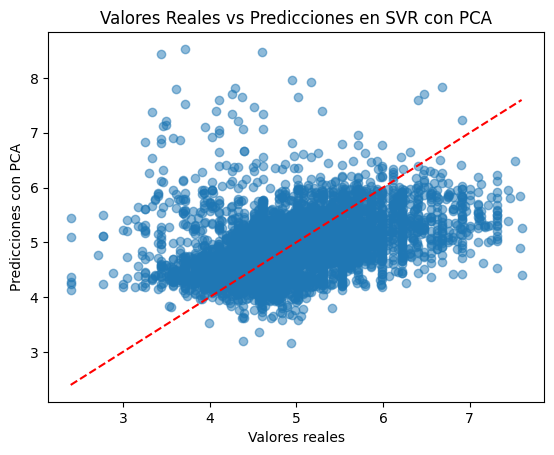

In [ ]:
# Modelo de Support Vector Regressor (SVR) con PCA

plt.scatter(y_test, predictions_svr_pca, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones con PCA")
plt.title("Valores Reales vs Predicciones en SVR con PCA")
plt.show()

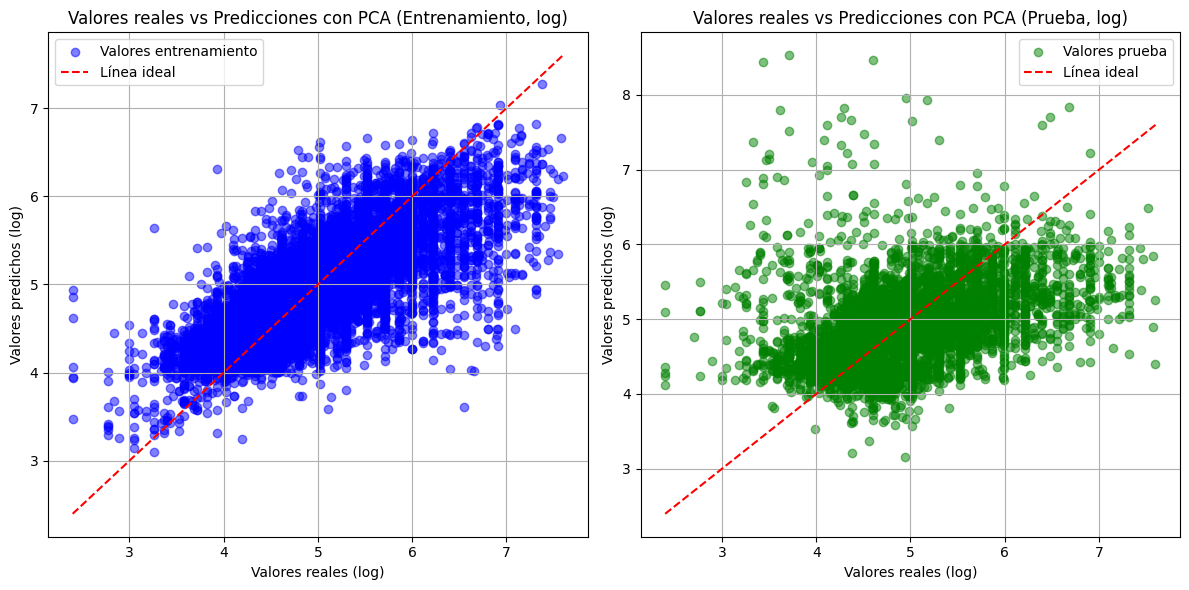

In [ ]:
# Modelo de Support Vector Regressor (SVR) con PCA



# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))


# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, best_model_svr_pca.predict(xpca), alpha=0.5, color="blue", label="Valores entrenamiento")
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones con PCA (Entrenamiento, log)")
plt.xlabel("Valores reales (log)")
plt.ylabel("Valores predichos (log)")
plt.legend()
plt.grid()

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_svr_pca, alpha=0.5, color="green", label="Valores prueba")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red", linestyle="--", label="Línea ideal"
)
plt.title("Valores reales vs Predicciones con PCA (Prueba, log)")
plt.xlabel("Valores reales (log)")
plt.ylabel("Valores predichos (log)")
plt.legend()
plt.grid()

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()
